# SBA Guaranteed Loans

## Business Problem

### Commercial context and motivation

The U.S. SBA (United States Small Business Administration) was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market. 

Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment. One way SBA assists these small business enterprises is through a loan guarantee program which is designed to encourage banks to grant loans to small businesses. SBA acts much like an insurance provider to reduce the risk for a bank by taking on some of the risk through guaranteeing a portion of the loan. In the case that a
loan goes into default, SBA then covers the amount they guaranteed.

There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small
businesses and/or start-ups that have defaulted on their SBA-guaranteed loans. The rate of default on these loans has been a source of controversy for decades. Conservative economists believe that credit markets perform efficiently
without government participation. Supporters of SBA- guaranteed loans argue that the social benefits of job creation by those small businesses receiving government- guaranteed loans far outweigh the costs incurred from
defaulted loans.

Since SBA loans only guarantee a portion of the entire loan
balance, banks will incur some losses if a small business defaults
on its SBA-guaranteed loan. Therefore, banks are still faced
with a difficult choice as to whether they should grant such a
loan because of the high risk of default. One way to inform
their decision making is through analyzing relevant historical
data such as the datasets provided here.



Nowadays, the SBA decided to modernize and set up a Data Analytics team to improve its credit approval system. We are data scientists who are part of that team.


### Target

The business problem is to decide if a loan can be granted, with a reasonable probability that the requesting company can cancel it without inconvenience.

### Business Target

What are the characteristics of the companies that best predict whether or not the company will have problems repaying the loan? What happens if a company takes several loans, is it more likely that one will have problems? How does the borrowing bank and the line of credit influence? Is there a relationship with the term of the loan? And with the year the loan was made? (Let's keep in mind that this last question is related to the economic and political context.).

## Context and analytical approach

The aim is to implement a machine learning model that, with the different values of the dataset fields, predicts if the company had difficulties in paying the loan, which can be called in a shorter way as "defaulted loan".

### Dataset Fields

The fields found in the dataset are the following:

**- LoanNr_ChkDgt**: Identifier – Primary key.

**- Name**: Borrower name.

**- City**: Borrower city.

**- State**: Borrower state (U.S.).

**- Zip**: Borrower zip code.

**- Bank**: Bank name.

**- BankState**: State of the bank branch.

**- NAICS**:  North American industry classification system code.

**- ApprovalDate**: Date SBA commitment issued.

**- ApprovalFY**: Fiscal year of commitment.

**- Term**: Loan term in months.

**- NoEmp**: Number of business employees.

**- NewExist**: 1=Existing business, 2=New business. This represents whether the business is an existing business (in exis tence for more than 2 years) or a new business (in existence for less than or equal to 2 years).

**- CreateJob**: Number of jobs created.

**- RetainedJob**: Number of jobs retained.

**- FranchiseCode**: Franchise code, (00000 or 00001)=No franchise.

**- UrbanRural**: 1=Urban, 2=rural, 0=undefined.

**- RevLineCr**: Revolving line of credit: Y=Yes, N=No.

**- LowDoc**: LowDoc Loan Program: Y = Yes, N = No. In order to process more loans efficiently, a “LowDoc Loan” program was implemented where loans under $150,000 can be processed using a one-page application. “Yes” indicates loans with a one-page application, and “No” indicates loans with more information attached to the application.

**- ChgOffDate**: The date when a loan is declared to be in default.

**- DisbursementDate**: Payment date (delivery of the loan).

**- DisbursementGross**: Gross amount disbursed/paid (per loan delivery).

**- BalanceGross**: Gross amount pending return (at the time of preparation of the dataset).

**- MIS_Status**: Loan status: Loan status charged off=CHGOFF, Paid in full=PIF.

**- ChgOffPrinGr**: Charged-off amount (Amount canceled (not refunded)).

**- GrAppv**: Gross amount of loan approved by bank.

**- SBA_Appv**: SBA’s guaranteed amount of approved loan.

Since the dataset is labeled (the MIS_Status field indicates whether or not there were any issues with the loan), it is a supervised learning problem, more specifically, classification. The category we want to assign to future loans corresponds to the target variable, MIS_Status.

### Hypothesis


The fields that we believe may be most relevant to the company requesting the loan are: 'State', 'NAICS', 'NoEmp', 'NewExist', 'UrbanRural'.

Regarding the bank and the line of credit that seem most relevant to us are: 'BankState', 'RevLineCr', 'DisbursementGross', 'GrAppv', 'SBA_Appv'.

To see if there is a relationship with terms, we are going to study the 'Term' field.

Regarding the relationship with the years of the loans, we believe that the fields 'DisbursementDate', 'ApprovalDate', 'ApprovalFY' and 'ChgOffDate' are relevant, although the first three are probably very similar.

## Exploratory Data Analysis (EDA) and Data Wrangling

### A first contact with the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
pd.options.display.max_columns = 500

In [2]:
#from google.colab import drive # We mount a Google Drive folder where the dataset is.
#drive.mount('/content/drive', force_remount=True)

#path = "/content/drive" + "/MyDrive" + "/Cursos/Coderhouse/Data Science/"
path = "./"

We load the dataset.

In [3]:
loans = pd.read_csv(path + "Should This Loan be Approved or Denied.csv") 
#We see that column 9 has several different types, let's take a better look at it.

C:\Users\Hernán\AppData\Local\Temp\ipykernel_6624\3122350407.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  loans = pd.read_csv(path + "Should This Loan be Approved or Denied.csv")


We see that column 9 has several different types, let's take a better look at it.

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

The info statement doesn't detect the problem, but we can look better:

In [5]:
for column in loans.columns:
  print(column, ' ---> ', pd.api.types.infer_dtype(loans[column]))

LoanNr_ChkDgt  --->  integer
Name  --->  string
City  --->  string
State  --->  string
Zip  --->  integer
Bank  --->  string
BankState  --->  string
NAICS  --->  integer
ApprovalDate  --->  string
ApprovalFY  --->  mixed-integer
Term  --->  integer
NoEmp  --->  integer
NewExist  --->  floating
CreateJob  --->  integer
RetainedJob  --->  integer
FranchiseCode  --->  integer
UrbanRural  --->  integer
RevLineCr  --->  string
LowDoc  --->  string
ChgOffDate  --->  string
DisbursementDate  --->  string
DisbursementGross  --->  string
BalanceGross  --->  string
MIS_Status  --->  string
ChgOffPrinGr  --->  string
GrAppv  --->  string
SBA_Appv  --->  string


So we corroborate that there is a problem. It would have to be a date or an integer.

-------------------------------------------------------------------------------------

Looking back at the output of the info command, we see that there are several columns with null values, although they are few in percentage terms. The only exception is the ChgOffDate column, which has quite a few and is logical, because this column is the date on which the customer began to default on the debt and therefore only has values if the customer had problems paying.
The columns with null values are: Name, City, State, Bank, BankState, NewExist, RevLineCr, LowDoc, ChgOffDate, DisbursementDate, MIS_Status.

Let's explore the data a bit more:

In [6]:
loans.describe(include = 'all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
LoanNr_ChkDgt,899164.0,NaN,NaN,NaN,4772612310.59431,2538175037.453079,1000014003.0,2589757508.5,4361439006.0,6904626504.75,9996003010.0
Name,899150,779583,SUBWAY,1269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,899134,32581,LOS ANGELES,11558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,899150,51,CA,130619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zip,899164.0,NaN,NaN,NaN,53804.391241,31184.159152,0.0,27587.0,55410.0,83704.0,99999.0
Bank,897605,5802,BANK OF AMERICA NATL ASSOC,86853,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BankState,897598,56,CA,118116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NAICS,899164.0,NaN,NaN,NaN,398660.950146,263318.312759,0.0,235210.0,445310.0,561730.0,928120.0
ApprovalDate,899164,9859,7-Jul-93,1131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApprovalFY,899164.0,70.0,2006.0,76040.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
loans.head(10)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,28-Feb-97,1997,120,19,1.0,0,0,1,0,N,N,NaN,30-Jun-97,"$517,000.00",$0.00,P I F,$0.00,"$517,000.00","$387,750.00"
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,2-Jun-80,1980,45,45,2.0,0,0,0,0,N,N,24-Jun-91,22-Jul-80,"$600,000.00",$0.00,CHGOFF,"$208,959.00","$600,000.00","$499,998.00"
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,28-Feb-97,1997,84,1,2.0,0,0,1,0,N,Y,NaN,30-Jun-98,"$45,000.00",$0.00,P I F,$0.00,"$45,000.00","$36,000.00"
8,1000104006,TURTLE BEACH INN,PORT SAINT JOE,FL,32456,CENTENNIAL BANK,FL,721310,28-Feb-97,1997,297,2,2.0,0,0,1,0,N,N,NaN,31-Jul-97,"$305,000.00",$0.00,P I F,$0.00,"$305,000.00","$228,750.00"
9,1000124001,INTEXT BUILDING SYS LLC,GLASTONBURY,CT,6073,WEBSTER BANK NATL ASSOC,CT,0,28-Feb-97,1997,84,3,2.0,0,0,1,0,N,Y,NaN,30-Apr-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"


We notice that the NAICS column has zeros. Zeros are not valid industry classification codes, so this is the same as having nulls. Let's see how many zeros there are in that column.

In [8]:
(loans['NAICS']==0).sum()

201948

That's a little over 22% of the rows, so that field has a hefty value of nulls.

-------------------------------------------------------------------------------------

There are several columns that have monetary values and to work with them we have to pass them to numerical format. These columns are: DisbursementGross, BalanceGross, GrAppv y SBA_Appv.

-------------------------------------------------------------------------------------

Another thing to note is that the ApprovalDate, DisbursementDate and ChgOffDate columns are date data, but one can see that in the dataframe they are strings:

In [9]:
print(pd.api.types.infer_dtype(loans['ApprovalDate']))
print(pd.api.types.infer_dtype(loans['DisbursementDate']))
print(pd.api.types.infer_dtype(loans['ChgOffDate']))


string
string
string


In [10]:
loans[['ApprovalDate', 'DisbursementDate', 'ChgOffDate']].sample(5)

,ApprovalDate,DisbursementDate,ChgOffDate
808856,3-Mar-05,31-May-05,NaN
522720,3-Feb-12,3-Feb-12,NaN
273392,21-Apr-99,31-Aug-99,NaN
293888,25-Jun-99,31-Aug-99,NaN
843521,28-Feb-96,31-Jul-00,NaN


If we are going to use them later, we would have to convert them. 

--------------------------------------------------------------------------------------------

NAICS classification code numbers have positional significance. The first two digits designate the largest business sector, the third digit designates the subsector, the fourth digit designates the industry group, the fifth digit designates NAICS industries, and the sixth digit designates national industries. The code table for the first two digits is as follows:

|Sector |	Description|
|-------|----------------|
11 | Agriculture, forestry, fishing and hunting
21 |	Mining, quarrying, and oil and gas extraction
22 |	Utilities
23 |	Construction
31–33 |	Manufacturing
42 |	Wholesale trade
44–45 |	Retail trade
48–49 |	Transportation and warehousing
51 |	Information
52 |	Finance and insurance
53 |	Real estate and rental and leasing
54 |	Professional, scientific, and technical services
55 |	Management of companies and enterprises
56 |	Administrative and support and waste management and remediation services
61 |	Educational services
62 |	Health care and social assistance
71 |	Arts, entertainment, and recreation
72 |	Accommodation and food services
81 |	Other services (except public administration)
92 |  Public administration

Therefore we will find it convenient to isolate those first two digits in a new column. Regarding the third, it should be analyzed.

--------------------------------------------------------------------------------------------

One thing we noticed is that the 'RevLineCr' field has 18 distinct values, when in reality it should have only two, 'Y' and 'N'.

In [11]:
loans['RevLineCr'].unique()

array(['N', '0', 'Y', 'T', nan, '`', ',', '1', 'C', '3', '2', 'R', '7',
       'A', '5', '.', '4', '-', 'Q'], dtype=object)

In [12]:
loans['RevLineCr'].value_counts()

N    420288
0    257602
Y    201397
T     15284
1        23
R        14
`        11
2         6
C         2
3         1
,         1
7         1
A         1
5         1
.         1
4         1
-         1
Q         1
Name: RevLineCr, dtype: int64

Something similar happens with the LowDoc field:

In [13]:
loans['LowDoc'].unique()

array(['Y', 'N', 'C', '1', nan, 'S', 'R', 'A', '0'], dtype=object)

In [14]:
loans['LowDoc'].value_counts()

N    782822
Y    110335
0      1491
C       758
S       603
A       497
R        75
1         1
Name: LowDoc, dtype: int64

We don't know how to interpret most of the categories, in both cases the 0's represent a large part of the data. In a deeper analysis we will decide what to do with these fields.

--------------------------------------------------------------------------------------------

Another thing we see is that it would be useful to have the Target variable as a boolean. But for now we won't because we don't want to touch anything in the original dataframe.

--------------------------------------------------------------------------------------------

Let's see if there are duplicate rows.

In [15]:
loans.duplicated().sum()

0

We see that there are no duplicate rows. However, this topic does not end here because it turns out that what causes there to be no duplicate rows is the identifier column, 'LoanNr_ChkDgt', but if that column is removed, there are identical entries. 

In [16]:
loans.duplicated(subset= ['LoanNr_ChkDgt']).sum()

0

In [17]:
loans[loans.columns.difference(['LoanNr_ChkDgt'])].duplicated().sum()

128

In [18]:
loans[loans[loans.columns.difference(['LoanNr_ChkDgt'])].duplicated(keep=False)].head(8)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
240,1001905008,REYNOLDS H20 PLUS,WEST READING,PA,19611,WELLS FARGO BANK NATL ASSOC,PA,0,4-Dec-97,1998,60,46,1.0,0,0,21400,0,0,N,NaN,28-Feb-98,"$100,000.00",$0.00,P I F,$0.00,"$100,000.00","$50,000.00"
243,1001915000,REYNOLDS H20 PLUS,WEST READING,PA,19611,WELLS FARGO BANK NATL ASSOC,PA,0,4-Dec-97,1998,60,46,1.0,0,0,21400,0,0,N,NaN,28-Feb-98,"$100,000.00",$0.00,P I F,$0.00,"$100,000.00","$50,000.00"
35622,1271744001,"ARCHITECTURAL ORNAMENTS, INC.",KANSAS CITY,MO,64126,"UMB BANK, NATIONAL ASSOCIATION",MO,327331,22-May-97,1997,12,16,1.0,0,0,1,0,N,N,NaN,31-Jan-98,"$50,000.00",$0.00,P I F,$0.00,"$50,000.00","$40,000.00"
35632,1271864002,"ARCHITECTURAL ORNAMENTS, INC.",KANSAS CITY,MO,64126,"UMB BANK, NATIONAL ASSOCIATION",MO,327331,22-May-97,1997,12,16,1.0,0,0,1,0,N,N,NaN,31-Jan-98,"$50,000.00",$0.00,P I F,$0.00,"$50,000.00","$40,000.00"
43040,1334174005,NETEC,CHELSEA,MA,2150,STATE STREET BK & TR CO,MA,0,10-Jun-97,1997,5,26,1.0,0,0,1,0,N,N,NaN,31-Oct-97,"$46,771.00",$0.00,P I F,$0.00,"$46,771.00","$35,078.00"
43054,1334264008,NETEC,CHELSEA,MA,2150,STATE STREET BK & TR CO,MA,0,10-Jun-97,1997,5,26,1.0,0,0,1,0,N,N,NaN,31-Oct-97,"$46,771.00",$0.00,P I F,$0.00,"$46,771.00","$35,078.00"
61200,1462815008,"Meathead Movers, Inc.",San Luis Obispo,CA,93401,COAST NATIONAL BANK,CA,484210,20-Sep-05,2005,12,82,2.0,82,0,0,2,N,N,NaN,28-Feb-06,"$4,000.00",$0.00,P I F,$0.00,"$4,000.00","$2,000.00"
61201,1462835003,"Meathead Movers, Inc.",San Luis Obispo,CA,93401,COAST NATIONAL BANK,CA,484210,20-Sep-05,2005,12,82,2.0,82,0,0,2,N,N,NaN,28-Feb-06,"$4,000.00",$0.00,P I F,$0.00,"$4,000.00","$2,000.00"


These identical entries are errors in having indexed them as different loans and after this first analysis they will be deleted.

--------------------------------------------------------------------------------------------

Let's make some plots related to the questions posed in the business problem.

#### Variables related to the company

Is there any relationship between the number of employees and problems in paying the loan?

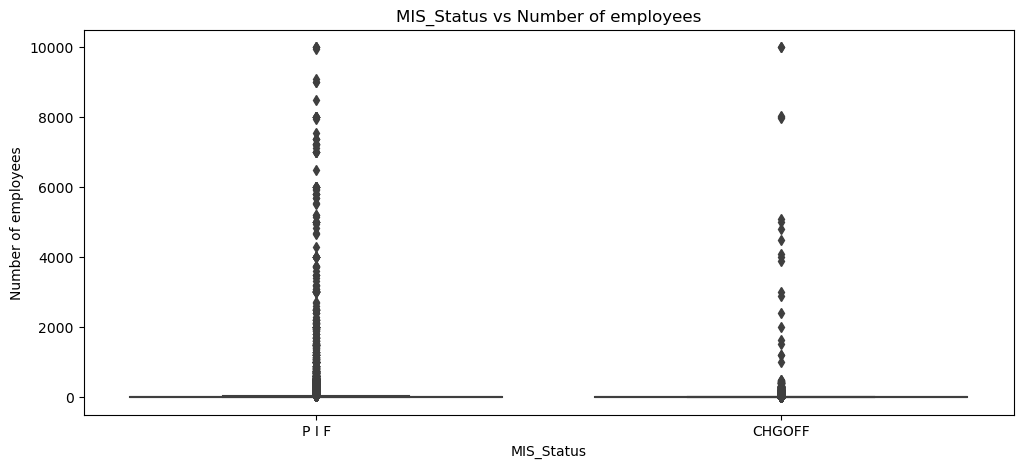

In [19]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x='MIS_Status', y = 'NoEmp', data = loans)  
plt.title("MIS_Status vs Number of employees");
ax.set(xlabel='MIS_Status', ylabel='Number of employees');

There are many outliers and the graphic is not very understandable. Let's remove the outliers from the graph.

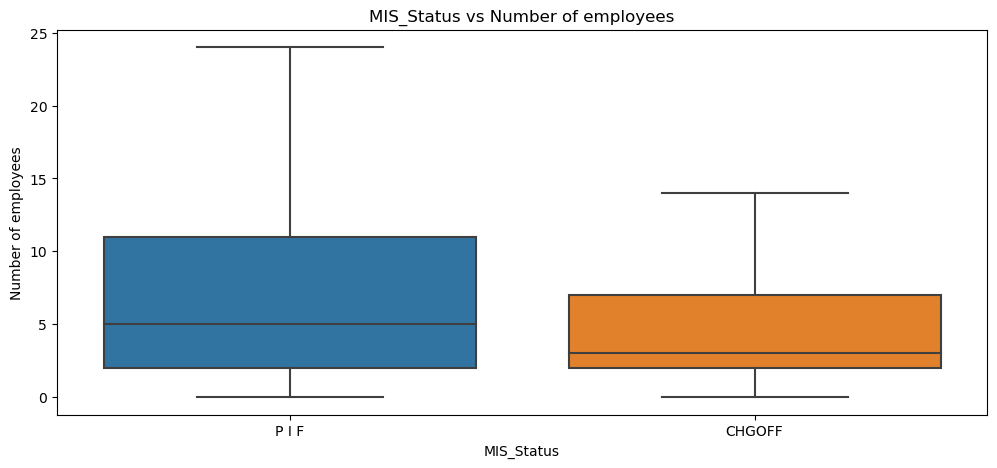

In [20]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x='MIS_Status', y = 'NoEmp', data = loans,  showfliers = False)  
plt.title("MIS_Status vs Number of employees");
ax.set(xlabel='MIS_Status', ylabel='Number of employees');

Recall that those who had problems are those classified as 'CHGOFF', and those who did not have problems are those classified as 'P I F' (paid in full).

We see that, taking outliers, the companies that did not present problems when paying have more employees. This tells us that the greater the number of employees, the more likely payment is without a problem.

We estimate, in principle, that this is because the companies with the largest number of employees are better established. Which leads us to wonder what relationship there is between failing to comply and the company being new. The NewExist field is 1 if the company existed before the loan and 2 if it is new.
 

Let's discuss the percentages of MIS_Status values based on whether it is new or not.

In [21]:
loans[loans['NewExist']==2]['MIS_Status'].value_counts(normalize=True)

P I F     0.812452
CHGOFF    0.187548
Name: MIS_Status, dtype: float64

In [22]:
loans[loans['NewExist']==1]['MIS_Status'].value_counts(normalize=True)

P I F     0.828868
CHGOFF    0.171132
Name: MIS_Status, dtype: float64

Graphically:

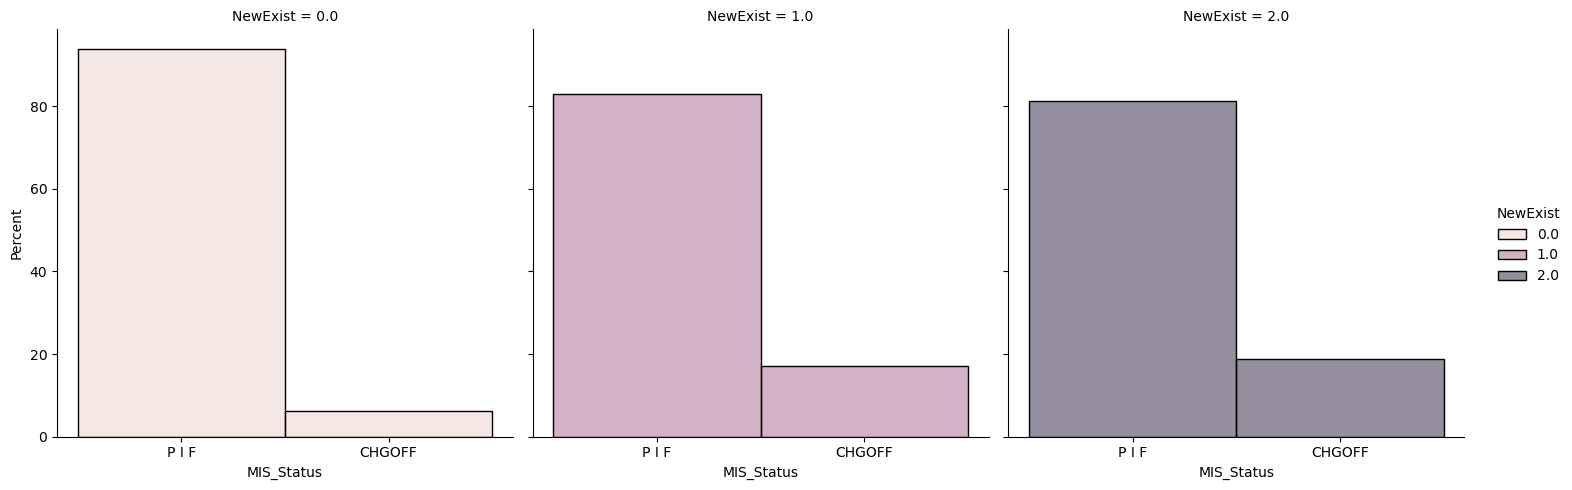

In [23]:
sns.displot(data=loans, x="MIS_Status", col="NewExist", hue="NewExist", stat='percent', common_norm=False);


In [24]:
loans.groupby('NewExist', dropna=False)['MIS_Status'].describe()

,count,unique,top,freq
NewExist,,,,
0.0,1028,2,P I F,965
1.0,643446,2,P I F,533332
2.0,252559,2,P I F,205192
NaN,134,2,P I F,120


We see that there is very little difference in default rates between new and existing businesses. Which rules out the above conjecture.

On the other hand, we see that the NewExist parameter also has 0 values, which we associate with the fact that said parameter is not completed. It is not clear if there is a difference between 0 and the record for the 'NewExist' field being empty.

How many 0 values are in that column?

In [25]:
loans[loans['NewExist']==0].shape[0] #shape[0] returns the number of rows, that is, the number of records where NewExist is equal to 0.

1034

This is a small number compared to the total. We see striking that there is a significant difference between the companies that are not classified (with 0) and those that are classified. This difference cannot be attributed to random error:

In [26]:
# We do an hypothesis test

#We create a column 'MIS_Status_numeric' for analysis. Since we don't want to 
#touch the original dataset in this first analysis, we do it on a copy.
loans_copy = loans.copy()
loans_copy['MIS_Status_numeric'] = loans_copy['MIS_Status']=='CHGOFF'#This new column is 
#True if there were problems with the payment, and False if not.
loans_copy['MIS_Status_numeric'] = loans_copy['MIS_Status_numeric'].astype(int) #We pass 
#this field into binary.

sample_0 = loans_copy[loans_copy['NewExist']==0]['MIS_Status_numeric']
sample_1 = loans_copy[loans_copy['NewExist']!=0]['MIS_Status_numeric']
# sample_0_mean = np.mean(sample_0)
# sample_1_mean = np.mean(sample_1)
# sample_0_std = np.std(sample_0)
# sample_1_std = np.std(sample_1)
# print("sample_0 mean value:",sample_0_mean)
# print("sample_1 mean value:",sample_1_mean)
# print("sample_0 std value:", sample_0_std)
# print("sample_1 std value:", sample_1_std)

ttest,pval = ttest_ind(sample_0,sample_1)
print("p-value:",pval)
if pval <0.05:
  print("We reject null hypothesis.")
else:
  print("We accept null hypothesis.")
print("(The null hypothesis is that the two populations have the same real means).")

p-value: 3.898593127649492e-22
We reject null hypothesis.
(The null hypothesis is that the two populations have the same real means).


The hypothesis test tells us that the difference is real. We do not have an explanation for this difference at this time.

On the other hand, would zeros be the same as nulls? We see a difference in the default rate, but it may be a random error. Let's do a hypothesis test.

In [27]:
# We do an hypothesis test

#We create a column 'MIS_Status_numeric' for analysis. Since we don't want to 
#touch the original dataset in this first analysis, we do it on a copy.
loans_copy = loans.copy()
loans_copy['MIS_Status_numeric'] = loans_copy['MIS_Status']=='CHGOFF'#This new column is 
#True if there were problems with the payment, and False if not.
loans_copy['MIS_Status_numeric'] = loans_copy['MIS_Status_numeric'].astype(int) #We pass 
#this field into binary.

sample_0 = loans_copy[loans_copy['NewExist']==0]['MIS_Status_numeric']
sample_1 = loans_copy[loans_copy['NewExist'].isnull()]['MIS_Status_numeric']
# sample_0_mean = np.mean(sample_0)
# sample_1_mean = np.mean(sample_1)
# sample_0_std = np.std(sample_0)
# sample_1_std = np.std(sample_1)
# print("sample_0 mean value:",sample_0_mean)
# print("sample_1 mean value:",sample_1_mean)
# print("sample_0 std value:", sample_0_std)
# print("sample_1 std value:", sample_1_std)

ttest,pval = ttest_ind(sample_0,sample_1)
print("p-value:",pval)
if pval <0.05:
  print("We reject null hypothesis.")
else:
  print("We accept null hypothesis.")
print("(The null hypothesis is that the two populations have the same real means).")

p-value: 0.06331571220641644
We accept null hypothesis.
(The null hypothesis is that the two populations have the same real means).


So probably 0s are the same as nulls. Before doing the model, we'll fill the nulls in this field with 0s.

----------------------------------------------------------------------

With respect to being an urban or rural company,

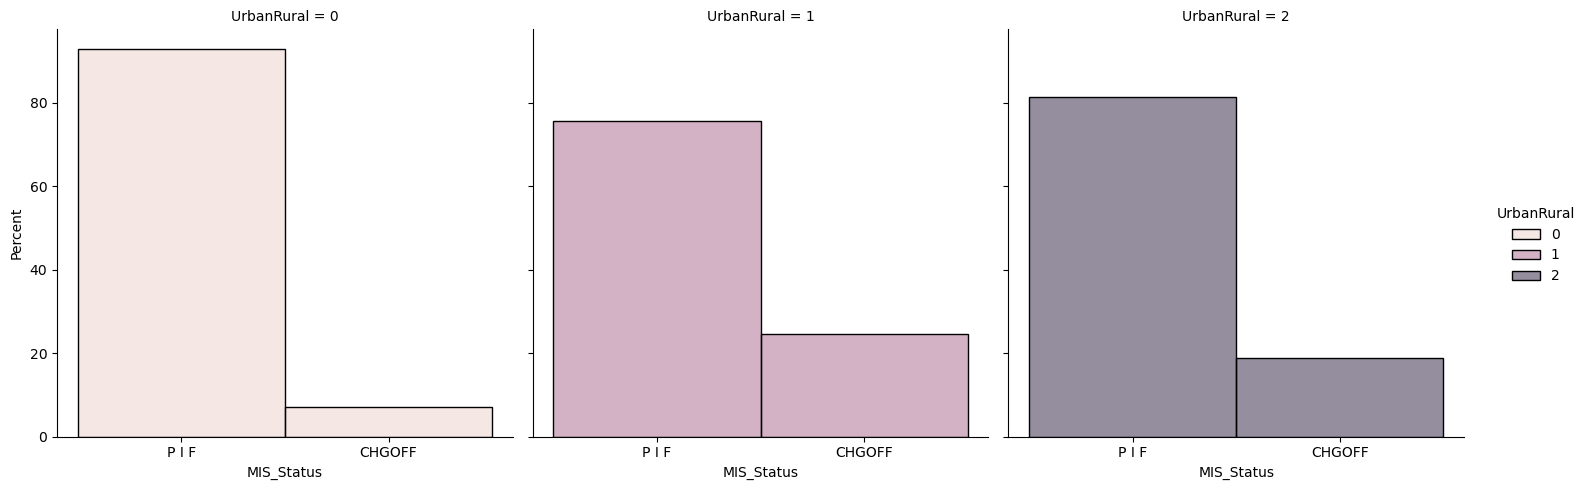

In [28]:
sns.displot(data=loans, x="MIS_Status", col="UrbanRural", hue="UrbanRural", stat='percent', common_norm=False);

we do not see a significant difference in whether it is urban or not. We do see a difference if it is indefinite. This difference is also not due to chance:

In [29]:
sample_0 = loans_copy[loans['UrbanRural']==0]['MIS_Status_numeric']
sample_1 = loans_copy[loans['UrbanRural']==1]['MIS_Status_numeric']

ttest,pval = ttest_ind(sample_0,sample_1)
print("p-value:",pval)
if pval <0.05:
  print("We reject null hypothesis.")
else:
  print("We accept null hypothesis.")
print("(The null hypothesis is that the two populations have the same real means).")

p-value: 0.0
We reject null hypothesis.
(The null hypothesis is that the two populations have the same real means).


Another field that could provide us with information is 'FranchiseCode'. Let's look at it quickly.

In [30]:
loans['FranchiseCode'].value_counts()

1        638554
0        208835
78760      3373
68020      1921
50564      1034
          ...  
24421         1
61615         1
81580         1
83876         1
15930         1
Name: FranchiseCode, Length: 2768, dtype: int64

The franchise code itself is not going to give us useful information, there are too many different values to include it in a predictive model and we have no way of knowing what each code represents. On the other hand, it does seem useful to us to have indicated if it is a franchise or not. According to the information in the dataset, if the code is 0 or 1 it is not a franchise, the rest of the codes mean that it is. So we are going to replace the franchise code field with a field that tells us if it is a franchise or not.

### First insights and conclusions

*   The LoanNr_ChkDgt column is an id so it must be removed.
*   Column 9, that is, ApprovalFY, has multiple types. It should be a date format (if it is date) or integer (if it is year).
*   Columns Name, City, State, Bank, BankState, NewExist, RevLineCr, LowDoc, ChgOffDate, DisbursementDate, MIS_Status have null values.

    The Name, Bank, and ChgOffDate columns we don't think are important and we will remove them. The first 2 because they have too many different values and we don't think they can be included in a model. The third clearly has no predictive value because it indicates the date the default started (if any).
    
     On the other hand, MIS_Status is critical, and all rows with null MIS_Status should be removed as it is the target variable.
*   The NAICS column has zeros. The zeros in this case represent null values. They are more than 22% of the cases.
*   The DisbursementGross, BalanceGross, GrAppv, and SBA_Appv columns are currency values and should be passed to numbers (int or float).
*   The ApprovalDate, DisbursementDate, and ChgOffDate is date data, but they are as strings. In any case, since they are date variables, they are influenced by contextual and unpredictable issues, they will not help us to make a predictive model. Before assembling the model we are going to remove them.
*   There are rows with identical data, rows with duplicate data will be removed.
*   The first two digits of the NAICS column indicate the company's industry sector and should be taken as a new column. The third is the subsector of that industry and we are going to check if it has an impact. Other than those two pieces of information, we don't think the original NAICS column is any more useful and we're going to remove it.
*   The RevLineCr field takes 18 different values when it should take 2. Same thing with LowDoc, it 8 different values when it should take 2. Im both fields, we are going to eliminate all the values that are not 'Y' or 'N', leaving them as NaN. Otherwise we run the risk of introducing an error that can dirty the model. For convenience, we are going to transform them into binary, where 'Y' is 1 and 'N' is 0.
*   The target variable, MIS_Status, would be better having it boolean, it would have to be transformed.
*   There is a clear relationship between the number of employees and the risk of non-payment. The greater the number of employees, the less risk. This relationship is not due to the company being new or not.
*   Loans where the NewExist variable has a value of 0, which is apparently the same as not being classified (null), have less risk of default than those with this variable well classified.

    The nulls of the NewExist variable will be filled with zeros.
    
*   Whether the company is rural or not does not have much impact on payments. It does have some incidence if it is categorized as indefinite.
*   It is necessary to do all the mentioned transformations to be able to graph and try to answer most of the questions.
*   The only useful information that the 'FranchiseCode' field gives us is if the company is a franchise or not. We are going to replace this field with a field that simply indicates whether it is a franchise or not.

### Transformation and creation of fields

#### Pending transformations of the first contact

Let's apply the transformations that we saw necessary in the first part of the EDA.

Looking at the first values of the 'ApprovalFY' column we see that it should be an integer since it is the number of the fiscal year of loan approval. But there is a problem, you can check that NOT all the rows are a pure year. So let's first load that column as a string and then clean up the errors.

In [31]:
loans = pd.read_csv(path + "Should This Loan be Approved or Denied.csv", dtype={'ApprovalFY': str})

In [32]:
print (loans[~loans['ApprovalFY'].str.isdigit()].ApprovalFY) #These are all the rows where the field is not a pure number.

699732    1976A
704030    1976A
705375    1976A
710381    1976A
713245    1976A
748029    1976A
751519    1976A
769515    1976A
775002    1976A
775430    1976A
775978    1976A
776367    1976A
780120    1976A
781090    1976A
784351    1976A
788539    1976A
788661    1976A
793733    1976A
Name: ApprovalFY, dtype: object


In [33]:
loans['ApprovalFY']=loans['ApprovalFY'].str.replace("1976A","1976")    
loans['ApprovalFY']=loans['ApprovalFY'].astype('int')

Now that problem has disappeared, the ApprovalFY field has only one type:

In [34]:
for column in loans.columns:
  print(column, ' ---> ', pd.api.types.infer_dtype(loans[column]))

LoanNr_ChkDgt  --->  integer
Name  --->  string
City  --->  string
State  --->  string
Zip  --->  integer
Bank  --->  string
BankState  --->  string
NAICS  --->  integer
ApprovalDate  --->  string
ApprovalFY  --->  integer
Term  --->  integer
NoEmp  --->  integer
NewExist  --->  floating
CreateJob  --->  integer
RetainedJob  --->  integer
FranchiseCode  --->  integer
UrbanRural  --->  integer
RevLineCr  --->  string
LowDoc  --->  string
ChgOffDate  --->  string
DisbursementDate  --->  string
DisbursementGross  --->  string
BalanceGross  --->  string
MIS_Status  --->  string
ChgOffPrinGr  --->  string
GrAppv  --->  string
SBA_Appv  --->  string


----------------------------------------------------------

Let's throw out the id column:

In [35]:
loans.drop(['LoanNr_ChkDgt'], axis=1, inplace=True);

----------------------------------------------------------

Now we convert the currency fields 'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv' into float format.

In [36]:
loans[['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']] = (loans[['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']]).replace({"[\$]": "", "[,]": ""}, regex=True) 
loans[['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']]=loans[['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']].astype('float')

Now, the fields 'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv' are in correct format:


In [37]:
loans[['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']].head()

,DisbursementGross,BalanceGross,GrAppv,SBA_Appv
0,60000.0,0.0,60000.0,48000.0
1,40000.0,0.0,40000.0,32000.0
2,287000.0,0.0,287000.0,215250.0
3,35000.0,0.0,35000.0,28000.0
4,229000.0,0.0,229000.0,229000.0


----------------------------------------------------------

Let's delete duplicate entries.

In [38]:
loans.duplicated().sum()

128

In [39]:
loans.drop_duplicates(inplace=True)

In [40]:
loans.duplicated().sum()

0

----------------------------------------------------------

Let's replace the field 'FranchiseCode'.

In [41]:
def change_franchise(x):
    if (x == 1) | (x == 0):
        return 0
    else :
        return 1

In [42]:
loans['Is_franchise'] = loans['FranchiseCode'].apply(lambda x: change_franchise(x))

In [43]:
loans.drop(['FranchiseCode'], axis=1,inplace=True)

----------------------------------------------------------

Let's convert the 'MIS_Status' column in a boolean column. In order not to have a problem with some commands, we are going to set them with the values 0 and 1.We are going to call this new column 'Default', so that the value 1 means that the loan had problems in its payment.

In [44]:
loans['Default'] = loans['MIS_Status']=='CHGOFF'#This new column is True if there were problems with the payment, and False if not.
loans['Default'] = loans['Default'].astype(int) #We go to binary.

Because of the way we created this new column, the null values of 'MIS_Status' are zeros of 'Default', but in reality they should be nulls of 'Default' as well. Also remember that rows with null values in 'Default' must be deleted, so we can directly delete those rows and then the values of 'Default' will be correct.

In [45]:
loans.dropna(axis=0, subset=['MIS_Status'], inplace=True)

Now, we can delete 'MIS_Status' column .

In [46]:
loans.drop(['MIS_Status'], axis=1,inplace=True);

----------------------------------------------------------

Although the ApprovalDate, DisbursementDate, and ChgOffDate will be eliminated later because it does not have a predictive value. It will be interesting to plot them to see what incidence the dates on which the events occur have. So let's transform them to date format. Let's see first what format they have.

In [47]:
print(pd.api.types.infer_dtype(loans['ApprovalDate']))
print(pd.api.types.infer_dtype(loans['DisbursementDate']))
print(pd.api.types.infer_dtype(loans['ChgOffDate']))

string
string
string


In [48]:
loans[['ApprovalDate', 'DisbursementDate', 'ChgOffDate']].sample(5)

,ApprovalDate,DisbursementDate,ChgOffDate
107875,28-Apr-06,31-May-06,NaN
12056,21-Feb-06,31-Mar-06,NaN
66869,19-Oct-05,31-Dec-05,1-May-08
239583,27-Feb-07,31-Mar-07,NaN
444014,28-Nov-90,31-Jan-91,NaN


Let's remember that the 'ChgOffDate' column only has content on the loans that had no problems.

In [49]:
print(loans[loans['Default']==True].ChgOffDate.sample(15));

825648    15-Jul-10
147658    19-May-11
202387    25-Jul-13
233663    14-Feb-89
704809    15-Jun-00
368744    20-Apr-10
503593    14-Aug-14
148812     5-Apr-01
134252     7-Sep-10
786538    16-Nov-10
272505    15-Jan-04
280002    26-Sep-08
124103    31-Mar-08
330421     5-Dec-13
466096    19-Apr-06
Name: ChgOffDate, dtype: object


The three columns have a conflicting format because they contain the last two digits of the year, which does not allow them to be transformed directly. Doing a little analysis you can see that the loans are not older than 1966: 

In [50]:
print(loans['ApprovalFY'].min())
print(loans['ApprovalFY'].max())

1966
2014


So it is not difficult to know what should be put in the first two digits of the year.

We make a function that reformats those fields to proper dates.


In [51]:
def clean_date(date_str): 
  '''If a cell is in the format DD-MM-YY where YY are the last two digits of a 
  year between 1924 and 2023, transforms it to DD-MM-YYYY.'''
  if pd.isna(date_str)!=True: #If the string is null, we do nothing.
    date_list = date_str.split('-') 
    if (len(date_list[2])<3):

      if int(date_list[2])<23:
        date_list[2] = '20' + date_list[2]
      else:
        date_list[2] = '19' + date_list[2]
  else:
    date_list=''
  return '-'.join(date_list)

Let's apply this function to the dates fields.

In [52]:
loans['ApprovalDate']=loans['ApprovalDate'].apply(clean_date)
loans['ApprovalDate'] = pd.to_datetime(loans['ApprovalDate'], format='%d-%b-%Y')

In [53]:
loans['DisbursementDate']=(loans['DisbursementDate']).apply(clean_date)
loans['DisbursementDate'] = pd.to_datetime(loans['DisbursementDate'], format='%d-%b-%Y', errors='coerce') #The option 
#errors='coerces' is set to be able to treat nulls, in the previous conversion it was not necessary because it 
#did not have nulls.

In [54]:
loans['ChgOffDate']=(loans['ChgOffDate']).apply(clean_date)
loans['ChgOffDate'] = pd.to_datetime(loans['ChgOffDate'], format='%d-%b-%Y', errors='coerce') 

Now those columns were properly formatted:

In [55]:
loans[['ApprovalDate', 'DisbursementDate', 'ChgOffDate']].sample(15)

,ApprovalDate,DisbursementDate,ChgOffDate
543162,2002-04-09,2002-07-31,NaT
528211,2001-12-31,2002-04-10,NaT
351710,2008-10-02,2009-03-11,NaT
670390,2003-10-23,2004-02-29,NaT
195322,2007-04-06,2007-04-30,NaT
630528,2003-04-22,2003-06-30,NaT
523733,2001-12-03,2001-12-31,NaT
602278,2002-12-26,2003-02-28,2008-01-09
811931,2005-03-15,2005-03-31,NaT
543036,2002-04-08,2002-05-31,2007-03-21


In [56]:
print(pd.api.types.infer_dtype(loans['ApprovalDate']))
print(pd.api.types.infer_dtype(loans['DisbursementDate']))
print(pd.api.types.infer_dtype(loans['ChgOffDate']))

datetime64
datetime64
datetime64


-----------------------------------------------------------------------------------

Let's make the changes we mentioned to the 'RevLineCr' and 'LowDoc' columns.

In [57]:
def Y_and_N_to_binary(x):
    if x == 'Y':
        return 1
    elif x == 'N':
        return 0

In [58]:
# We remove 'RevLineCr' values that shouldn't be there.
loans.loc[~loans['RevLineCr'].isin(['Y', 'N']), 'RevLineCr']=np.nan
# We convert the field in a binary field.
loans['RevLineCr']= loans['RevLineCr'].apply(lambda x: Y_and_N_to_binary(x))

In [59]:
# We remove 'LowDoc' values that shouldn't be there.
loans.loc[~loans['LowDoc'].isin(['Y', 'N']), 'LowDoc']=np.nan 
# We convert the field in a binary field.
loans['LowDoc']= loans['LowDoc'].apply(lambda x: Y_and_N_to_binary(x))

----------------------------------------------------------

Let's create the Sector field.

In [60]:
loans['Sector'] = (loans['NAICS'].astype(str).str[:2])#The str[:2] command extracts the first two digits,
#but it has to be a string, so we put .astype(str) before it.

In the appendix we explore the creation of a subsector field. Based on that, we decided not to include it because we don't think it would contribute much.

### More fields and a little more cleaning

Let's look at the data in the date fields.

In [61]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897072 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Name               897058 non-null  object        
 1   City               897042 non-null  object        
 2   State              897059 non-null  object        
 3   Zip                897072 non-null  int64         
 4   Bank               895567 non-null  object        
 5   BankState          895560 non-null  object        
 6   NAICS              897072 non-null  int64         
 7   ApprovalDate       897072 non-null  datetime64[ns]
 8   ApprovalFY         897072 non-null  int32         
 9   Term               897072 non-null  int64         
 10  NoEmp              897072 non-null  int64         
 11  NewExist           896938 non-null  float64       
 12  CreateJob          897072 non-null  int64         
 13  RetainedJob        897072 non-null  int64   

In [62]:
loans.describe(include = 'all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Name,897058,778679,SUBWAY,1269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,897042,32566,LOS ANGELES,11550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,897059,51,CA,130462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zip,897072.0,NaN,NaN,NaN,53856.416209,0.0,27612.0,55416.0,83706.0,99999.0,31170.270725
Bank,895567,5801,BANK OF AMERICA NATL ASSOC,86768,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BankState,895560,56,CA,118014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NAICS,897072.0,NaN,NaN,NaN,398546.333664,0.0,235210.0,445310.0,561730.0,928120.0,263365.901437
ApprovalDate,897072,NaN,NaN,NaN,2001-05-28 09:48:25.580822784,1966-05-18 00:00:00,1996-11-19 00:00:00,2002-09-26 00:00:00,2006-01-20 00:00:00,2014-06-25 00:00:00,NaN
ApprovalFY,897072.0,NaN,NaN,NaN,2001.139639,1966.0,1997.0,2002.0,2006.0,2014.0,5.912339
Term,897072.0,NaN,NaN,NaN,110.851919,0.0,60.0,84.0,120.0,569.0,78.898567


We see that the minimum values of 'ChgOffPrinGr' and 'DisbursementeDate' are errors, since we have already seen that there are no loans prior to the year 1966.

In [63]:
print(loans['ChgOffDate'].sort_values())

598791   1926-10-22
45932    1988-10-03
39407    1988-10-03
231281   1988-10-03
92765    1988-10-03
            ...    
899158          NaT
899159          NaT
899160          NaT
899161          NaT
899163          NaT
Name: ChgOffDate, Length: 897072, dtype: datetime64[ns]


In [64]:
loans.loc[598791]

Name                        AMG INDUSTRIES, INC.
City                                 GLENS FALLS
State                                         NY
Zip                                        12804
Bank                 GLENS FALLS NATL BK & TR CO
BankState                                     NY
NAICS                                          0
ApprovalDate                 1993-09-14 00:00:00
ApprovalFY                                  1993
Term                                          66
NoEmp                                         85
NewExist                                     1.0
CreateJob                                      0
RetainedJob                                    0
UrbanRural                                     0
RevLineCr                                    0.0
LowDoc                                       0.0
ChgOffDate                   1926-10-22 00:00:00
DisbursementDate             1994-01-31 00:00:00
DisbursementGross                       300000.0
BalanceGross        

The loan was approved in 1993, but there were payment problems in 1926. It is clearly a mistake. On the other hand, the rest of the fields seem coherent. So since this column is going to be deleted at the end, we can ignore it. In any case, we are going to delete this value so that when we graph with respect to this parameter the graphs do not change the scale.

In [65]:
loans['ChgOffDate'].replace('1926-10-22 00:00:00', np.nan, inplace=True)

The same goes for the minimum value and the maximum value of 'DisbursementDate'.

In [66]:
print(loans['DisbursementDate'].sort_values())
print('------------------------------------------------------------')
print(loans['DisbursementDate'].sort_values(ascending=False))

642915   1928-06-18
54648    1948-09-17
49244    1966-08-16
697801   1968-03-19
732056   1968-11-22
            ...    
896387          NaT
897215          NaT
897268          NaT
897488          NaT
897494          NaT
Name: DisbursementDate, Length: 897072, dtype: datetime64[ns]
------------------------------------------------------------
379815   2020-04-14
709337   2014-12-31
402166   2014-07-30
498326   2014-07-05
669507   2014-06-30
            ...    
896387          NaT
897215          NaT
897268          NaT
897488          NaT
897494          NaT
Name: DisbursementDate, Length: 897072, dtype: datetime64[ns]


In [67]:
print(loans.loc[642915])
print('------------------------------------------------------------')
print(loans.loc[54648 ])
print('------------------------------------------------------------')
print(loans.loc[379815])

Name                           KINGS INN
City                             SEATTLE
State                                 WA
Zip                                98121
Bank                           BBCN BANK
BankState                             CA
NAICS                             721110
ApprovalDate         2003-06-18 00:00:00
ApprovalFY                          2003
Term                                 300
NoEmp                                 12
NewExist                             1.0
CreateJob                              0
RetainedJob                            0
UrbanRural                             1
RevLineCr                            0.0
LowDoc                               0.0
ChgOffDate                           NaT
DisbursementDate     1928-06-18 00:00:00
DisbursementGross              1330000.0
BalanceGross                         0.0
ChgOffPrinGr                      $0.00 
GrAppv                         1330000.0
SBA_Appv                        997500.0
Is_franchise    

As before, the rest of the columns appear to contain correct data so we simply delete those values so we don't get scale broken in later visualizations.

In [68]:
loans['DisbursementDate'].replace('1928-06-18', np.nan, inplace=True)
loans['DisbursementDate'].replace('1948-09-17', np.nan, inplace=True)
loans['DisbursementDate'].replace('2020-04-14', np.nan, inplace=True)

----------------------------------------------------------------------------------------------

In the next part of the analysis we are going to analyze the terms of the loans and other date variables. It will be useful to create some fields related to this.

According to the accompanying documentation, the loans of 240 months or more are backed by real estate. This surely influences the default rate, so let's create a new variable indicating this.

In [69]:
def real_estate(x) :
    if x >= 240:
        return 1
    else:
        return 0
    
loans['Real_Estate'] = loans['Term'].apply(lambda x: real_estate(x)) # This field takes the value 1 if the
# loans is backed by real estate, and otherwise.


It's going to be useful to have separate years of loan approval and delivery, so we're going to create columns with those values. 

As we will see later, the period between approval and delivery can be several years. Let's create a field that measures the time difference between loan approval and loan delivery to see what impact it has on compliance. 


In [70]:
loans['DisbursementYear']=loans['DisbursementDate'].dt.year
loans['DisbursementYear']= loans['DisbursementYear'].astype('Int64') #We transform to Int64, because it doesn't 
#let transform to int when there are nulls.
loans['ApprovalYear']=loans['ApprovalDate'].dt.year
loans['ApprovalYear']= loans['ApprovalYear'].astype('Int64') #We transform to Int64, because it doesn't let transform to int when there are nulls.

In [71]:
loans['Days_waiting']=loans['DisbursementDate']-loans['ApprovalDate']

Since the economic situation influences payment compliance, we are going to create related variables. On one hand, we are going to create a variable that indicates whether the fiscal year of the loan was between 2007 and 2009, because the mortgage crisis occurred in those years.

On the other hand, in the appendix we try bringing external data from the most important stock market indices and inflation at the time the loan is granted, to analyze the relationship with defaults. The reason why we do it in the appendix is because the process is quite long and ended up not getting good enough results to include in the final model.

The easy part is to create a variable indicating whether the fiscal year is between 2007 and 2009:

In [72]:
loans['GreatRecession']=loans["ApprovalFY"].between(2007, 2009, inclusive='both')  
loans['GreatRecession'] = loans['GreatRecession'].astype(int) #We go to binary.

-------------------------------------------------------------------------

Another useful fields:

We create a new field which indicates if the company state is the same as the branch bank state or not.

In [73]:
loans['SameState']=loans['State'].eq(loans['BankState']) 

In [74]:
loans.loc[loans['BankState'].isnull(),'SameState']=np.nan # We want field 'SameState' to be null if field 'BankState' is null.
loans.loc[loans['State'].isnull(),'SameState']=np.nan # Same thing if the field State is null.

Fields quantifying the difference between the disbursed amount and the approved amount:

In [75]:
loans['Disb_vs_GrAppv']=loans['DisbursementGross']-loans['GrAppv']
loans['Disb_vs_GrAppv_is_positive']=loans['Disb_vs_GrAppv'].apply(lambda x: np.sign(x)*(np.sign(x)+1)/2) # This 
#formula makes the field equal to 1 if the difference is positive, and 0 otherwise.

----------------------------------------------------------------------------------------------

We are not going to use the NAICS column for anything else so we can throw it away. (The only problem would have been not being able to identify the 'NAICS' zeroes, but we just mentioned that the 'NAICS' zeroes translate exactly to zeros in 'Sector' and '' in 'Subsector').

In [76]:
#loans.to_pickle('Should This Loan be Approved or Denied - After first contact.pkl')

In [77]:
#loans = pd.read_pickle(path + 'Should This Loan be Approved or Denied - After first contact.pkl') 

In [78]:
loans.drop(['NAICS'], axis=1,inplace=True)

### A deeper analysis

Now that we've reformatted several columns, cleaned up the date fields, and added some useful columns, we can take a deeper look at the data and draw more conclusions regarding the questions asked in Business Target.

In [79]:
def describe_values(df, category_col, column_to_analyze):
  '''It does the same as df.groupby(category_col)[column_to_analyze].describe() but with more information, but it has 
  the problem that it couldn't handle null values'''

  #create a dataframe with specific columns

  df_info = pd.DataFrame(columns=['count', 'missing', 'unique_values', 'mean', 'std', 'mode', 'min', '25%', '50%', '75%', 'max', 'skew', 'kurtosis'])
  df_info.index.name = category_col # The name in the index appears in the name of the first column
  #loop of all the values that the category has
  for val in df[category_col].unique():

      # get info from column
      data_series = df[df[category_col]==val][column_to_analyze]
      # fill dataframe with initial columns
      df_info.loc[val] = [data_series.count(), data_series.isnull().sum(),  data_series.nunique(), data_series.mean(), data_series.std(), data_series.mode().iloc[0], data_series.min(), data_series.quantile(.25), data_series.quantile(.5), data_series.quantile(.75), data_series.max(), data_series.skew(), data_series.kurtosis()]

  return df_info

To better guide us in each analysis, let's make a correlation table for all the fields.

In [80]:
matrix_correlation = loans.corr(method='spearman') 
matrix_correlation

C:\Users\Hernán\AppData\Local\Temp\ipykernel_6624\2899753925.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_correlation = loans.corr(method='spearman')


,Zip,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Is_franchise,Default,Real_Estate,DisbursementYear,ApprovalYear,GreatRecession,Disb_vs_GrAppv,Disb_vs_GrAppv_is_positive
Zip,1.000000,-0.037291,0.142021,0.058338,-0.045468,0.025184,-0.025046,-0.070053,-0.047594,-0.029773,0.113149,-0.000501,0.117162,0.129362,0.009281,-0.003762,0.127360,-0.042701,-0.036885,0.012870,-0.053929,-0.049046
ApprovalFY,-0.037291,1.000000,-0.297596,-0.226573,0.042463,0.268305,0.545965,0.763407,0.448100,-0.219559,-0.221462,0.002936,-0.299925,-0.365766,-0.032068,0.254399,-0.214148,0.992589,0.996481,0.550360,0.341142,0.382457
Term,0.142021,-0.297596,1.000000,0.200100,-0.027447,0.081731,-0.157349,-0.213597,-0.397727,-0.066778,0.522206,-0.000027,0.558661,0.589981,0.075770,-0.409594,0.656294,-0.288247,-0.297365,-0.165812,-0.290763,-0.300541
NoEmp,0.058338,-0.226573,0.200100,1.000000,-0.252421,0.033290,0.123323,-0.177841,-0.206860,-0.085551,0.445449,-0.000360,0.455376,0.449315,0.042903,-0.117281,0.219412,-0.221966,-0.226622,-0.119818,-0.119598,-0.133217
NewExist,-0.045468,0.042463,-0.027447,-0.252421,1.000000,0.050815,-0.152636,0.028980,-0.088781,0.161950,-0.091960,0.001921,-0.070764,-0.049745,0.141762,0.020103,-0.099439,0.042517,0.042067,0.042413,-0.067283,-0.070915
CreateJob,0.025184,0.268305,0.081731,0.033290,0.050815,1.000000,0.377038,0.230258,0.106165,-0.240514,0.109542,0.002555,0.093025,0.077309,0.048917,0.052946,0.209166,0.276676,0.268834,0.132232,0.015011,0.031814
RetainedJob,-0.025046,0.545965,-0.157349,0.123323,-0.152636,0.377038,1.000000,0.467357,0.482753,-0.352983,-0.069480,0.000197,-0.137278,-0.203792,-0.044925,0.155498,-0.049672,0.543449,0.546860,0.256422,0.275205,0.309325
UrbanRural,-0.070053,0.763407,-0.213597,-0.177841,0.028980,0.230258,0.467357,1.000000,0.466107,-0.156158,-0.145382,0.002411,-0.201965,-0.258091,-0.009801,0.172524,-0.155246,0.762240,0.763224,0.280670,0.245620,0.283157
RevLineCr,-0.047594,0.448100,-0.397727,-0.206860,-0.088781,0.106165,0.482753,0.466107,1.000000,-0.221744,-0.298980,0.000753,-0.469229,-0.560027,-0.094457,0.130718,-0.291783,0.452154,0.448115,0.190010,0.715466,0.770562
LowDoc,-0.029773,-0.219559,-0.066778,-0.085551,0.161950,-0.240514,-0.352983,-0.156158,-0.221744,1.000000,-0.188681,-0.000629,-0.137498,-0.070891,0.027935,-0.084162,-0.140556,-0.222657,-0.219531,-0.153702,-0.139500,-0.172953


We look at the pairs of variables whose Spearman correlation has an absolute value greater than or equal to 0.5.

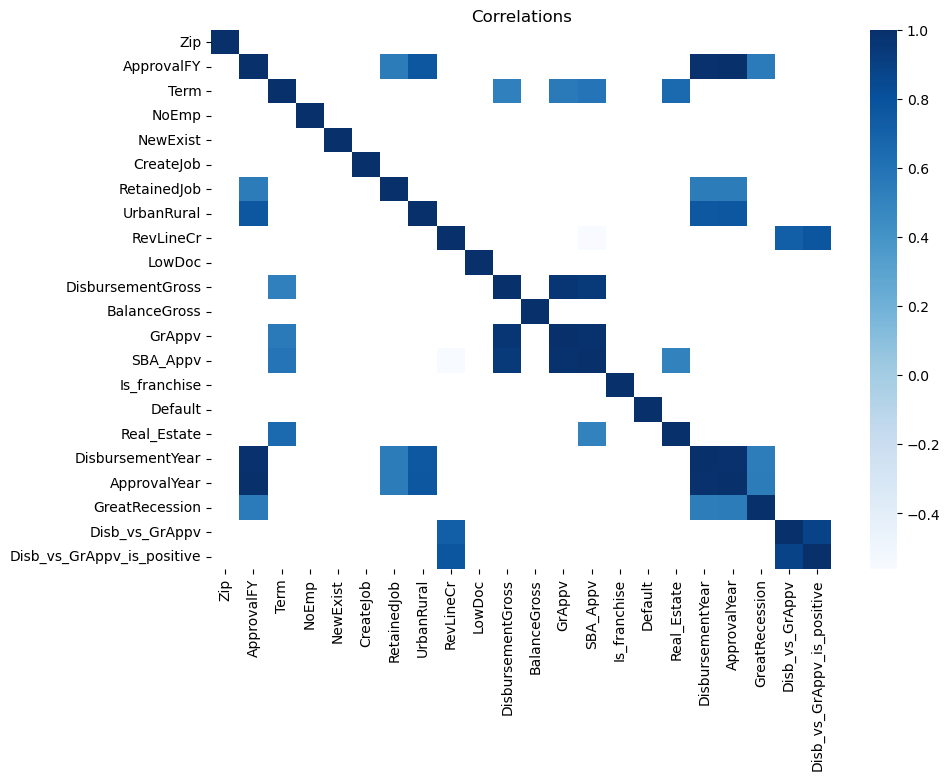

In [81]:
weak_corr = matrix_correlation[np.abs(matrix_correlation)>=.5] 
plt.figure(figsize=(10,7))
sns.heatmap(weak_corr, cmap="Blues")
plt.title('Correlations');

#### Banks

Let's analyze the banks that grant the loans. Will there be banks where there are more defaults than in others?

First let's look at how many different banks there are.

In [82]:
print(loans['Bank'].unique().size)

5802


In [83]:
loans['Bank'].value_counts()

BANK OF AMERICA NATL ASSOC        86768
WELLS FARGO BANK NATL ASSOC       63459
JPMORGAN CHASE BANK NATL ASSOC    48126
U.S. BANK NATIONAL ASSOCIATION    35109
CITIZENS BANK NATL ASSOC          33769
                                  ...  
BANK OF IDAHO HOLDING COMPANY         1
APPLE CREEK BK. CO                    1
HERITAGE BK E. BAY A DIVISION         1
ELKHORN VALLEY BANK & TRUST           1
DEPCO                                 1
Name: Bank, Length: 5801, dtype: int64

We see that there are 5801 different banks, with very varied amounts of loans (when we ask for unique values it returns 5802 because it includes the case where the bank name is null). There are banks with tens of thousands of loans, while there are others with only one. 

In [84]:
group_bank= loans.groupby(['Bank']).agg(Default_rate=('Default', 'mean'), Amount_of_loans=('Bank', 'count'), Average_disbursement_amount=('DisbursementGross', 'mean')).sort_values(by=['Amount_of_loans'], ascending=False)                                     
group_bank=group_bank.reset_index() # We put the bank as a column, creating a new index.
group_bank # Note that we order the banks from highest to lowest number of loans.

,Bank,Default_rate,Amount_of_loans,Average_disbursement_amount
0,BANK OF AMERICA NATL ASSOC,0.275609,86768,7.974725e+04
1,WELLS FARGO BANK NATL ASSOC,0.141304,63459,2.238968e+05
2,JPMORGAN CHASE BANK NATL ASSOC,0.275007,48126,1.282564e+05
3,U.S. BANK NATIONAL ASSOCIATION,0.174685,35109,1.770605e+05
4,CITIZENS BANK NATL ASSOC,0.223015,33769,7.465729e+04
...,...,...,...,...
5796,GATEWAY COMMERCIAL BANK,0.000000,1,5.000000e+06
5797,TECHE BANK & TRUST COMPANY,1.000000,1,2.600000e+05
5798,G W JONES EXCHANGE BANK,1.000000,1,3.500000e+05
5799,AMER BK & TR WISCONSIN,0.000000,1,3.500000e+04


Half of the banks have fewer than 10 loans:

In [85]:
group_bank['Amount_of_loans'].describe()

count     5801.000000
mean       154.381486
std       1831.563925
min          1.000000
25%          3.000000
50%          9.000000
75%         38.000000
max      86768.000000
Name: Amount_of_loans, dtype: float64

Let's see what happens with the default rate of each bank.

In [86]:
group_bank['Default_rate'].describe()

count    5801.000000
mean        0.171263
std         0.263405
min         0.000000
25%         0.000000
50%         0.076923
75%         0.200000
max         1.000000
Name: Default_rate, dtype: float64

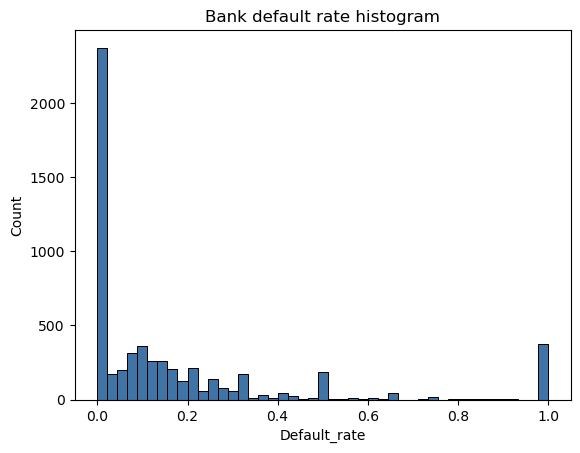

In [87]:
sns.histplot(x='Default_rate',
            data=group_bank,
            color='#004488').set(title='Bank default rate histogram');

50% of banks have a default rate of 7% or less, but this is because of what we just saw: Most banks have very few loans.

If we take the banks with at least 5,000 loans, the story is very different: 

In [88]:
group_bank_5000=group_bank[group_bank['Amount_of_loans']>4999];
group_bank_5000=group_bank_5000.sort_values(by='Default_rate', ascending=False);
print(group_bank_5000.info());
# There are 27 banks with 5000 or more loans, now it is more reasonable to make 
#a plot by putting the bank on the x-axis.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 6 to 20
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Bank                         27 non-null     object 
 1   Default_rate                 27 non-null     float64
 2   Amount_of_loans              27 non-null     int64  
 3   Average_disbursement_amount  27 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB
None


In [89]:
group_bank_5000

,Bank,Default_rate,Amount_of_loans,Average_disbursement_amount
6,BBCN BANK,0.549569,22978,76862.195535
18,BANCO POPULAR NORTH AMERICA,0.423232,7171,209510.261191
7,CAPITAL ONE NATL ASSOC,0.413044,22247,58247.629478
22,"BUSINESS LOAN CENTER, LLC",0.309334,6278,410210.697197
0,BANK OF AMERICA NATL ASSOC,0.275609,86768,79747.253146
2,JPMORGAN CHASE BANK NATL ASSOC,0.275007,48126,128256.378673
24,UMPQUA BANK,0.266439,6144,218677.251953
9,"READYCAP LENDING, LLC",0.266223,10664,449590.229089
4,CITIZENS BANK NATL ASSOC,0.223015,33769,74657.291125
15,CALIFORNIA BANK & TRUST,0.210919,7510,215731.078162


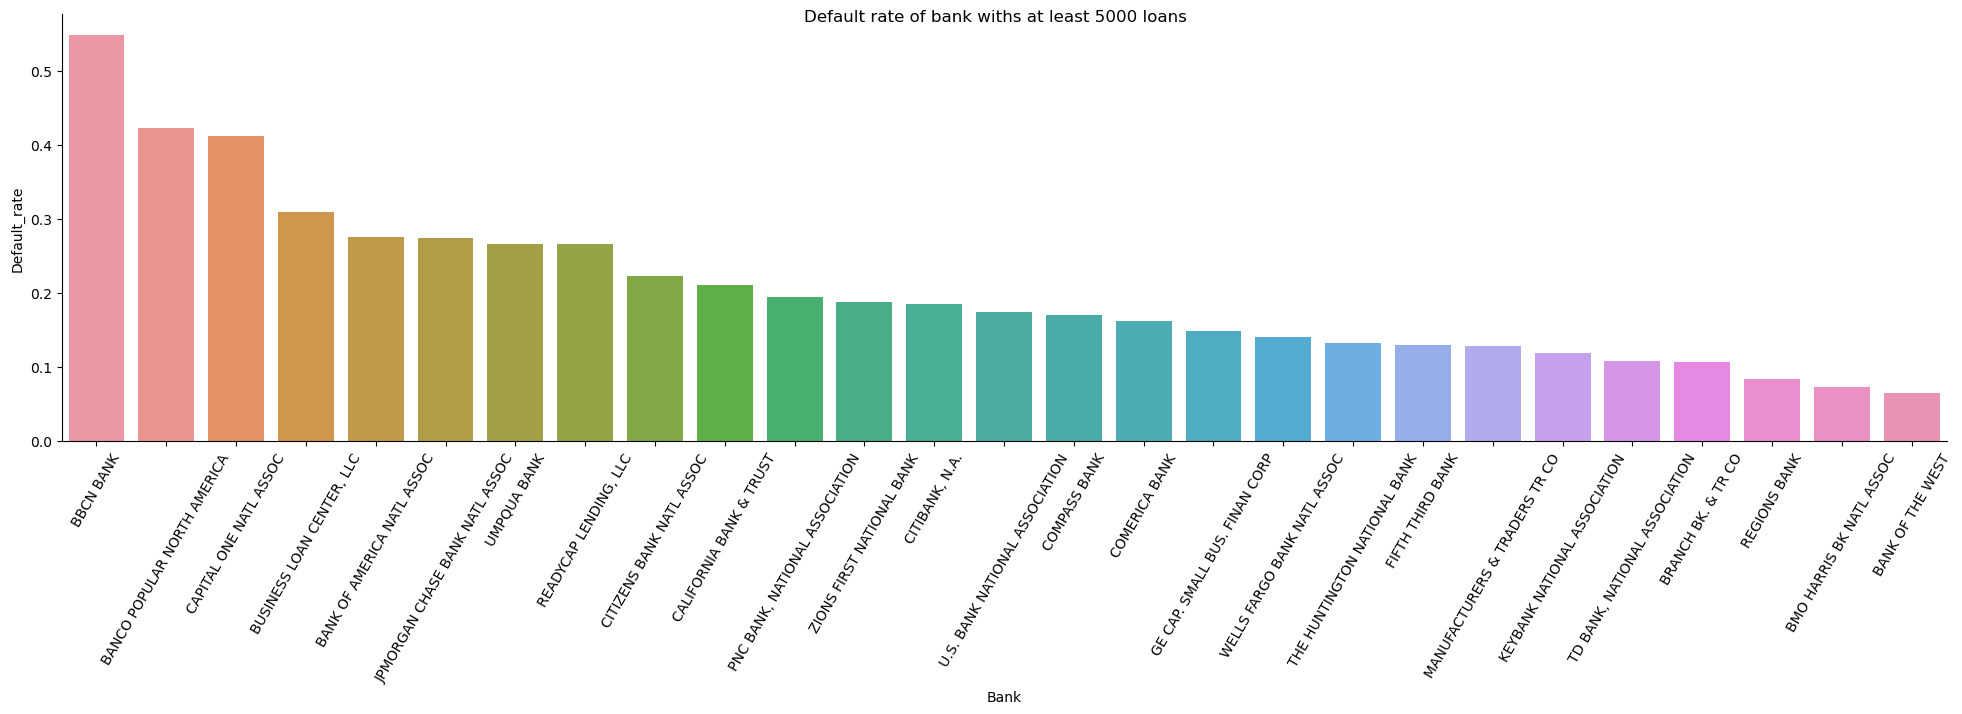

In [90]:
g=sns.catplot( data=group_bank_5000, x="Bank", y="Default_rate", kind="bar", aspect=4);
g.set_xticklabels(rotation=60);
g.fig.suptitle('Default rate of bank withs at least 5000 loans');

In [91]:
group_bank_5000['Default_rate'].describe()

count    27.000000
mean      0.204616
std       0.115243
min       0.064323
25%       0.129578
50%       0.174685
75%       0.266331
max       0.549569
Name: Default_rate, dtype: float64

Wrapping up, the default rate is closely related to the bank, although we are not sure if this will help us to build a predictive model due to the large number of banks, at least without ruling out banks.

Another idea we can explore is this: In a way, the amount of a bank's loans is a measure of how important it is. Will the default rate depend on how important it is? Or in terms of our data, is there a correlation between the default rate and the number of loans each bank took out?

The answer to this is no, but we leave this analysis in the appendix as it would be going too far off topic.

#### States

We ask ourselves how much is the incidence of the company's state of origin in the repayment of the loans.



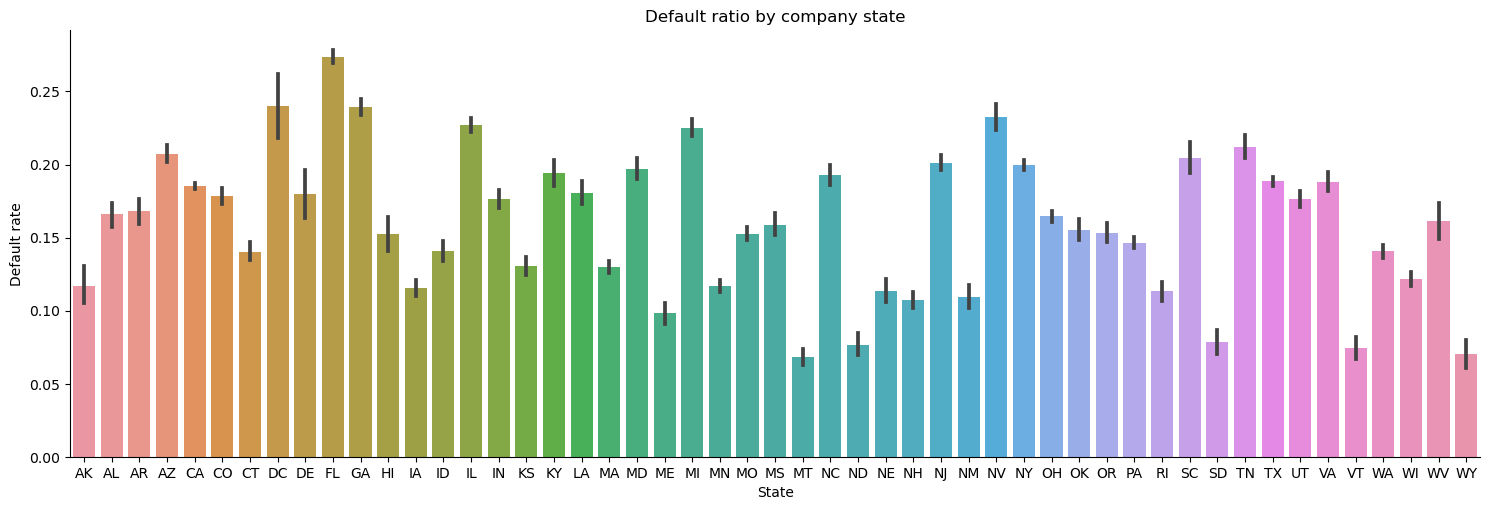

In [92]:
sns.catplot( data=loans.sort_values(by='State'), x="State", y="Default", kind="bar", aspect=3); # On the y-axis plots
#an average of 'Default' field. That is, the default ratio.
plt.ylabel('Default rate');
plt.title("Default ratio by company state");

#Versión en español
#plt.title("Tasa de default por estado origen de la empresa", size=12);
#plt.xlabel("Estado de la empresa", size=10)
#plt.ylabel("Tasa de default", size=10)
#plt.tight_layout()
#plt.savefig("Default_by_company_state.png", dpi=100)

(The lines over the bars indicate a 95% confidence interval of the mean assuming random sampling).

We see that there are states where the risk of default is significantly higher than in others. This may be due to employment laws, the wealth of the state, and cultural factors.

Will the same happen with the state of the bank branch?

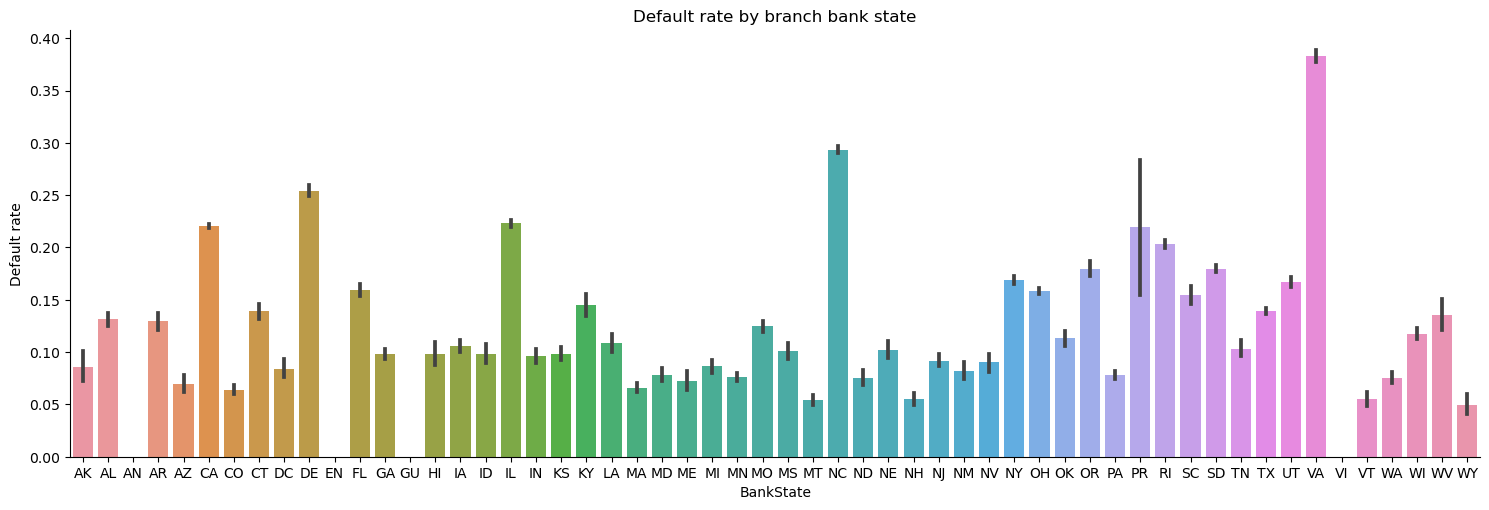

In [93]:
sns.catplot( data=loans.sort_values(by='BankState'), x="BankState", y="Default", kind="bar", aspect=3); 
plt.ylabel('Default rate');
plt.title("Default rate by branch bank state");

#plt.ylabel("Tasa de default", size=10)
#plt.title("Tasa de default por estado de la sucursal bancaria", size=12);
#plt.xlabel("Estado de la sucursal bancaria", size=10)


#plt.tight_layout()
#plt.savefig("Default_by_bank_state.png", dpi=100)

It is interesting to see that the differences in the default rate with respect to the state of the bank branch is even greater than the differences regarding the state of the company. For example, if the bank is from VA (Virginia) the drawbacks are around 40%. A really high value.

But we have to be a bit careful because if you look at the state of the company and the state of the branch bank, the default rate in most of these combinations is calculated based on too few values to draw statistically reliable conclusions. (The default rate table of State vs. BankState is in appendix).

It is more useful to consider whether the state of the company is the same as the state of the branch bank or not. Let's look at the statistics of the default column according to this field.

In [94]:
loans.groupby('SameState', dropna=False)['Default'].describe() # Describe_values can't handle null values.

,count,mean,std,min,25%,50%,75%,max
SameState,,,,,,,,
False,422189.0,0.255108,0.435923,0.0,0.0,0.0,1.0,1.0
True,473358.0,0.105161,0.306762,0.0,0.0,0.0,0.0,1.0
NaN,1525.0,0.048525,0.214942,0.0,0.0,0.0,0.0,1.0


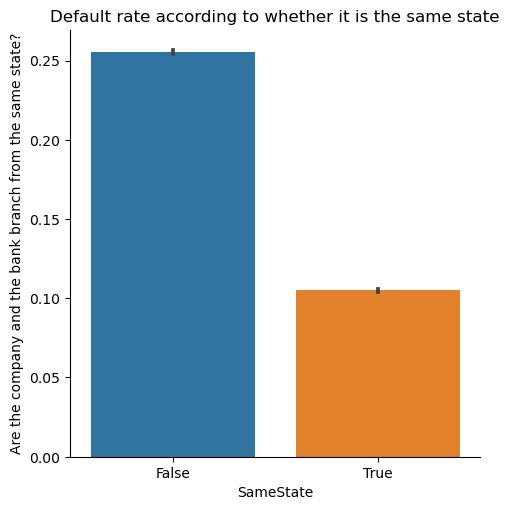

In [95]:
sns.catplot( data=loans, x='SameState', y="Default", kind="bar", aspect=1);
plt.title("Default rate according to whether it is the same state", size=12);
plt.ylabel('Default rate', size=10);
plt.ylabel('Are the company and the bank branch from the same state?', size=10);


#sns.catplot( data=loans, x='SameState', y="Default", kind="bar", aspect=1);
#plt.title("Tasa de default según si es mismo estado", size=12);
#plt.ylabel('Tasa de default', size=10);
#plt.xlabel('¿Empresa y sucursal son del mismo estado?', size=10);

#plt.tight_layout()
#plt.savefig("Default_by_samestate.png", dpi=100)

The default rate when the state of the branch bank is different from that of the company is 2.5 times higher! This is definitely an important fact to keep in mind.

On the other hand, according to the default rate table of 'SameState' category, the null values would seem to be closer to being the bank and the company from the same state. But we cannot guarantee this and a null value would be more associated with not being categorized. By construction, that null value of the 'SameState' field is because the StateBank field is empty (and most likely the Bank field) or the State field is empty. We decided to fill all the nulls in the 'State', 'Bank', 'BankState' and 'SameState' fields with the new value 'Unknown'. There are not many rows of these:

In [96]:
(loans['BankState'].isnull()|loans['State'].isnull()).sum()

1525

 --------------------------

If we break down the state of the branch bank according to whether it is different from that of the company requesting the loan, we can see the following:

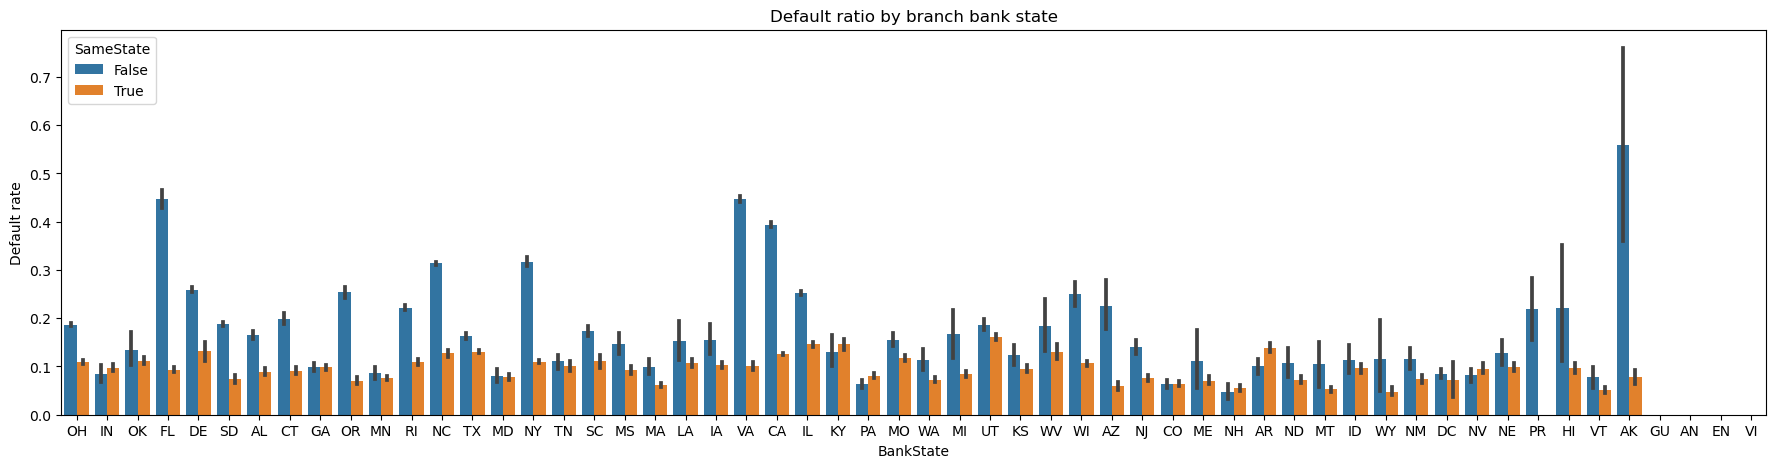

In [97]:
ax=sns.barplot(y='Default', x='BankState', data=loans, hue='SameState')
ax.figure.set_size_inches(22,5)
plt.ylabel('Default rate');
plt.title("Default ratio by branch bank state"); 

Here we see again the great difference that there is if the bank branch is in the same state or not. If we only look at the state of the bank branches For banks where the status is the same as that of the company, the default rate in the statements of the branches remains much more even and similar.

We notice that there are some states ('GU', 'AN', 'EN', 'VI') that do not have bars, but that is because they have very few loans and the default rate is not calculated:

In [98]:
loans['BankState'].value_counts()

CA    118014
NC     79449
IL     65855
OH     58425
SD     51065
TX     47758
RI     44115
NY     39544
VA     28959
DE     24520
MN     19950
UT     18994
PA     17036
WI     15402
MO     14840
MA     13843
GA     13805
FL     13803
AL     12127
OR     11369
WA     10687
CO     10580
CT      9905
IA      9860
NJ      9434
KS      8869
MT      7848
IN      7618
SC      7471
MI      7365
OK      7322
MD      6993
NH      6794
AR      6311
MS      5923
TN      5619
NE      5333
ND      5103
LA      5057
VT      4751
NM      4416
KY      4380
NV      4323
ID      4313
DC      4003
AZ      3957
ME      3689
HI      2989
WY      2167
WV      2006
AK      1438
PR       155
GU         5
AN         1
EN         1
VI         1
Name: BankState, dtype: int64

We conclude that it is more important if the state of the bank branch is equal to that of the company than the state of the branch itself.

#### Franchise

Is there much difference in the default rate if the company is a franchise or not?

In [99]:
describe_values(loans, 'Is_franchise', 'Default')

,count,missing,unique_values,mean,std,mode,min,25%,50%,75%,max,skew,kurtosis
Is_franchise,,,,,,,,,,,,,
0,845344.0,0.0,2.0,0.177084,0.381740,0.0,0.0,0.0,0.0,0.0,1.0,1.691814,0.862237
1,51728.0,0.0,2.0,0.151949,0.358975,0.0,0.0,0.0,0.0,0.0,1.0,1.939217,1.760631


We see that no, there is little in the default rate if the company is a franchise. It is a variable that is not important in the model.

#### Business sector

And what happens with the industry sector? Will the default rate depend a lot on the sector?

Text(0.5, 1.0, 'Non-compliance with payments by sector')

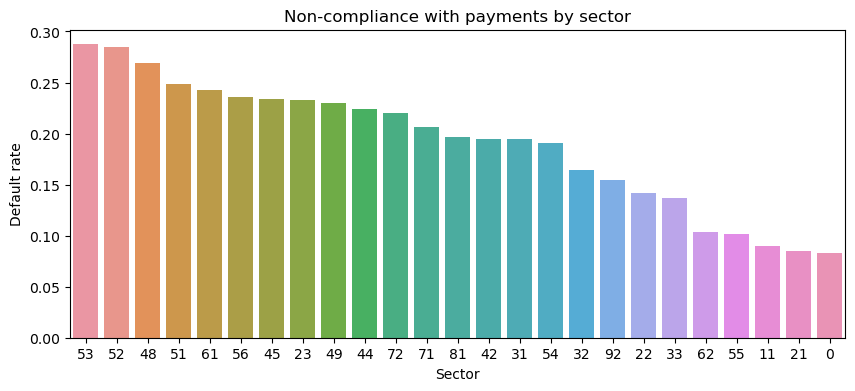

In [100]:
plt.figure(figsize=(10,4))
g=loans.groupby('Sector')['Default'].mean().sort_values(ascending=False)
sns.barplot(x=g.index, y=g.values)
plt.xlabel("Sector", size=10)
plt.ylabel("Default rate", size=10)
plt.title("Non-compliance with payments by sector", size=12)
#plt.xlabel("Sector industrial", size=10)
#plt.ylabel("Tasa de default", size=10)
#plt.title("Inconvenientes en los pagos por sector", size=12)

#plt.tight_layout()
#plt.savefig("Default_by_sector.png", dpi=100)

To understand this better, let's look at the table of sector codes again.

|Sector |	Description|
|-------|----------------|
11 | Agriculture, forestry, fishing and hunting
21 |	Mining, quarrying, and oil and gas extraction
22 |	Utilities
23 |	Construction
31–33 |	Manufacturing
42 |	Wholesale trade
44–45 |	Retail trade
48–49 |	Transportation and warehousing
51 |	Information
52 |	Finance and insurance
53 |	Real estate and rental and leasing
54 |	Professional, scientific, and technical services
55 |	Management of companies and enterprises
56 |	Administrative and support and waste management and remediation services
61 |	Educational services
62 |	Health care and social assistance
71 |	Arts, entertainment, and recreation
72 |	Accommodation and food services
81 |	Other services (except public administration)
92 |  Public administration

We see that there are sectors such as 52 and 53 ("Finance and insurance" and "Real estate and rental and leasing", respectively) where the default rate is close to 30%, while other sectors such as 11 and 21 (" Agriculture, forestry, fishing and hunting" and "Mining, quarrying, and oil and gas extraction", respectively) where the percentage is less than 10%.

The statistical values of the Default field for each sector is:

In [101]:
default_by_sector = describe_values(loans, 'Sector', 'Default').sort_values(by='mean')
default_by_sector
# Short version of this: loans.groupby('Sector')['Default'].describe().sort_values(by='mean')

,count,missing,unique_values,mean,std,mode,min,25%,50%,75%,max,skew,kurtosis
Sector,,,,,,,,,,,,,
0,201657.0,0.0,2.0,0.083305,0.276343,0.0,0.0,0.0,0.0,0.0,1.0,3.015811,7.095188
21,1851.0,0.0,2.0,0.084819,0.278687,0.0,0.0,0.0,0.0,0.0,1.0,2.982768,6.904365
11,8994.0,0.0,2.0,0.090282,0.286602,0.0,0.0,0.0,0.0,0.0,1.0,2.859777,6.179699
55,256.0,0.0,2.0,0.101562,0.302664,0.0,0.0,0.0,0.0,0.0,1.0,2.653603,5.081245
62,55263.0,0.0,2.0,0.103795,0.304997,0.0,0.0,0.0,0.0,0.0,1.0,2.598191,4.750768
33,38195.0,0.0,2.0,0.136431,0.343251,0.0,0.0,0.0,0.0,0.0,1.0,2.118496,2.488156
22,662.0,0.0,2.0,0.141994,0.349308,0.0,0.0,0.0,0.0,0.0,1.0,2.056014,2.233933
92,227.0,0.0,2.0,0.154185,0.361924,0.0,0.0,0.0,0.0,0.0,1.0,1.927967,1.732242
32,17903.0,0.0,2.0,0.163883,0.370180,0.0,0.0,0.0,0.0,0.0,1.0,1.816168,1.298612


In [102]:
print(f'The median default rate for the sectors is {default_by_sector["mean"].median()}. In other words, half of the sectors have a default rate less or equal to {default_by_sector["mean"].median()}.')

The median default rate for the sectors is 0.19655215283245617. In other words, half of the sectors have a default rate less or equal to 0.19655215283245617.


#### Variables related to the credit line and loan amounts

Recall the difference between the 'DisbursementGross', 'GrAppv' and 'SBA_Appv' fields. 'GrAppv' is the amount approved by the bank for the loan; SBA_Appv' is the amount guaranteed by the SBA, that is to say that this amount is given by the SBA to the bank in case the loan defaults and the company does not repay it; 'DisbursementGross' is the total amount delivered.

In [103]:
loans[['DisbursementGross', 'GrAppv', 'SBA_Appv']].head(10)

,DisbursementGross,GrAppv,SBA_Appv
0,60000.0,60000.0,48000.0
1,40000.0,40000.0,32000.0
2,287000.0,287000.0,215250.0
3,35000.0,35000.0,28000.0
4,229000.0,229000.0,229000.0
5,517000.0,517000.0,387750.0
6,600000.0,600000.0,499998.0
7,45000.0,45000.0,36000.0
8,305000.0,305000.0,228750.0
9,70000.0,70000.0,56000.0


Let's analyze the influence between whether the line of credit is renewable or not. To do this, let's first see the difference between the amount granted and the amount approved by the bank. If we define a new field equal to this difference, a positive value indicates that more was delivered than approved. This is closely related to the type of credit line, if this credit line is renewable, it is not uncommon for said difference to be positive because credit can continue to be requested after having paid part of what was previously delivered.

The latter is clearly seen in the following graph:

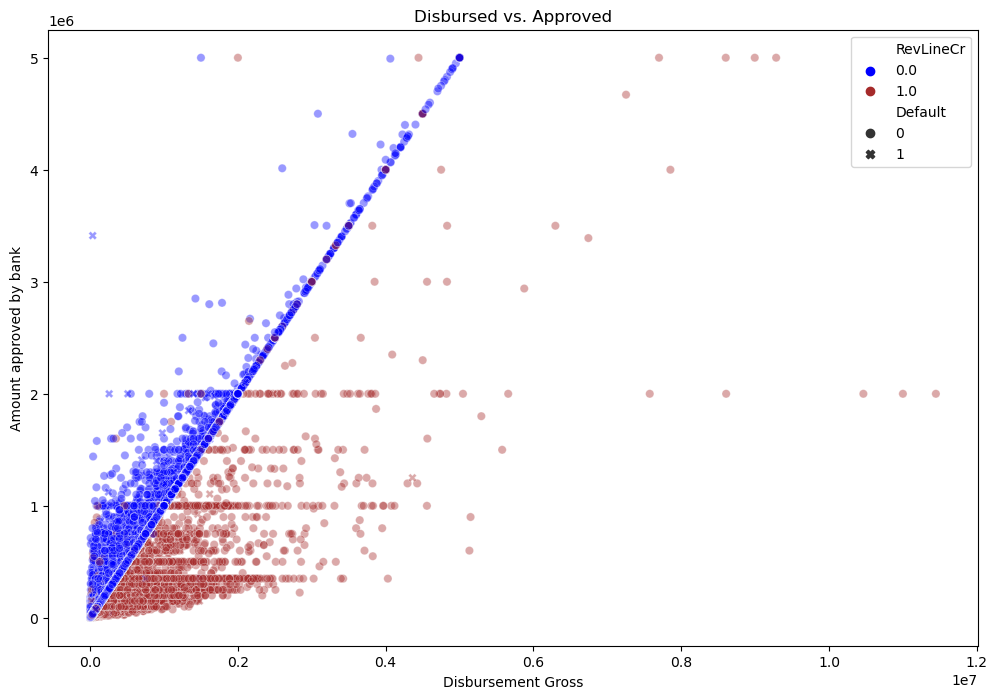

In [104]:
fig, ax = plt.subplots(figsize=(12, 8))
ax=sns.scatterplot(x=loans['DisbursementGross'] , y=loans['GrAppv'], hue=loans['RevLineCr'], style=loans['Default'], alpha=0.4, palette=['blue','brown']);
plt.legend(loc='upper right');
ax.set(xlabel='Disbursement Gross', ylabel='Amount approved by bank',title = 'Disbursed vs. Approved') ;

The diagonal line represents when the same amount of money was disbursed as that approved by the bank. We see that to the right of that diagonal there are no points that have 'N' in the 'RevLineCr' field (although we will see in a while that there are, but they are very few).

But with the graph above we realize that the difference between what is lent and what the bank approves can serve as a variable to analyze other variables. This difference already has a name, we called it 'Disb_vs_GrAppv'. And we have a variable that indicates if this difference is positive or not, 'Disb_vs_GrAppv_is_positive'.

These new variables are good tools to try to classify the null values that the 'RevLineCr' field has. Let's do that.

In [105]:
loans.groupby(['RevLineCr'], dropna=False).agg(Number_of_loans=('DisbursementGross', 'count'), 
    Mean_disbursed=('DisbursementGross', 'mean'), Max_Disb_vs_GrAppv =('Disb_vs_GrAppv', 'max'), 
    Min_Disb_vs_GrAppv =('Disb_vs_GrAppv', 'min'), Mean_Disb_vs_GrAppv =('Disb_vs_GrAppv', 'mean'), 
    Disb_vs_GrAppv_positive_mean=('Disb_vs_GrAppv_is_positive', 'mean'), 
    Default_rate=('Default', 'mean')).sort_values(by='Number_of_loans', ascending=False)

,Number_of_loans,Mean_disbursed,Max_Disb_vs_GrAppv,Min_Disb_vs_GrAppv,Mean_Disb_vs_GrAppv,Disb_vs_GrAppv_positive_mean,Default_rate
RevLineCr,,,,,,,
0.0,419178,222235.275489,1121117.0,-3500000.0,-2413.737484,0.009905,0.146480
NaN,277240,239885.764432,4784780.0,-1719300.0,-1008.794232,0.033888,0.162913
1.0,200654,105580.576201,9446325.0,-3000000.0,44613.753785,0.709634,0.254119


In [106]:
loans.drop(['Name', 'Zip', 'City', 'State', 'Bank', 'BankState', 'ChgOffDate','ChgOffPrinGr'], axis=1).groupby(['RevLineCr'], dropna=False).agg(['median', 'mean']).T


RevLineCr                                                    0.0  \
ApprovalDate               median            1997-01-29 00:00:00   
                           mean    1998-10-09 06:35:42.902537856   
ApprovalFY                 median                         1997.0   
                           mean                      1998.504948   
Term                       median                           84.0   
                           mean                       126.061341   
NoEmp                      median                            5.0   
                           mean                        14.425192   
NewExist                   median                            1.0   
                           mean                         1.296847   
CreateJob                  median                            0.0   
                           mean                        15.707788   
RetainedJob                median                            0.0   
                           mean                        16.859155   
UrbanRural                 median                            0.0   
                           mean                         0.499854   
LowDoc                     median                            0.0   
                           mean                         0.137927   
DisbursementDate           median            1997-07-23 00:00:00   
                           mean    1999-02-10 15:26:27.820376576   
DisbursementGross          median                       117000.0   
                           mean                    222235.275489   
BalanceGross               median                            0.0   
                           mean                         4.557763   
GrAppv                     median                       119000.0   
                           mean                    224649.012973   
SBA_Appv                   median                        94500.0   
                           mean                    181994.805498   
Is_franchise               median                            0.0   
                           mean                         0.055263   
Default                    median                            0.0   
                           mean                          0.14648   
Sector                     median                           33.0   
                           mean                              inf   
Real_Estate                median                            0.0   
                           mean                         0.223666   
DisbursementYear           median                         1997.0   
                           mean                      1998.613225   
ApprovalYear               median                         1997.0   
                           mean                      1998.272195   
Days_waiting               median               74 days 00:00:00   
                           mean      123 days 07:49:56.648717060   
GreatRecession             median                            0.0   
                           mean                         0.120445   
SameState                  median                            1.0   
                           mean                         0.634741   
Disb_vs_GrAppv             median                            0.0   
                           mean                     -2413.737484   
Disb_vs_GrAppv_is_positive median                            0.0   
                           mean                         0.009905   

RevLineCr                                                    1.0  \
ApprovalDate               median            2005-10-26 00:00:00   
                           mean    2005-07-13 06:27:23.784823552   
ApprovalFY                 median                         2006.0   
                           mean                       2005.26754   
Term                       median                           75.0   
                           mean                         61.50776   
NoEmp                      median                      

We see a large difference in the default rate between revolving line loans and non-revolving line loans. Those with renewable lines have a default rate of more than 10% higher.

The null values of 'RevLineCr' do not fully fit the characteristics of having, or not, a revolving line of credit. Perhaps they are credits that began in one way and spread in another. Since there are many null cases, we decided to fill the nulls in this field as a new category value: -1 (so that it remains a numeric field).

---------------------------------------------------------------------------------------------------------

Let's see if the distributions of the variables 'DisbursementGross', 'GrAppv' and 'SBA_Appv' are different for the loans that had problems compared to those that did not.

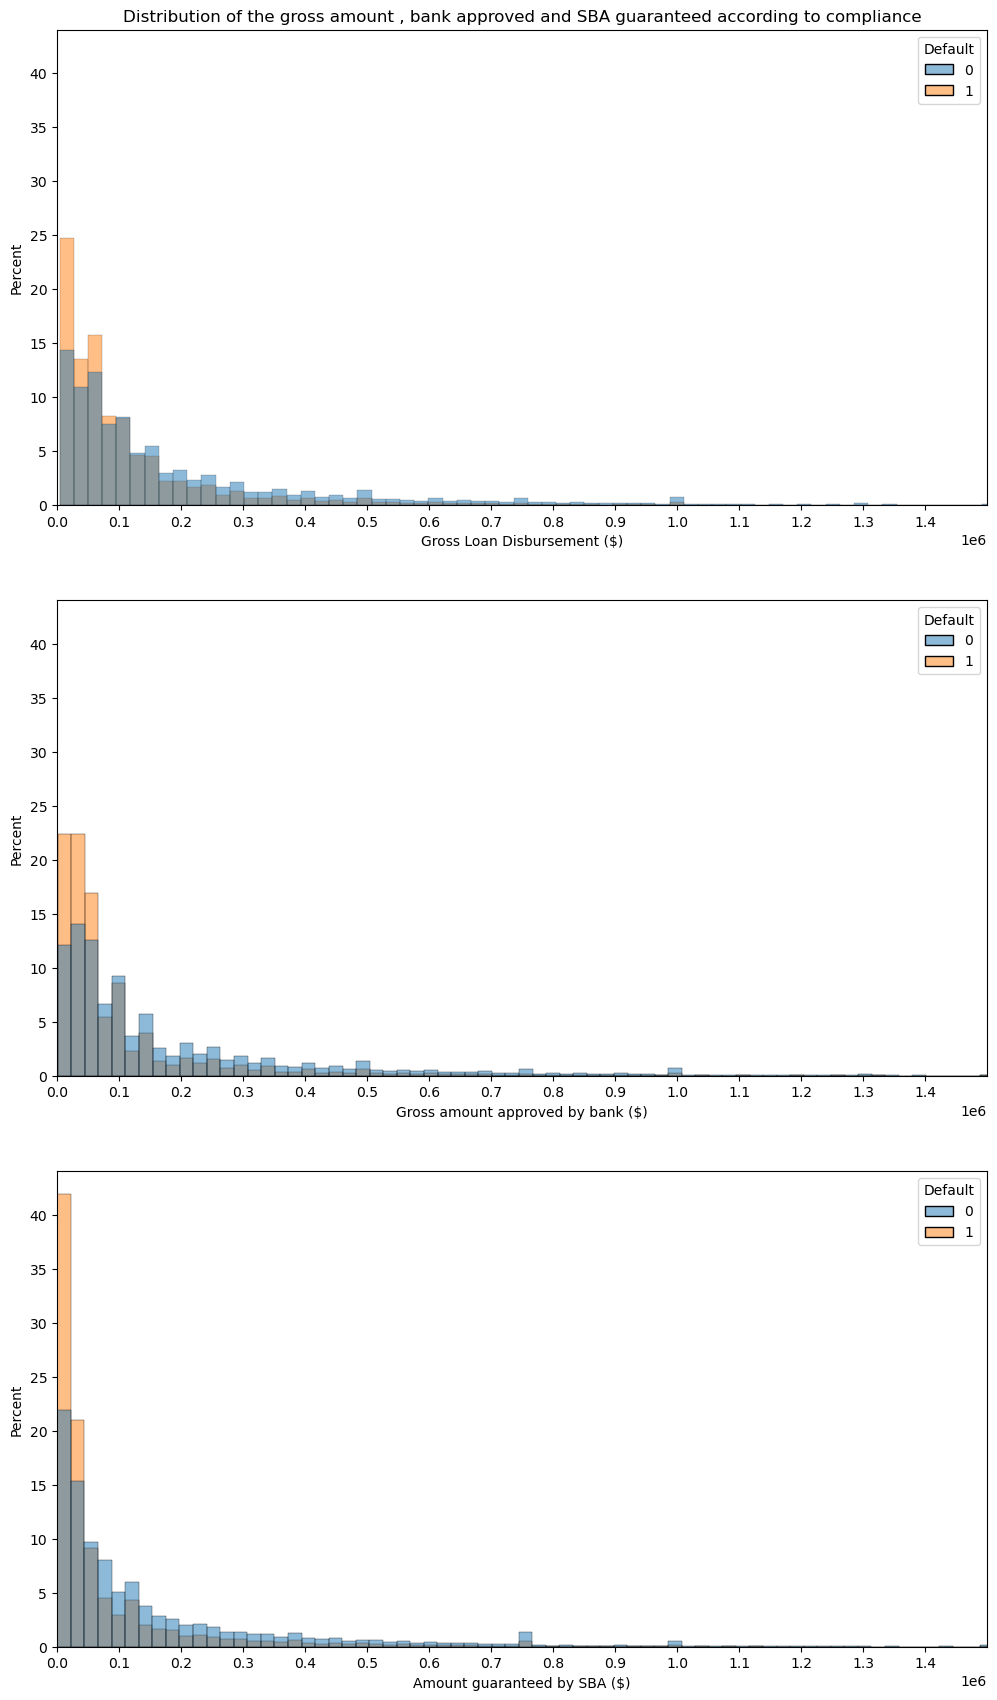

In [107]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12,21), sharex=False, sharey=True)
sns.histplot(x= 'DisbursementGross', hue = 'Default',  data = loans, ax=ax[0],bins=500,stat='percent', common_norm=False) #Common_norm = False --> do the percentages separately.             ) 
ax[0].set(xlabel='Gross Loan Disbursement ($)', ylabel='Percent')
ax[0].set_title("Distribution of the gross amount , bank approved and SBA guaranteed according to compliance")
ax[0].set_xlim(0, 1.5e6) #Due to the existence of extreme data, the graph looks small. We change the range so we can see it in more detail.
ax[0].set(xticks=np.arange(0, 1.5e6, 1e5));

sns.histplot(x= 'GrAppv', hue = 'Default',  data = loans, ax=ax[1],bins=250,stat='percent', common_norm=False) #Common_norm = False --> do the percentages separately.             ) 
ax[1].set(xlabel='Gross amount approved by bank ($)', ylabel='Percent')
ax[1].set_xlim(0, 1.5e6) #Due to the existence of extreme data, the graph looks small. We change the range so we can see it in more detail.
ax[1].set(xticks=np.arange(0, 1.5e6, 1e5));

sns.histplot(x= 'SBA_Appv', hue = 'Default',  data = loans, ax=ax[2],bins=250,stat='percent', common_norm=False) #Common_norm = False --> do the percentages separately.              ) 
ax[2].set(xlabel='Amount guaranteed by SBA ($)', ylabel='Percent')
ax[2].set_xlim(0, 1.5e6) #Due to the existence of extreme data, the graph looks small. We change the range so we can see it in more detail.
ax[2].set(xticks=np.arange(0, 1.5e6, 1e5));


In [108]:
#Plot for pdf.

#fig, ax = plt.subplots(figsize=(10, 5))
#sns.histplot(x= 'DisbursementGross', hue = 'Default',  data = loans,bins=500,stat='percent', common_norm=False) #Common_norm = False --> do the percentages separately.             ) 
#ax.set(xlabel='Monto total prestad ($)', ylabel='Porcentaje')
#ax.set_title("Distribución del monto total prestado según cumplimiento")
#ax.set_xlim(0, 1.5e6) #Due to the existence of extreme data, the graph looks small. We change the range so we can see it in more detail.
#ax.set(xticks=np.arange(0, 1.5e6, 1e5));

#plt.tight_layout()
#plt.savefig("Distrubution_and_gross.png", dpi=100)

The percentage refers to each total. For example, in the first range (first bar) of the first chart, 25% of all defaults occurred and just under 15% of all those paid on time.
The graphs show us that the majority of problematic loans are in the range of between 0 and 100,000 USD, either on the full amount or on the approved amounts.
We can also see that the 3 distributions are similar, which is not surprising. The three variables are closely related. Of these three variables, the only one we can work with in the final model is SBAApproval since the other 2 are not known after the SBA approves the loan.
However, in most visualizations we look at the DisbursementGross field because we find it simpler to understand.

Let's look at the boxplots of gross disbursements against loans paid on time and those that were in trouble.

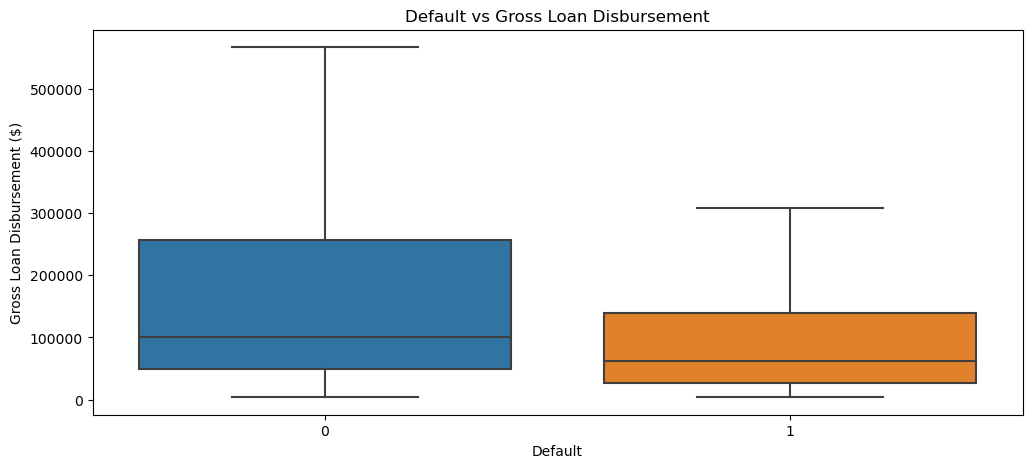

In [109]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x='Default', y = 'DisbursementGross', data = loans, showfliers = False)  ## The existence of outliers makes the graph not look very good. That's why we remove them, with showfliers = False
plt.title("Default vs Gross Loan Disbursement");
ax.set(xlabel='Default', ylabel='Gross Loan Disbursement ($)');

This graph shows us more clearly that the loans that did not have problems tended to be larger. One hypothesis that could explain this is that the largest loans are associated with established and expanding companies, in such a company a loan is more likely to be repaid without problems.

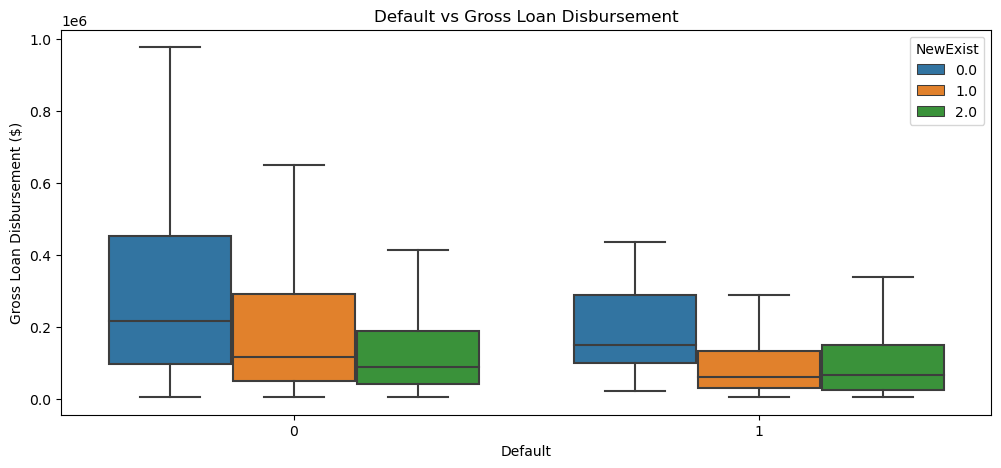

In [110]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x='Default', y = 'DisbursementGross', data = loans, hue='NewExist', showfliers = False)  ## The existence of outliers makes the graph not look very good. That's why we remove them, with showfliers = False
plt.title("Default vs Gross Loan Disbursement");
ax.set(xlabel='Default', ylabel='Gross Loan Disbursement ($)');

Let's combine the gross amount disbursed with the number of employees to study the problems in repaying the loan. We have already seen that the number of employees is a factor that is related to the term payment of the loan. We are going to make the graph with a maximum of 30 employees to make it understandable.

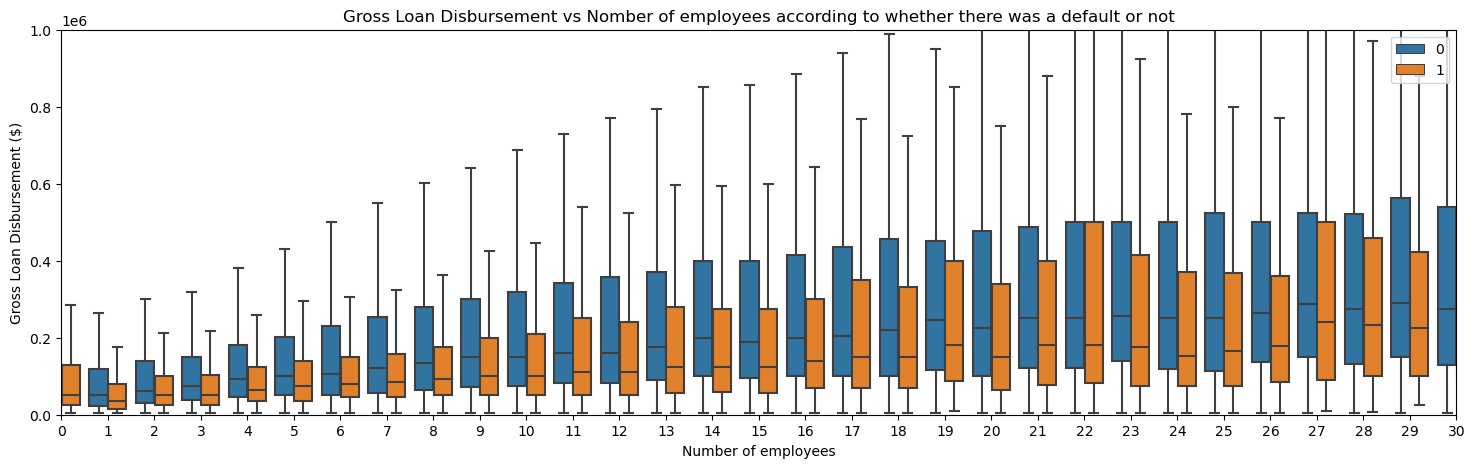

In [111]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x='NoEmp', hue='Default', y = 'DisbursementGross', data = loans, showfliers=False)  
plt.title("Gross Loan Disbursement vs Nomber of employees according to whether there was a default or not");
ax.set(xlabel='Number of employees', ylabel='Gross Loan Disbursement ($)')
ax.set_xlim(0,30)
ax.set_ylim(0,1e6)
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.0));

We see that with a fixed number of employees (at least if there are a maximum of 30), larger loans tend to have fewer drawbacks. We then conclude that the reason that larger loans are less likely to default is not explained (solely) by the number of employees, it is another independent factor. 

This inverse relationship between amounts delivered and default can be explained in part by whether the loans were backed by real estate (in a later section we will see that the latter have a much lower default rate):

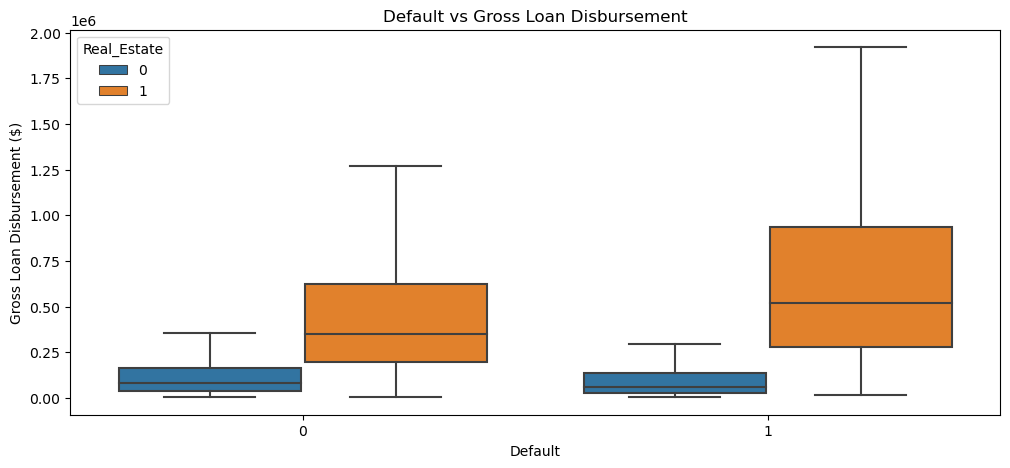

In [112]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x='Default', y = 'DisbursementGross', data = loans, hue='Real_Estate', showfliers = False)  ## The existence of outliers makes the graph not look very good. That's why we remove them, with showfliers = False
plt.title("Default vs Gross Loan Disbursement");
ax.set(xlabel='Default', ylabel='Gross Loan Disbursement ($)');

The stats table of the disbursed amount values by 'Real_Estate' field is the following:

In [113]:
describe_values(loans, 'Real_Estate', 'DisbursementGross')

,count,missing,unique_values,mean,std,mode,min,25%,50%,75%,max,skew,kurtosis
Real_Estate,,,,,,,,,,,,,
0,744979.0,0.0,112338.0,146600.780967,224948.197469,50000.0,4000.0,35000.0,75000.0,154209.0,11446325.0,5.879989,87.823142
1,152093.0,0.0,12144.0,470979.791134,391515.329714,1000000.0,4600.0,195000.0,350000.0,628000.0,5472000.0,2.070840,8.186908


-----------------------------------------------------------------------------------------------

Let's look at the 'LowDoc' field.

In [114]:
loans.groupby('LowDoc', dropna=False).agg(Number_of_loans=('DisbursementGross', 'count'), MeanDisbursed=('DisbursementGross', 'mean'), 
  MeanApproved=('GrAppv', 'mean'), Average_number_of_employees= ('NoEmp', 'mean'), Default_rate= ('Default', 'mean'))

,Number_of_loans,MeanDisbursed,MeanApproved,Average_number_of_employees,Default_rate
LowDoc,,,,,
0.0,780905,220559.006883,210631.511336,12.041899,0.187060
1.0,110169,67873.804573,68653.535151,6.998039,0.089898
NaN,5998,189065.043515,190076.111204,10.313438,0.262921


We see that loans with low documentation have a much lower default rate. On the other hand, the null cases of this field appear to be of the same class as '0', that is, loans where the agile documentation procedure was not used. Let's do a hypothesis test to see if this makes sense.

In [115]:
sample_0 = loans[loans['LowDoc']==0]['Default']
sample_1 = loans[loans['LowDoc'].isnull()]['Default']

ttest,pval = ttest_ind(sample_0,sample_1)
print("p-value:",pval)
if pval <0.05:
  print("We reject null hypothesis.")
else:
  print("We accept null hypothesis.")
print("(The null hypothesis is that the two populations have the same real means).")

p-value: 8.298318279059437e-51
We reject null hypothesis.
(The null hypothesis is that the two populations have the same real means).


The hypothesis test distinguishes both values. So we decided to fill the null values with a new field value: -1 (so that it remains a numeric field).

#### Variables related to term and years

Let's start by pointing out the relationship between the variables ApprovalFY and ApprovalYear.

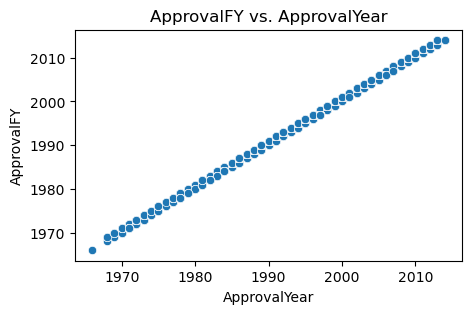

In [116]:
fig, ax = plt.subplots(figsize=(5, 3))
ax=sns.scatterplot(data=loans, x='ApprovalYear', y='ApprovalFY');
ax.set(xlabel='ApprovalYear', ylabel='ApprovalFY',title = 'ApprovalFY vs. ApprovalYear') ;

The 'ApprovalFY' (approval fiscal year) field and the 'ApprovalYear' field are simply a change of months from each other, as one might imagine. On the other hand, in the case of the year of delivery of the loan with respect to the year of approval, things are not so simple. There are disbursements that can be 5, even 10 years after approval. This should have an impact on the companies and therefore their ability to repay the loan. Unfortunately, this wait is a variable that cannot be included in a predictive model because it is known a posteriori. The analysis of this variable is included in the appendix, we prefer not to put it here for reasons of space.

Let's start to analyze the repayment time of the loan.

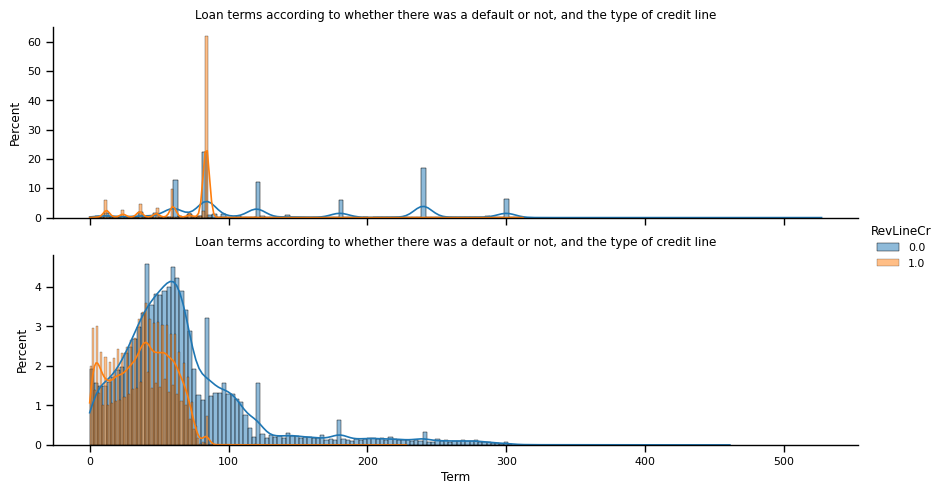

In [117]:
sns.set_context(context='paper', font_scale=0.9)
g = sns.FacetGrid(loans, row="Default", hue='RevLineCr',  aspect=3.5, height=2.5, sharey=False)
g.map(sns.histplot,"Term",  stat='percent', bins=150, kde=True);
g.add_legend();
g.set(title='Loan terms according to whether there was a default or not, and the type of credit line');

We see that the distributions have very different characteristics. Loans without drawbacks tend to have more precise and targeted durations, while those with drawbacks have a more dispersed distribution. This suggests to us that the loans that had payment problems had them from the beginning.

We also see that loans that defaulted on a revolving line of credit tend to have shorter durations. Another thing to note that we can see, especially in unsecured loans, is that there are peaks that correspond to a whole number of years. Let's corroborate this with a table:


In [118]:
loans.groupby(['Term']).agg(Number_of_loans=('DisbursementGross', 'count'), MeanDisbursed=('DisbursementGross', 'mean'), 
  MeanAmountApproved=('GrAppv', 'mean'), Mean_of_days_waiting=('Days_waiting', 'mean'), Default_rate= ('Default', 'mean')).sort_values(by='Number_of_loans', ascending=False).head(10)

,Number_of_loans,MeanDisbursed,MeanAmountApproved,Mean_of_days_waiting,Default_rate
Term,,,,,
84,228911,104542.103162,88081.860147,105 days 20:03:10.855708380,0.008510
60,89858,89375.725578,82089.575241,106 days 05:13:04.955159952,0.027365
240,85965,418968.401454,423723.654441,243 days 19:43:35.406094028,0.002233
120,77620,257585.275612,259972.035030,100 days 07:27:36.612529001,0.013025
300,44691,517904.970688,523020.395426,98 days 05:04:39.563922903,0.001343
180,28134,264668.169972,267618.680955,140 days 08:50:30.284921566,0.012512
36,19712,72747.036983,59109.513088,108 days 13:24:19.658076040,0.101461
12,16969,266442.364724,247279.809181,157 days 11:17:22.717053336,0.071012
48,15595,79479.265726,65463.971337,101 days 01:19:44.581780804,0.136133


We see that the largest number of loans is for 8 years. We also see that 20-year loans have a particularly long lead time between approval and delivery. In fact, except for terms with few loans, 20-year terms have the longest average waiting time.

In [119]:
loans.groupby(['Term']).agg(Number_of_loans=('DisbursementGross', 'count'), MeanDisbursed=('DisbursementGross', 'mean'), 
  MeanAmountApproved=('GrAppv', 'mean'), Mean_of_days_waiting=('Days_waiting', 'mean'), Default_rate= ('Default', 'mean')).sort_values(by='Mean_of_days_waiting', ascending=False).head(20)

,Number_of_loans,MeanDisbursed,MeanAmountApproved,Mean_of_days_waiting,Default_rate
Term,,,,,
370,2,179500.000000,1.795000e+05,594 days 00:00:00,0.000000
346,1,20000.000000,2.000000e+04,445 days 00:00:00,0.000000
480,1,264000.000000,2.640000e+05,439 days 00:00:00,0.000000
398,1,493000.000000,4.930000e+05,373 days 00:00:00,0.000000
386,3,402000.000000,4.103333e+05,367 days 00:00:00,0.000000
443,1,72000.000000,1.030000e+05,344 days 00:00:00,0.000000
430,1,338000.000000,3.380000e+05,336 days 00:00:00,1.000000
389,6,263333.333333,2.698333e+05,312 days 04:00:00,0.000000
352,1,320000.000000,3.200000e+05,306 days 00:00:00,1.000000


This must have to do with backing in real estate. Remember that loans of 240 months or more are backed by real estate.

Does this support influence the default rate?

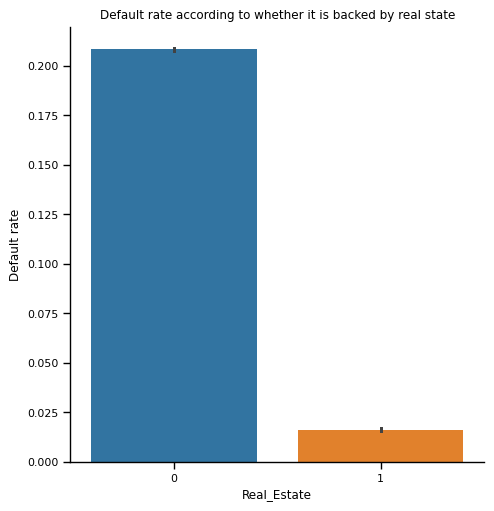

In [120]:
sns.catplot( data=loans, x='Real_Estate', y="Default", kind="bar", aspect=1);
plt.title("Default rate according to whether it is backed by real state");
plt.ylabel('Default rate');

In [121]:
loans.groupby(['Real_Estate']).agg(Number_of_loans=('DisbursementGross', 'count'), MeanDisbursed=('DisbursementGross', 'mean'), 
  MeanAmountApproved=('GrAppv', 'mean'), Mean_of_days_waiting=('Days_waiting', 'mean'), MeanTerm=('Term', 'mean'), 
                                  Default_rate= ('Default', 'mean'))

,Number_of_loans,MeanDisbursed,MeanAmountApproved,Mean_of_days_waiting,MeanTerm,Default_rate
Real_Estate,,,,,,
0,744979,146600.780967,135231.093017,99 days 09:10:09.404935626,79.883841,0.208167
1,152093,470979.791134,476303.602033,182 days 10:00:03.882933244,262.539164,0.016286


In [122]:
describe_values(loans, 'Real_Estate', 'Default')

,count,missing,unique_values,mean,std,mode,min,25%,50%,75%,max,skew,kurtosis
Real_Estate,,,,,,,,,,,,,
0,744979.0,0.0,2.0,0.208167,0.405997,0.0,0.0,0.0,0.0,0.0,1.0,1.437615,0.066738
1,152093.0,0.0,2.0,0.016286,0.126574,0.0,0.0,0.0,0.0,0.0,1.0,7.643285,56.420549


Real estate-backed installments are much more likely to be free of drawbacks. The difference is very large, a default rate of 20.8% if they are not backed by real estate versus 1.6% for those that are backed.

Let's look at the declared dates of problems with payments.

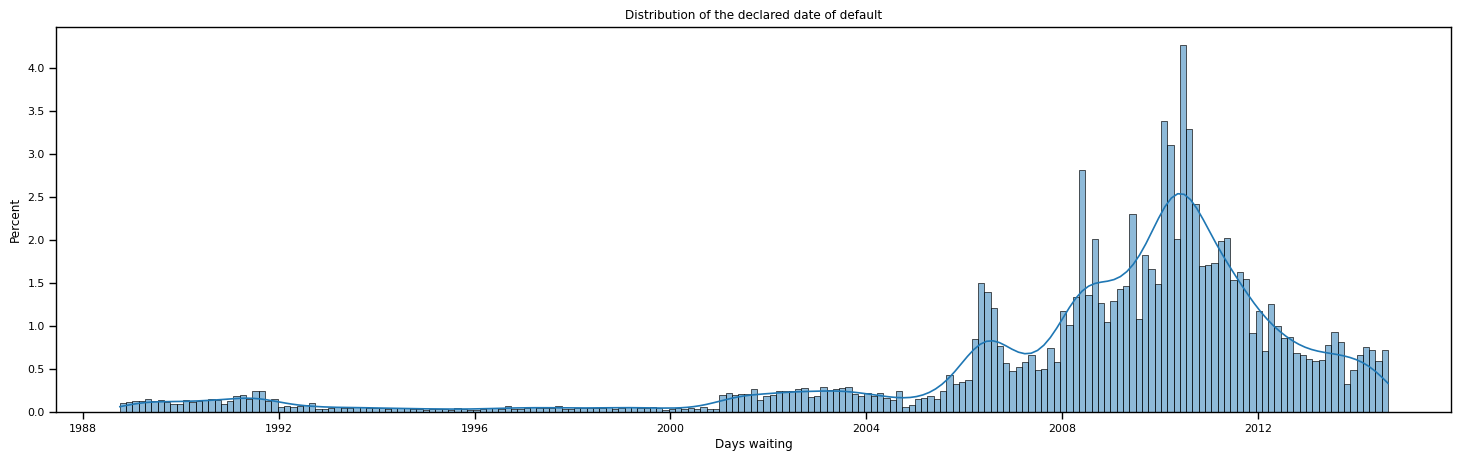

In [123]:
fig, ax = plt.subplots(figsize=(18, 5));
sns.histplot(data=loans, x='ChgOffDate', ax=ax, kde=True, stat='percent', common_norm=False);
ax.set(xlabel='Days waiting', title='Distribution of the declared date of default');

This shows that in the 2008-2012 range there were more drawbacks than in any other range of years. Remember that the mortgage crisis occurred within that range.
We wonder what happened to payments backed by real estate.

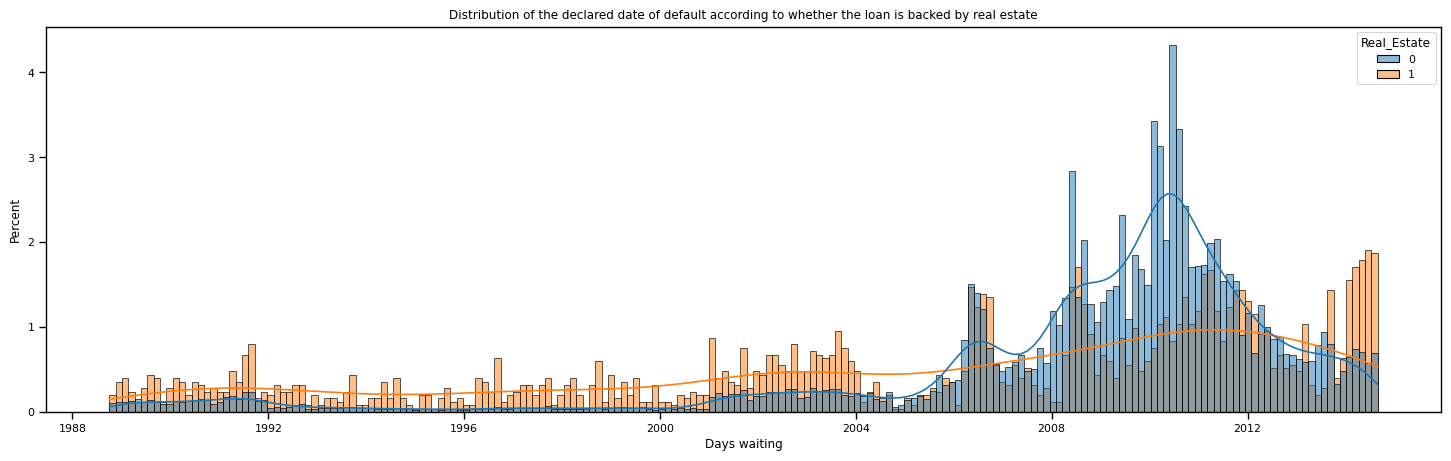

In [124]:
fig, ax = plt.subplots(figsize=(18, 5));
sns.histplot(data=loans, x='ChgOffDate', ax=ax, kde=True, stat='percent', hue = 'Real_Estate', common_norm=False);
ax.set(xlabel='Days waiting', title='Distribution of the declared date of default according to whether the loan is backed by real estate');

We see that loans backed by real estate were safer than unbacked ones during the peak of the mortgage crisisduring the peak of the mortgage crisis but struggled later. We also see that there were years (2001-2005 for example) where these loans had more problems than those not backed by real estate.

Let's look at the number of loans with and without drawbacks, by year of delivery. We should see something similar.

In [125]:
loans['DisbursementYear'].info()
#DisbYear_vs_default =pd.DataFrame(data=DisbursementYear)
#DisbYear_vs_default.rename(columns={"DisbursementDate": "DisbursementYear"}, inplace = True) #By default, 
#the DisbYear_vs_default column name is DisbursementDate. Here we rename that column to a more appropriate name.
#DisbYear_vs_default['Default']= loans['Default']

<class 'pandas.core.series.Series'>
Int64Index: 897072 entries, 0 to 899163
Series name: DisbursementYear
Non-Null Count   Dtype
--------------   -----
894894 non-null  Int64
dtypes: Int64(1)
memory usage: 46.8 MB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.In

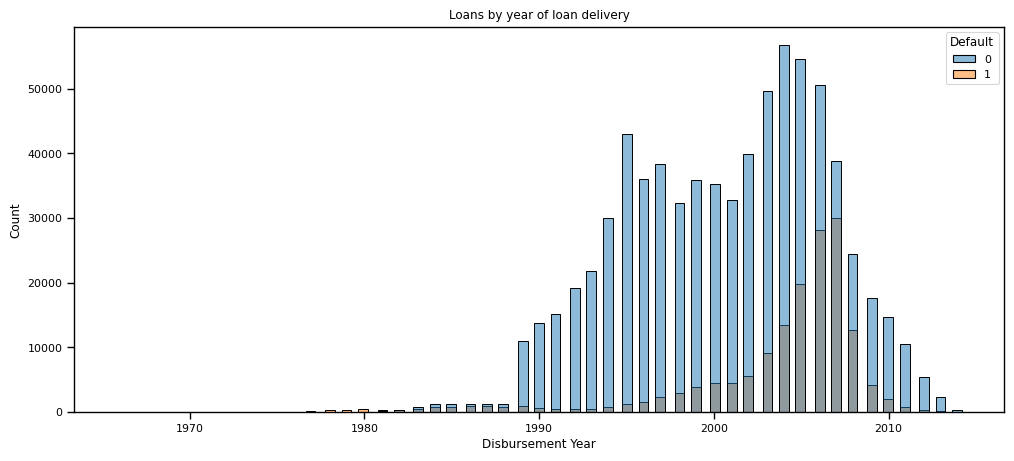

In [126]:
fig, ax = plt.subplots(figsize=(12, 5));
sns.histplot(data=loans, x='DisbursementYear', hue= 'Default', ax=ax , shrink=3, legend=True);
ax.set(title='Loans by year of loan delivery');
ax.set_xlabel('Disbursement Year');

We see two things that seem relevant to us: 1) The number of loans with payment problems is very high for loans made around 2007. 2) The number of loans dated less than 1989 is much lower.

Let's look at a graph of the ratio of 1).

In [127]:
g=loans.groupby(['DisbursementYear']).mean()

C:\Users\Hernán\AppData\Local\Temp\ipykernel_6624\3192396005.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g=loans.groupby(['DisbursementYear']).mean()


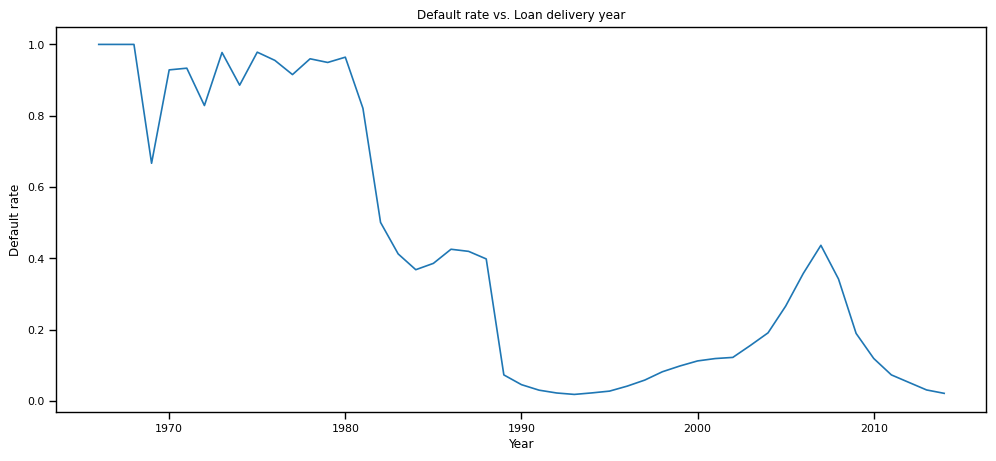

In [128]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5), sharex=True, sharey=True)  
ax.plot(g.index, g['Default']);
ax.set_title('Default rate vs. Loan delivery year') 
ax.set_xlabel('Year')  
ax.set_ylabel('Default rate');


In [129]:
describe_values(loans, 'GreatRecession', 'Default')

,count,missing,unique_values,mean,std,mode,min,25%,50%,75%,max,skew,kurtosis
GreatRecession,,,,,,,,,,,,,
0,766874.0,0.0,2.0,0.139108,0.346059,0.0,0.0,0.0,0.0,0.0,1.0,2.085733,2.350288
1,130198.0,0.0,2.0,0.390782,0.487927,0.0,0.0,0.0,0.0,1.0,1.0,0.447689,-1.799602


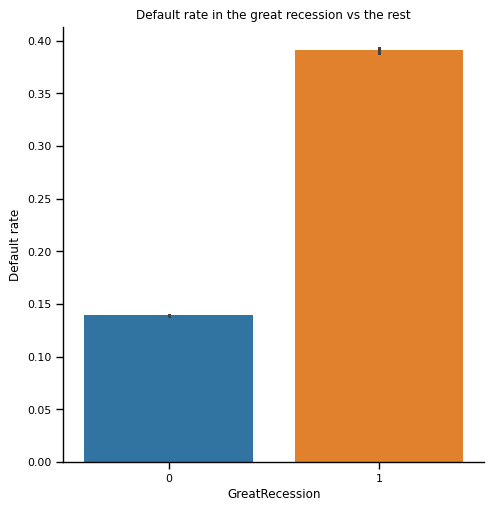

In [130]:
sns.catplot( data=loans, x='GreatRecession', y="Default", kind="bar", aspect=1);
plt.title("Default rate in the great recession vs the rest");
plt.ylabel('Default rate');

We see that around the real estate crisis of 2007-2008 we have a peak of problems. In fact, the default rate is 3 times higher. We conclude that the economic context is one of the most important factors. On the other hand, before 1990 we see that the proportion of defaults is very high, reaching 1 in years close to 1970. We conjecture that this may be due to less and selective data collection. Let's study that better.

In [131]:
g=loans.groupby(['DisbursementYear']).agg(Number_of_loans=('DisbursementGross', 'count'),
                                        Default_rate=('Default', 'mean'))
g

,Number_of_loans,Default_rate
DisbursementYear,,
1966,1,1.000000
1968,2,1.000000
1969,3,0.666667
1970,14,0.928571
1971,15,0.933333
1972,35,0.828571
1973,44,0.977273
1974,35,0.885714
1975,46,0.978261


We found that before 1989 the number of loans per year was not much more than 2,000, and in years before 1970 there were only 6 loans, so we understand that very few were registered. Probably with a lot more emphasis on those who had problems. In other words, they are a biased selection.

In [132]:
#For pdf
#h=g=loans[loans['DisbursementYear']>1989].groupby(['DisbursementYear']).mean()
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5), sharex=True, sharey=True)  
#ax.plot(h.index, h['Default']);
#ax.set_title('Tasa de default vs año de entrega del préstamo', size=12) 
#ax.set_xlabel('Año', size=10)  
#ax.set_ylabel('Tasa de default', size=10);
#plt.savefig("Default_vs_year.png", dpi=100)

### Observations on the data set and actions to perform for the model

* The Sector column has zeros, inherited from the NAICS column. The are Sector unclassified cases.

* We renamed the target variable and it is now called 'Default', and it is binary.

* The 'ApprovalFY' (approval fiscal year) field and the 'ApprovalYear' field are simply a change of months from each other, as one might imagine. So since it does not provide new information, we are going to delete the 'ApprovalFY' field.

* Because they are fields that are known after the loans are approved by the SBA, or have no predictive value, the fields 'ApprovalDate', 'DisbursementDate', 'ChgOffDate', 'ApprovalFY', 'DisbursementGross' and 'GrAppv' will be deleted.

* The null values of the fields 'State', 'Bank', 'BankState' and 'SameState' will be filled with the value 'Unknown'.

* The null values of the fields 'RevLineCr' and 'LowDoc' will be filled with the value -1.

### Insights and conclusions

* Although the default rate is highly related to the bank, since there are around 5,800 different banks, it cannot be used directly to build a predictive model. One possibility is to rule out banks with few credits (75% of banks have 38 credits or less), another is to use related variables such as the state of the bank, if it is from the same state as the company, or to create a variable that categorizes the banks according to your default rate (in the training set). 

* There is no correlation between the default rate and the amount of loans the bank has (see appendix).

* Although the state of the bank branch has an impact, it is much more important if the state of the branch is the same as that of the company or not.

* There is a little difference in the default rate if the company is a franchise. It is a variable that is not important in the model and we are going to remove it.

* The business sector has a notorious relationship with the default rate. 

* There is a small difference in the default rate between loans from companies that took several and those that took only one (see appendix).

* More than 50% of the loans that defaulted have the ratio Mount_approved_by_bank-Mount_guaranteed_by_SBA around 2 (see appendix).

* Revolving line credits have a default rate more than 10% higher than the other ones.

* Loans with low documentation have a much lower default rate on average, less than half that of the others.

* Loans without drawbacks tend to have more precise and targeted durations, while those with drawbacks have a more dispersed distribution. We see that the largest number of loans is for 8 years. We also see that 20-year loans have a particularly long lead time between approval and delivery. In fact, except for terms with few loans, 20-year terms have the longest average waiting time.

* Real estate-backed installments are much more likely to be free of drawbacks. The difference is very large, a default rate of 20.8% if they are not backed by real estate versus 1.6% for those that are backed.

* The disbursements of the loans that entered into default are on average smaller than those that did not. Part of that difference may be due to larger real estate-backed funds.

* Loans backed by real estate were safer than unbacked ones during the peak of the mortgage crisis, but they ran into trouble later. On the other hand, there were years (2001-2005 for example) where these loans had more problems than those that were not backed by real estate.

* The number of loans with payment problems is very high for loans made around 2007. In fact, the default rate in the Great Recession were 3 times higher.

    Before 1989 the number of loans per year was not much more than 2,000, and in years before 1970 there were only 6 loans, so we understand that very few were registered. Probably with a lot more emphasis on those who had problems. In other words, they are a biased selection.
    
* As mentioned in the previous items, the economic context is very important, but we do not have contextual economic variables that work for us to predict (in the appendix we tested 3 indicators without much success). Because of this, it seems like a good idea to restrict the training data set to loans issued in the last 10 to 15 years.

    Unfortunately, the last 10 years of the data set has been through the great recession, where we saw the default rate skyrocket and it wouldn't be a good idea to just take that. We are going to try taking the records in which the loan was delivered from 1990 onwards and comparing them with a model of all the years, to see which is better.

In [133]:
#loans.to_pickle('Should This Loan be Approved or Denied - EDA complete.pkl')

### Cleaning and preparation before training

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer # Code to use feature cat and numeric together
from sklearn.compose import make_column_selector # Selector in pipeline by dtypes

Based on the insights and all the things mentioned above, we proceed to make the necessary transformations to train the model.

In [135]:
#loans = pd.read_pickle(path + 'Should This Loan be Approved or Denied - EDA complete.pkl') 

In [136]:
loans.drop(['Name', 'City', 'Zip', 'ApprovalDate', 'ApprovalFY', 'ChgOffDate', 'DisbursementDate',
       'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'ApprovalYear', 
            'Days_waiting', 'GreatRecession', 'Disb_vs_GrAppv', 'Disb_vs_GrAppv_is_positive'], axis=1, inplace=True) 

We have not deleted the bank column yet because with it we are going to create a categorical variable based on the values of the training subset.

We are going to create two different models, one of the entire period, and another based on the records only from 1990.

In [137]:
loans_last_years = loans[loans['DisbursementYear']>=1990].copy(deep=True)

#### Records from all years

In [138]:
loans.drop(['DisbursementYear'], inplace=True, axis=1)

For the processes to work well, we need the columns to not have mixed types. SameState is a column that is boolean on the one hand, and string('Unknown') on the other. We convert it to string.

In [139]:
loans['SameState'] = loans['SameState'].replace({True: 'True', False: 'False', 'Unknown': 'Unknown'})

The column 'Bank' will be replaced by a category column, where its values will depend on the data set (training), so we have to split before we drop it.

In [140]:
X_train , X_test, y_train, y_test = train_test_split(loans, loans['Default'] , test_size=0.2, random_state=27, stratify=loans['Default'])
#We haven't thrown away the target column yet because we're going to use it to categorize the banks.

In [141]:
bank_classification= X_train.groupby(['Bank']).agg(Default_rate=('Default', 'mean'), Amount_of_loans=('Bank', 'count')).sort_values(by=['Amount_of_loans'], ascending=False)
bank_classification=bank_classification.reset_index() # We put the bank as a column, creating a new index.
bank_classification.head(5)

,Bank,Default_rate,Amount_of_loans
0,BANK OF AMERICA NATL ASSOC,0.275319,69465
1,WELLS FARGO BANK NATL ASSOC,0.140923,50673
2,JPMORGAN CHASE BANK NATL ASSOC,0.275681,38657
3,U.S. BANK NATIONAL ASSOCIATION,0.175599,28195
4,CITIZENS BANK NATL ASSOC,0.221510,26974


To establish a pattern of which is a low risk bank or which is a high risk bank, let's look at the default rate of all banks with at least 100 loans (we only look at these banks because if a bank has less than 100 loans the default rate is very inaccurate).

In [142]:
bank_classification[bank_classification['Amount_of_loans']>99].describe()

,Default_rate,Amount_of_loans
count,668.000000,668.000000
mean,0.103150,961.878743
std,0.096726,4229.854931
min,0.000000,100.000000
25%,0.042584,143.750000
50%,0.091562,221.000000
75%,0.139237,457.250000
max,0.873926,69465.000000


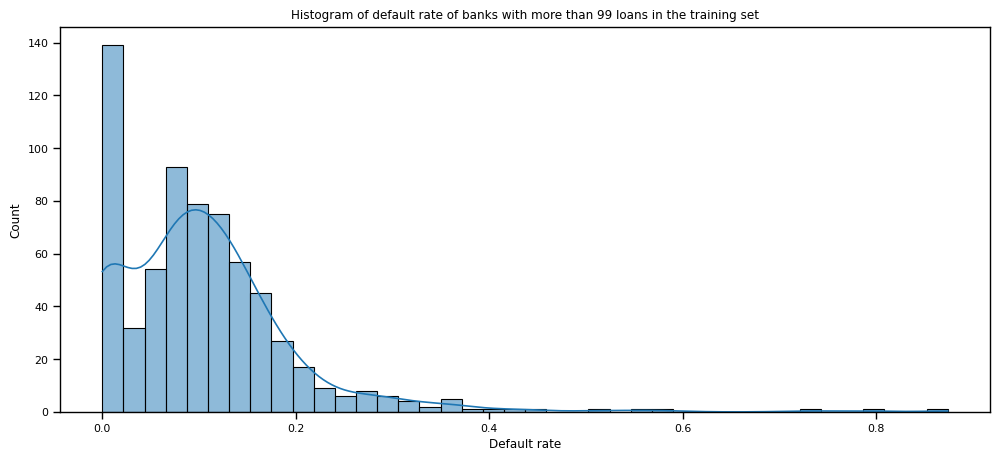

In [143]:
fig, ax = plt.subplots(figsize=(12, 5));
sns.histplot(data=bank_classification[bank_classification['Amount_of_loans']>99], x="Default_rate", legend=False, ax=ax, kde=True)
ax.set(title='Histogram of default rate of banks with more than 99 loans in the training set');
ax.set_xlabel('Default rate');

Taking all this into account, we will consider the following categories:

* If a bank has less than 20 loans, the category is Unknown.

* If a bank has at least 20 loans:

                           if Default_rate < 0.05 , the category is 'Very low risk';
                           if 0.05<= Default_rate < 0.15 , the category is 'Low risk';
                           if 0.15<= Default_rate < 0.2 , the category is 'Medium risk';
                           if 0.2<= Default_rate < 0.25 , the category is 'High risk';
                           if 0.25<= Default_rate, the category is 'Very high risk'.

In [144]:
def bank_class(def_rate, amount_loans):
    if amount_loans>=20:
        if def_rate < 0.05:
            return 'Very low risk'
        elif (0.05<= def_rate)&(def_rate<0.15):
            return 'Low risk'
        elif (0.15<= def_rate)&(def_rate<0.2):
            return 'Medium risk'
        elif (0.2<= def_rate)&(def_rate<0.25):
            return 'High risk'
        else:
            return 'Very high risk'
    else:
        return 'Unknown'  

In [145]:
bank_classification['Category']=bank_classification.apply(lambda x: bank_class(x['Default_rate'], x['Amount_of_loans']), axis=1)

The distribution of banks with this new category is as follows:

In [146]:
bank_classification['Category'].value_counts(normalize=True)

Unknown           0.659849
Low risk          0.145497
Very low risk     0.099031
Medium risk       0.042339
Very high risk    0.031037
High risk         0.022246
Name: Category, dtype: float64

In [147]:
bank_classification['Category'].isnull().sum() # the function filled all the rows (if it didn't fill them all it would be
# a symptom that something didn't work well).

0

In [148]:
bank_classification.drop(['Default_rate', 'Amount_of_loans'], inplace=True, axis=1)
bank_classification.set_index('Bank', inplace=True)

Finally, we create the classification dictionary:

In [149]:
bank_class_dict = (bank_classification.to_dict())['Category']

Now we add the new field in the training sets according to the dictionaries of each model.

In [150]:
X_train['BankClass']= X_train['Bank'].map(bank_class_dict)
X_train.loc[X_train['Bank'].isnull(), 'BankClass']='Unknown' # In the rows that have the empty field 'bank' we fill 
#with 'Unknown'.

We can now drop the bank and default columns of the training set.

In [151]:
X_train.drop(['Bank', 'Default'], axis=1, inplace=True)

In [152]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717657 entries, 449021 to 652168
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   State         717646 non-null  object 
 1   BankState     716431 non-null  object 
 2   Term          717657 non-null  int64  
 3   NoEmp         717657 non-null  int64  
 4   NewExist      717546 non-null  float64
 5   CreateJob     717657 non-null  int64  
 6   RetainedJob   717657 non-null  int64  
 7   UrbanRural    717657 non-null  int64  
 8   RevLineCr     496203 non-null  float64
 9   LowDoc        712825 non-null  float64
 10  SBA_Appv      717657 non-null  float64
 11  Is_franchise  717657 non-null  int64  
 12  Sector        717657 non-null  object 
 13  Real_Estate   717657 non-null  int64  
 14  SameState     716420 non-null  object 
 15  BankClass     717657 non-null  object 
dtypes: float64(4), int64(7), object(5)
memory usage: 93.1+ MB


We are going to make a pipeline of transformations for the x_train dataframe.

In [153]:
# We generate a pipeline for numeric columns.
numeric_transformer = Pipeline(
    steps=[('fill', SimpleImputer(strategy='constant', fill_value=-1)), 
           ("scaler", StandardScaler())])

# We generate pipelines for categories. Depending on which column it is, I will use onehotencoder or ordinalencoder.
h_encoder = OneHotEncoder(handle_unknown='ignore', #we put ignore to be able to omit when it can happen that the same values do not exist
                        sparse=False) # generate it as matrix to be able to generate the proper columns
le = OrdinalEncoder(handle_unknown='use_encoded_value' , # the encoded value of unknown categories will be set to the value given for 
                    unknown_value=-1) # the parameter unknown_value
le_bank_class = OrdinalEncoder(categories=[['Unknown','Very low risk','Low risk', 'Medium risk', 'High risk', 
                                            'Very high risk' ]], handle_unknown='use_encoded_value', unknown_value=-1) # We 
# pass the order of the categories so that it encodes 0 for 'Unknown', 1 for 'Very low risk', 2 for 'Low risk', 3 for 
#'Medium risk', 4 for 'High risk' and 5 for 'Very high risk'. Making the numbers consistent with the risk is better 
# for the algorithm. 

# We define different pipelines for the categorical columns.

categorical_transformer_1 = Pipeline(
    steps=[('fill', SimpleImputer(strategy='constant', fill_value='Unknown')), ('encode_1', h_encoder), ("scaler", StandardScaler())])
categorical_transformer_2 = Pipeline(
    steps=[('fill', SimpleImputer(strategy='constant', fill_value='Unknown')), ('encode_2', le), ("scaler", StandardScaler())])
categorical_transformer_3 = Pipeline(
    steps=[('fill', SimpleImputer(strategy='constant', fill_value='Unknown')), ('encode_3', le_bank_class), ("scaler", StandardScaler())])

# Function that performs the work for each pipeline and then join it.
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, make_column_selector(dtype_exclude=object)),
        ("cat_1", categorical_transformer_1, ['SameState']),
        ("cat_2", categorical_transformer_2, ['State', 'BankState', 'Sector']),
        ("cat_3", categorical_transformer_3, ['BankClass'])
    ]
)

# Training of the pipeline.
preprocessor.fit(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('fill',
                                                  SimpleImputer(fill_value=-1,
                                                                strategy='constant')),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000255903BFD00>),
                                ('cat_1',
                                 Pipeline(steps=[('fill',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('encode_1',
                                                  OneHotEncoder(handl...
                                 ['State', 'BankState', 'Sector']),
                                ('cat_3',
                                 Pipeline(steps=[('fill',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('encode_3',
                                                  OrdinalEncoder(categories=[['Unknown',
                                                                              'Very '
                                                                              'low '
                                                                              'risk',
                                                                              'Low '
                                                                              'risk',
                                                                              'Medium '
                                                                              'risk',
                                                                              'High '
                                                                              'risk',
                                                                              'Very '
                                                                              'high '
                                                                              'risk']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1)),
                                                 ('scaler', StandardScaler())]),
                                 ['BankClass'])])

In [154]:
# Transformation of X_train
X_train_array_enc = preprocessor.transform(X_train)
X_train_array_enc # X_train_array_enc is an array.

array([[-1.21437898,  0.24692656, -0.61877206, ..., -0.20029755,
         0.68021889,  1.42305245],
       [-0.33984711, -0.12589173,  1.59116071, ..., -1.45860652,
         1.17165558,  1.42305245],
       [-0.64403211, -0.13920667, -0.61877206, ..., -1.45860652,
        -0.17979532, -0.59231158],
       ...,
       [-1.16368148, -0.12589173,  1.59116071, ...,  0.11427969,
         0.68021889,  1.42305245],
       [-0.60600898, -0.13920667, -0.61877206, ..., -1.08111383,
         1.5402331 ,  1.42305245],
       [-0.64403211, -0.13920667,  1.59116071, ..., -0.70362114,
        -0.17979532,  0.07947643]])

In [155]:
columns_enc = np.concatenate((X_train.select_dtypes(exclude='object').columns, 
                        preprocessor.named_transformers_['cat_1'].get_feature_names_out(), 
                        preprocessor.named_transformers_['cat_2'].get_feature_names_out(), 
                        preprocessor.named_transformers_['cat_3'].get_feature_names_out())) # Get the columns name.
columns_enc 

array(['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'UrbanRural', 'RevLineCr', 'LowDoc', 'SBA_Appv', 'Is_franchise',
       'Real_Estate', 'SameState_False', 'SameState_True',
       'SameState_Unknown', 'State', 'BankState', 'Sector', 'BankClass'],
      dtype=object)

In [156]:
X_train_enc = pd.DataFrame(X_train_array_enc, columns = columns_enc, index=X_train.index)
X_train_enc.head() # This is the training set encoded.

,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,SBA_Appv,Is_franchise,Real_Estate,SameState_False,SameState_True,SameState_Unknown,State,BankState,Sector,BankClass
449021,-1.214379,0.246927,-0.618772,-0.014571,0.080842,1.921573,1.495828,-0.340305,-0.546215,-0.246813,-0.45152,-0.942561,0.945827,-0.041553,-0.119935,-0.200298,0.680219,1.423052
725091,-0.339847,-0.125892,1.591161,-0.035661,-0.037130,0.374855,-1.262886,-0.340305,-0.637061,-0.246813,-0.45152,1.060939,-1.057276,-0.041553,0.208100,-1.458607,1.171656,1.423052
743319,-0.644032,-0.139207,-0.618772,-0.031443,-0.041343,0.374855,-1.262886,-0.340305,-0.589996,-0.246813,-0.45152,-0.942561,0.945827,-0.041553,-1.300858,-1.458607,-0.179795,-0.592312
136039,-0.339847,-0.112577,1.591161,-0.031443,-0.045557,0.374855,1.495828,-0.340305,-0.600942,-0.246813,-0.45152,1.060939,-1.057276,-0.041553,1.257809,-0.703621,-0.671232,1.423052
80364,-0.339847,-0.072632,-0.618772,-0.031443,-0.016063,0.374855,0.116471,-0.340305,-0.436763,-0.246813,-0.45152,1.060939,-1.057276,-0.041553,0.404920,0.932181,-0.302654,0.751264


In [157]:
X_train_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717657 entries, 449021 to 652168
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Term               717657 non-null  float64
 1   NoEmp              717657 non-null  float64
 2   NewExist           717657 non-null  float64
 3   CreateJob          717657 non-null  float64
 4   RetainedJob        717657 non-null  float64
 5   UrbanRural         717657 non-null  float64
 6   RevLineCr          717657 non-null  float64
 7   LowDoc             717657 non-null  float64
 8   SBA_Appv           717657 non-null  float64
 9   Is_franchise       717657 non-null  float64
 10  Real_Estate        717657 non-null  float64
 11  SameState_False    717657 non-null  float64
 12  SameState_True     717657 non-null  float64
 13  SameState_Unknown  717657 non-null  float64
 14  State              717657 non-null  float64
 15  BankState          717657 non-null  float64
 1

This training set is already ready to train. It remains to apply all the same transformations to the test set.

In [158]:
X_test['BankClass']= X_test['Bank'].map(bank_class_dict)
X_test.loc[X_test['Bank'].isnull(), 'BankClass']='Unknown' # In the rows that have the empty field 'bank' we fill 
#with 'Unknown'.

In [159]:
X_test.isnull().sum()

State               2
Bank              285
BankState         286
Term                0
NoEmp               0
NewExist           23
CreateJob           0
RetainedJob         0
UrbanRural          0
RevLineCr       55786
LowDoc           1166
SBA_Appv            0
Is_franchise        0
Default             0
Sector              0
Real_Estate         0
SameState         288
BankClass         258
dtype: int64

The banks that were not classified are banks that were not in the training, so in the classification they have to be unknown.

In [160]:
X_test['BankClass'].fillna(value='Unknown', inplace=True)

We can now drop the bank and default columns of the test set. (We could have thrown away the default column of X_test much earlier, as soon as X_test was created, since to categorize the banks only the default column of X_train was used).

In [161]:
X_test.drop(['Bank', 'Default'], axis=1, inplace=True)

And we continue with the rest of the procedure. This procedure is the preprocessing pipeline we created earlier, so we just need to run that pipeline.

In [162]:
X_test_array_enc = preprocessor.transform(X_test)

In [163]:
X_test_enc = pd.DataFrame(X_test_array_enc, columns = columns_enc, index=X_test.index)
X_test_enc.head() # This is the training set encoded.

,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,SBA_Appv,Is_franchise,Real_Estate,SameState_False,SameState_True,SameState_Unknown,State,BankState,Sector,BankClass
785946,0.116430,-0.112577,-0.618772,-0.035661,-0.045557,0.374855,0.116471,-0.340305,0.329406,-0.246813,-0.45152,-0.942561,0.945827,-0.041553,-1.300858,-1.458607,-0.302654,0.079476
312721,-0.339847,-0.139207,1.591161,-0.035661,-0.045557,0.374855,-1.262886,2.597108,-0.283310,4.051654,-0.45152,-0.942561,0.945827,-0.041553,1.257809,1.183842,-1.285528,-0.592312
482999,-0.948217,-0.059317,1.591161,-0.031443,-0.045557,1.921573,0.116471,-0.340305,-0.108405,-0.246813,-0.45152,-0.942561,0.945827,-0.041553,0.929775,0.806350,0.557360,-1.264100
350499,-0.339847,0.380076,-0.618772,-0.035661,-0.045557,-1.171863,0.116471,-0.340305,1.150301,-0.246813,-0.45152,-0.942561,0.945827,-0.041553,-0.644789,-0.703621,-0.302654,-0.592312
693259,-0.339847,-0.139207,-0.618772,-0.035661,-0.041343,0.374855,1.495828,-0.340305,-0.633777,-0.246813,-0.45152,1.060939,-1.057276,-0.041553,-0.972824,0.114280,-0.302654,1.423052


In [164]:
X_test_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179415 entries, 785946 to 439013
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Term               179415 non-null  float64
 1   NoEmp              179415 non-null  float64
 2   NewExist           179415 non-null  float64
 3   CreateJob          179415 non-null  float64
 4   RetainedJob        179415 non-null  float64
 5   UrbanRural         179415 non-null  float64
 6   RevLineCr          179415 non-null  float64
 7   LowDoc             179415 non-null  float64
 8   SBA_Appv           179415 non-null  float64
 9   Is_franchise       179415 non-null  float64
 10  Real_Estate        179415 non-null  float64
 11  SameState_False    179415 non-null  float64
 12  SameState_True     179415 non-null  float64
 13  SameState_Unknown  179415 non-null  float64
 14  State              179415 non-null  float64
 15  BankState          179415 non-null  float64
 1

#### Records from last years

We do the same as with the set that includes the entire range of years.

In [165]:
loans_last_years.drop(['DisbursementYear'], inplace=True, axis=1)

In [166]:
loans_last_years['SameState'] = loans_last_years['SameState'].replace({True: 'True', False: 'False', 'Unknown': 'Unknown'})

The column 'Bank' will be replaced by a category column, where its values will depend on the data set (training), so we have to split before we drop it. 

In [167]:
X_last_years_train , X_last_years_test, y_last_years_train, y_last_years_test = train_test_split(loans_last_years, 
                                                                                                 loans_last_years['Default'],
                                                                                                 test_size=0.2, 
                                                                                                 random_state=27, 
                                                                                                 stratify=loans_last_years['Default'])
#We haven't thrown away the target column yet because we're going to use it to categorize the banks.

In [168]:
bank_classification_last_years= X_last_years_train.groupby(['Bank']).agg(Default_rate=('Default', 'mean'), Amount_of_loans=('Bank', 'count')).sort_values(by=['Amount_of_loans'], ascending=False)
bank_classification_last_years=bank_classification_last_years.reset_index() # We put the bank as a column, creating a new index.
bank_classification_last_years.head(5)

,Bank,Default_rate,Amount_of_loans
0,BANK OF AMERICA NATL ASSOC,0.271907,67810
1,WELLS FARGO BANK NATL ASSOC,0.133476,49170
2,JPMORGAN CHASE BANK NATL ASSOC,0.273488,37636
3,U.S. BANK NATIONAL ASSOCIATION,0.166011,26932
4,CITIZENS BANK NATL ASSOC,0.225362,26788


For the classification, we use the same rating scale that we used before (i.e. bank_class function):

In [169]:
bank_classification_last_years['Category']=bank_classification_last_years.apply(lambda x: bank_class(x['Default_rate'], x['Amount_of_loans']), axis=1)

In [170]:
bank_classification_last_years['Category'].value_counts(normalize=True) # The percentages of the different categories are 
# very similar to the previous case.

Unknown           0.650943
Low risk          0.149057
Very low risk     0.111698
Medium risk       0.038491
Very high risk    0.029811
High risk         0.020000
Name: Category, dtype: float64

In [171]:
bank_classification_last_years.drop(['Default_rate', 'Amount_of_loans'], inplace=True, axis=1)
bank_classification_last_years.set_index('Bank', inplace=True)
bank_class_ly_dict = (bank_classification_last_years.to_dict())['Category']

In [172]:
X_last_years_train['BankClass']= X_last_years_train['Bank'].map(bank_class_ly_dict)
X_last_years_train.loc[X_last_years_train['Bank'].isnull(), 'BankClass']='Unknown'  # In the rows that have the empty 
#field 'bank' we fill with 'Unknown'.

In [173]:
X_last_years_train.drop(['Bank', 'Default'], axis=1, inplace=True)

In [174]:
X_last_years_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695254 entries, 600759 to 651512
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   State         695248 non-null  object 
 1   BankState     694403 non-null  object 
 2   Term          695254 non-null  int64  
 3   NoEmp         695254 non-null  int64  
 4   NewExist      695149 non-null  float64
 5   CreateJob     695254 non-null  int64  
 6   RetainedJob   695254 non-null  int64  
 7   UrbanRural    695254 non-null  int64  
 8   RevLineCr     473663 non-null  float64
 9   LowDoc        690500 non-null  float64
 10  SBA_Appv      695254 non-null  float64
 11  Is_franchise  695254 non-null  int64  
 12  Sector        695254 non-null  object 
 13  Real_Estate   695254 non-null  int64  
 14  SameState     694397 non-null  object 
 15  BankClass     695254 non-null  object 
dtypes: float64(4), int64(7), object(5)
memory usage: 90.2+ MB


We can take advantage of the pipeline that we made before because the transformations that we will apply are the same, but we must retrain it for this dataset.

In [175]:
# Training of the pipeline.
preprocessor.fit(X_last_years_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('fill',
                                                  SimpleImputer(fill_value=-1,
                                                                strategy='constant')),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000255903BFD00>),
                                ('cat_1',
                                 Pipeline(steps=[('fill',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('encode_1',
                                                  OneHotEncoder(handl...
                                 ['State', 'BankState', 'Sector']),
                                ('cat_3',
                                 Pipeline(steps=[('fill',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('encode_3',
                                                  OrdinalEncoder(categories=[['Unknown',
                                                                              'Very '
                                                                              'low '
                                                                              'risk',
                                                                              'Low '
                                                                              'risk',
                                                                              'Medium '
                                                                              'risk',
                                                                              'High '
                                                                              'risk',
                                                                              'Very '
                                                                              'high '
                                                                              'risk']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1)),
                                                 ('scaler', StandardScaler())]),
                                 ['BankClass'])])

In [176]:
# Transformation of X_last_years_train
X_last_years_train_array_enc = preprocessor.transform(X_last_years_train)
X_last_years_train_array_enc # X_last_years_train_array_enc is an array.

array([[ 0.13211372,  0.01464765, -0.62087847, ..., -1.39511502,
        -0.45387289, -0.58682671],
       [-0.63432517, -0.13138819, -0.62087847, ...,  1.24597123,
        -0.70116624,  0.08178949],
       [ 0.13211372,  0.1606835 , -0.62087847, ...,  0.55425816,
        -0.45387289, -1.25544291],
       ...,
       [-0.63432517,  0.02925124,  1.58598053, ...,  0.55425816,
         1.52447389,  0.08178949],
       [-0.58322925, -0.14599178,  1.58598053, ...,  1.18308822,
        -0.20657955, -0.58682671],
       [-0.32774962, -0.14599178, -0.62087847, ...,  0.11407712,
        -0.45387289,  1.4190219 ]])

We already had the names of the columns from the previous model so we can now build the encoded training dataframe.

In [177]:
X_last_years_train_enc = pd.DataFrame(X_last_years_train_array_enc, columns = columns_enc, index=X_last_years_train.index)
X_last_years_train_enc.head() # This is the training set encoded.

,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,SBA_Appv,Is_franchise,Real_Estate,SameState_False,SameState_True,SameState_Unknown,State,BankState,Sector,BankClass
600759,0.132114,0.014648,-0.620878,-0.054079,0.292160,0.343574,-1.239112,-0.347233,0.512703,-0.24857,-0.444412,-0.956443,0.958808,-0.035131,-1.234411,-1.395115,-0.453873,-0.586827
37199,-0.634325,-0.131388,-0.620878,-0.103304,-0.099521,0.343574,1.484010,-0.347233,-0.581032,-0.24857,-0.444412,-0.956443,0.958808,-0.035131,1.322737,1.245971,-0.701166,0.081789
847684,0.132114,0.160683,-0.620878,0.388954,-0.177857,0.343574,-1.239112,-0.347233,0.721497,-0.24857,-0.444412,-0.956443,0.958808,-0.035131,0.667058,0.554258,-0.453873,-1.255443
523196,-0.634325,-0.102181,-0.620878,-0.103304,-0.177857,-1.212105,0.122449,-0.347233,-0.353847,-0.24857,-0.444412,-0.956443,0.958808,-0.035131,1.257169,1.183088,1.524474,0.081789
7627,-0.327750,-0.072974,-0.620878,-0.103304,-0.177857,1.899254,0.122449,-0.347233,-0.591851,-0.24857,-0.444412,1.045541,-1.042961,-0.035131,0.863761,1.371737,1.524474,1.419022


In [178]:
X_last_years_train_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695254 entries, 600759 to 651512
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Term               695254 non-null  float64
 1   NoEmp              695254 non-null  float64
 2   NewExist           695254 non-null  float64
 3   CreateJob          695254 non-null  float64
 4   RetainedJob        695254 non-null  float64
 5   UrbanRural         695254 non-null  float64
 6   RevLineCr          695254 non-null  float64
 7   LowDoc             695254 non-null  float64
 8   SBA_Appv           695254 non-null  float64
 9   Is_franchise       695254 non-null  float64
 10  Real_Estate        695254 non-null  float64
 11  SameState_False    695254 non-null  float64
 12  SameState_True     695254 non-null  float64
 13  SameState_Unknown  695254 non-null  float64
 14  State              695254 non-null  float64
 15  BankState          695254 non-null  float64
 1

This training set is already ready to train. It remains to apply all the same transformations to the test set.

In [179]:
X_last_years_test['BankClass']= X_last_years_test['Bank'].map(bank_class_ly_dict)
X_last_years_test.loc[X_last_years_test['Bank'].isnull(), 'BankClass']='Unknown' # In the rows that have the empty field 'bank' we fill 
# with 'Unknown'.

In [180]:
X_last_years_test.isnull().sum()

State               2
Bank              214
BankState         215
Term                0
NoEmp               0
NewExist           29
CreateJob           0
RetainedJob         0
UrbanRural          0
RevLineCr       55520
LowDoc           1203
SBA_Appv            0
Is_franchise        0
Default             0
Sector              0
Real_Estate         0
SameState         217
BankClass         184
dtype: int64

The banks that were not classified are banks that were not in the training, so in the classification they have to be unknown.

In [181]:
X_last_years_test['BankClass'].fillna(value='Unknown', inplace=True)

We can now drop the bank and default columns of the test set.

In [182]:
X_last_years_test.drop(['Bank', 'Default'], axis=1, inplace=True)

And we continue with the rest of the procedure. This procedure is the preprocessing pipeline we created earlier, so we just need to run that pipeline.

In [183]:
X_last_years_test_array_enc = preprocessor.transform(X_last_years_test)

In [184]:
X_last_years_test_enc = pd.DataFrame(X_last_years_test_array_enc, columns = columns_enc, index=X_last_years_test.index)
X_last_years_test_enc.head() # This is the training set encoded.

,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,SBA_Appv,Is_franchise,Real_Estate,SameState_False,SameState_True,SameState_Unknown,State,BankState,Sector,BankClass
386763,1.664991,0.043855,-0.620878,0.881213,-0.177857,1.899254,0.122449,-0.347233,0.630623,-0.24857,2.250165,-0.956443,0.958808,-0.035131,1.060465,0.994439,1.153534,-1.255443
808110,-0.634325,-0.043767,1.585981,-0.103304,-0.177857,-1.212105,0.122449,2.549446,-0.579734,-0.24857,-0.444412,1.045541,-1.042961,-0.035131,0.470354,0.805790,0.288007,-1.255443
510781,1.281772,-0.145992,-0.620878,-0.103304,0.213824,0.343574,-1.239112,-0.347233,0.538667,-0.24857,-0.444412,1.045541,-1.042961,-0.035131,-0.972140,0.114077,-0.082933,1.419022
642767,1.422286,-0.145992,1.585981,-0.054079,-0.177857,0.343574,-1.239112,-0.347233,-0.494485,-0.24857,-0.444412,-0.956443,0.958808,-0.035131,-0.054189,-0.137455,1.524474,-0.586827
362604,-0.979223,-0.131388,1.585981,0.585858,-0.099521,0.343574,0.122449,-0.347233,-0.061751,-0.24857,-0.444412,1.045541,-1.042961,-0.035131,-0.316461,-1.332232,1.400827,0.081789


In [185]:
X_last_years_test_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173814 entries, 386763 to 648564
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Term               173814 non-null  float64
 1   NoEmp              173814 non-null  float64
 2   NewExist           173814 non-null  float64
 3   CreateJob          173814 non-null  float64
 4   RetainedJob        173814 non-null  float64
 5   UrbanRural         173814 non-null  float64
 6   RevLineCr          173814 non-null  float64
 7   LowDoc             173814 non-null  float64
 8   SBA_Appv           173814 non-null  float64
 9   Is_franchise       173814 non-null  float64
 10  Real_Estate        173814 non-null  float64
 11  SameState_False    173814 non-null  float64
 12  SameState_True     173814 non-null  float64
 13  SameState_Unknown  173814 non-null  float64
 14  State              173814 non-null  float64
 15  BankState          173814 non-null  float64
 1

In [186]:
#y_train.to_pickle('y_train.pkl')
#y_last_years_train.to_pickle('y_last_years_train.pkl')
#y_test.to_pickle('y_test.pkl')
#y_last_years_test.to_pickle('y_last_years_test.pkl')
#X_train_enc.to_pickle('X_train_enc.pkl')
#X_last_years_train_enc.to_pickle('X_last_years_train_enc.pkl')
#X_test_enc.to_pickle('X_test_enc.pkl')
#X_last_years_test_enc.to_pickle('X_last_years_test_enc.pkl')

## Training and testing the model

In [187]:
# This block of code is made so that the entire notebook can be run from here. If the previous part is run, 
#this block should be skipped.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
pd.options.display.max_columns = 500

#from google.colab import drive # We mount a Google Drive folder where the dataset is.
#drive.mount('/content/drive', force_remount=True)

#path = "/content/drive" + "/MyDrive" + "/Cursos/Coderhouse/Data Science/"
path = "./"

y_train=pd.read_pickle(path +'y_train.pkl')
y_last_years_train=pd.read_pickle(path +'y_last_years_train.pkl')
y_test=pd.read_pickle(path +'y_test.pkl')
y_last_years_test= pd.read_pickle(path +'y_last_years_test.pkl') 
X_train_enc = pd.read_pickle(path +'X_train_enc.pkl')  
X_last_years_train_enc = pd.read_pickle(path +'X_last_years_train_enc.pkl') 
X_test_enc = pd.read_pickle(path +'X_test_enc.pkl') 
X_last_years_test_enc = pd.read_pickle(path +'X_last_years_test_enc.pkl') 

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier as RFC

We are going to train with 2 different models the two data sets (every year, and the last years) and see which combination has the highest balanced accuracy.

### Decision tree

In [192]:
dtc = tree.DecisionTreeClassifier(random_state=1234, max_depth=7)
dtc.fit(X_train_enc, y_train) 

DecisionTreeClassifier(max_depth=7, random_state=1234)

In [193]:
dtc_last_years= tree.DecisionTreeClassifier(random_state=1234, max_depth=7)
dtc_last_years.fit(X_last_years_train_enc, y_last_years_train) 

DecisionTreeClassifier(max_depth=7, random_state=1234)

In [194]:
from graphviz import Source

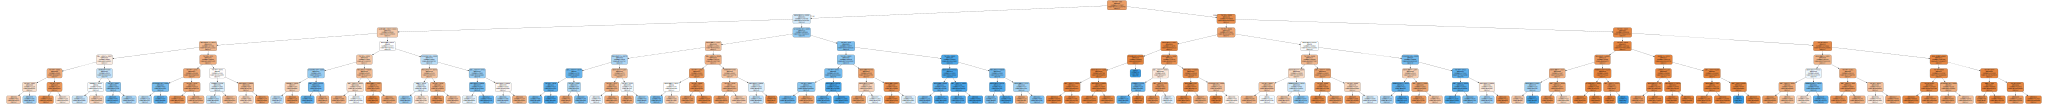

In [195]:
# The tree
from sklearn.tree import export_graphviz
import os

export_graphviz(
        dtc,
        out_file="dt_tree.dot",
        feature_names=X_train_enc.columns,
        class_names=['y', 'n'],
        rounded=True,
        filled=True
    )
Source.from_file("dt_tree.dot") 
#I don't know how to make the graph smaller!

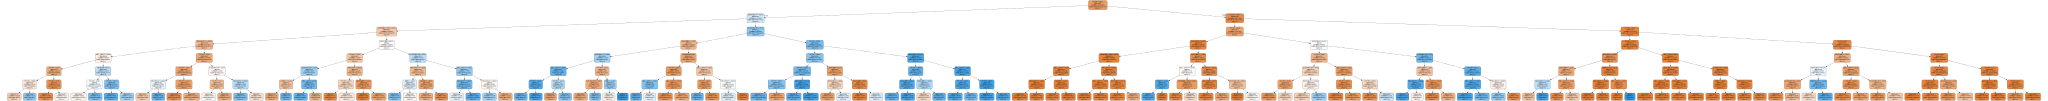

In [196]:
# The another tree
export_graphviz(
        dtc_last_years,
        out_file="dt_tree_last_years.dot",
        feature_names=X_last_years_train_enc.columns,
        class_names=['y', 'n'],
        rounded=True,
        filled=True
    )
Source.from_file("dt_tree_last_years.dot")

In [197]:
y_pred= dtc.predict(X_test_enc)

In [198]:
y_last_years_pred = dtc_last_years.predict(X_last_years_test_enc)

In [199]:
print(f'All years \n {classification_report(y_true=y_test,y_pred=y_pred)}\
    \n--------------------------------------------------------------------------\n Last years \n\
      {classification_report(y_true=y_last_years_test,y_pred=y_last_years_pred)}')


All years 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95    147903
           1       0.81      0.72      0.76     31512

    accuracy                           0.92    179415
   macro avg       0.87      0.84      0.86    179415
weighted avg       0.92      0.92      0.92    179415
    
--------------------------------------------------------------------------
 Last years 
                    precision    recall  f1-score   support

           0       0.94      0.97      0.96    143881
           1       0.83      0.72      0.77     29933

    accuracy                           0.93    173814
   macro avg       0.89      0.84      0.86    173814
weighted avg       0.92      0.93      0.92    173814



In [200]:
#Balamced accuracy
print('Balanced accuracy score for test data of all years is:', bas(y_test,y_pred))
print('Balanced accuracy score for test data of last years is:', bas(y_last_years_test,y_last_years_pred))
confusionmatrix = pd.DataFrame(confusion_matrix(y_test, y_pred))

confusionmatrix_last_years = pd.DataFrame(confusion_matrix(y_last_years_test, y_last_years_pred))

confusionmatrix.index = ['Actual Payed','Actual Defaulted']
confusionmatrix.columns = ['Predicted Payed','Predicted Defaulted']

confusionmatrix_last_years.index = ['Actual Payed','Actual Defaulted']
confusionmatrix_last_years.columns = ['Predicted Payed','Predicted Defaulted']

print('\n')
print(confusionmatrix)
print('---------------------------------------------------------\n Last years \n')
print(confusionmatrix_last_years)

Balanced accuracy score for test data of all years is: 0.8395806006328461
Balanced accuracy score for test data of last years is: 0.8428642383903869


                  Predicted Payed  Predicted Defaulted
Actual Payed               142537                 5366
Actual Defaulted             8967                22545
---------------------------------------------------------
 Last years 

                  Predicted Payed  Predicted Defaulted
Actual Payed               139641                 4240
Actual Defaulted             8525                21408


Both models seem to have good performance, a little better the model of the last years, although it would be necessary to see if there is no overfitting.

Let's predict with the training sets to see if there is overfitting.

In [201]:
control_overfitting_dtc= dtc.predict(X_train_enc)
control_overfitting_last_years_dtc= dtc_last_years.predict(X_last_years_train_enc) 

In [202]:
print(f'All years \n {classification_report(y_train,control_overfitting_dtc)}\
    \n--------------------------------------------------------------------------\n Last years \n\
      {classification_report(y_last_years_train,control_overfitting_last_years_dtc)}')

All years 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95    591612
           1       0.81      0.72      0.76    126045

    accuracy                           0.92    717657
   macro avg       0.88      0.84      0.86    717657
weighted avg       0.92      0.92      0.92    717657
    
--------------------------------------------------------------------------
 Last years 
                    precision    recall  f1-score   support

           0       0.94      0.97      0.96    575520
           1       0.83      0.72      0.77    119734

    accuracy                           0.93    695254
   macro avg       0.89      0.84      0.86    695254
weighted avg       0.92      0.93      0.92    695254



In [203]:
print('Balanced accuracy score for training data of all years is:', bas(y_train,control_overfitting_dtc))
print('Balanced accuracy score for training data of last years is:', bas(y_last_years_train,control_overfitting_last_years_dtc))

Balanced accuracy score for training data of all years is: 0.8409156306083319
Balanced accuracy score for training data of last years is: 0.8430874791608425


The values are similar to those in the test sets. So we conclude that we do not have overfitting and that the algorithm works very well in both cases.

### Logistic regression

In [204]:
log_reg = LogisticRegression()
log_reg_last_years = LogisticRegression()

We train and create the predictions:

In [205]:
log_reg.fit(X_train_enc, y_train)
log_reg_last_years.fit(X_last_years_train_enc, y_last_years_train)

LogisticRegression()

In [206]:
y_pred = log_reg.predict(X_test_enc)
y_last_years_pred=log_reg_last_years.predict(X_last_years_test_enc)

In [207]:
print(f'All years \n {classification_report(y_true=y_test,y_pred=y_pred)}\
    \n--------------------------------------------------------------------------\n Last years \n\
      {classification_report(y_true=y_last_years_test,y_pred=y_last_years_pred)}')

All years 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92    147903
           1       0.72      0.33      0.45     31512

    accuracy                           0.86    179415
   macro avg       0.80      0.65      0.69    179415
weighted avg       0.85      0.86      0.84    179415
    
--------------------------------------------------------------------------
 Last years 
                    precision    recall  f1-score   support

           0       0.88      0.97      0.92    143881
           1       0.73      0.38      0.50     29933

    accuracy                           0.87    173814
   macro avg       0.81      0.68      0.71    173814
weighted avg       0.86      0.87      0.85    173814



In [208]:
#Balamced accuracy
print('Balanced accuracy score for test data of all years is:', bas(y_test,y_pred))
print('Balanced accuracy score for test data of last years is:', bas(y_last_years_test,y_last_years_pred))
confusionmatrix = pd.DataFrame(confusion_matrix(y_test, y_pred))

confusionmatrix_last_years = pd.DataFrame(confusion_matrix(y_last_years_test, y_last_years_pred))

confusionmatrix.index = ['Actual Payed','Actual Defaulted']
confusionmatrix.columns = ['Predicted Payed','Predicted Defaulted']

confusionmatrix_last_years.index = ['Actual Payed','Actual Defaulted']
confusionmatrix_last_years.columns = ['Predicted Payed','Predicted Defaulted']

print('\n')
print(confusionmatrix)
print('---------------------------------------------------------\n Last years \n')
print(confusionmatrix_last_years)

Balanced accuracy score for test data of all years is: 0.6518881825884741
Balanced accuracy score for test data of last years is: 0.6750109574010564


                  Predicted Payed  Predicted Defaulted
Actual Payed               143921                 3982
Actual Defaulted            21091                10421
---------------------------------------------------------
 Last years 

                  Predicted Payed  Predicted Defaulted
Actual Payed               139628                 4253
Actual Defaulted            18571                11362


This model is much worse than the previous one. As before, the set with the least year performs slightly better. But still, it is far from the decision tree model.

Let's predict with the training sets to see if there is overfitting.

In [209]:
control_overfitting_lr= log_reg.predict(X_train_enc)
control_overfitting_last_years_lr= log_reg_last_years.predict(X_last_years_train_enc) 

In [210]:
print(f'All years \n {classification_report(y_train,control_overfitting_lr)}\
    \n--------------------------------------------------------------------------\n Last years \n\
      {classification_report(y_last_years_train,control_overfitting_last_years_lr)}')

All years 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92    591612
           1       0.72      0.33      0.46    126045

    accuracy                           0.86    717657
   macro avg       0.80      0.65      0.69    717657
weighted avg       0.85      0.86      0.84    717657
    
--------------------------------------------------------------------------
 Last years 
                    precision    recall  f1-score   support

           0       0.88      0.97      0.92    575520
           1       0.73      0.38      0.50    119734

    accuracy                           0.87    695254
   macro avg       0.80      0.68      0.71    695254
weighted avg       0.86      0.87      0.85    695254



In [211]:
print('Balanced accuracy score for training data of all years is:', bas(y_train,control_overfitting_lr))
print('Balanced accuracy score for training data of last years is:', bas(y_last_years_train,control_overfitting_last_years_lr))

Balanced accuracy score for training data of all years is: 0.6533733998860498
Balanced accuracy score for training data of last years is: 0.6751477947138305


Here the numbers are very different from the test sets, the indicators are much better predicting with the training data. We clearly have overfitting in both versions of the data set. 

## Feature engineering

Instead of training directly, we are now going to try some variable reduction techniques to see what effect they have on the performance of the model.

### PCA

Let's first try the PCA algorithm. Let's see what happens if we reduce the number of variables in half.

In [212]:
from sklearn.decomposition import PCA

# We generate the PCA model with 9 variables
pca = PCA(n_components = 9)
pca_last_years = PCA(n_components = 9)

# Train and fit
X_train_PCA = pca.fit_transform(X_train_enc)
X_last_years_train_PCA = pca_last_years.fit_transform(X_last_years_train_enc)

# Data variability explanation
print(f'Data variability explanation for X_train_PCA: {pca.explained_variance_ratio_}')
print(f'Data variability explanation for X_last_years_train_PCA: {pca_last_years.explained_variance_ratio_}')

Data variability explanation for X_train_PCA: [0.173474   0.11288869 0.1105396  0.08033239 0.07464543 0.06910934
 0.05599595 0.05563995 0.0515006 ]
Data variability explanation for X_last_years_train_PCA: [0.17272003 0.11577491 0.08561259 0.07961871 0.07396346 0.06877044
 0.05590804 0.05463512 0.05114993]


We train both versions of the datasets with the same algorithms than before.

In [213]:
dtc.fit(X_train_PCA, y_train)
dtc_last_years.fit(X_last_years_train_PCA, y_last_years_train)

DecisionTreeClassifier(max_depth=7, random_state=1234)

In [214]:
log_reg.fit(X_train_PCA, y_train)
log_reg_last_years.fit(X_last_years_train_PCA, y_last_years_train)

LogisticRegression()

We transform the test sets into the new variables calculated by PCA:

In [215]:
X_test_PCA = pca.transform(X_test_enc)
X_last_years_test_PCA = pca_last_years.transform(X_last_years_test_enc)

And we create the new predictions.

In [216]:
y_pred_PCA= dtc.predict(X_test_PCA)

In [217]:
y_last_years_pred_PCA = dtc_last_years.predict(X_last_years_test_PCA)

The metrics for the decision tree algorithm give us:

In [218]:
print(f'All years \n {classification_report(y_true=y_test,y_pred=y_pred_PCA)}\
    \n--------------------------------------------------------------------------\n Last years \n\
      {classification_report(y_true=y_last_years_test,y_pred=y_last_years_pred_PCA)}')


All years 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92    147903
           1       0.70      0.33      0.45     31512

    accuracy                           0.86    179415
   macro avg       0.79      0.65      0.69    179415
weighted avg       0.84      0.86      0.84    179415
    
--------------------------------------------------------------------------
 Last years 
                    precision    recall  f1-score   support

           0       0.87      0.97      0.92    143881
           1       0.70      0.33      0.45     29933

    accuracy                           0.86    173814
   macro avg       0.79      0.65      0.69    173814
weighted avg       0.85      0.86      0.84    173814



In [219]:
#Balamced accuracy
print('Balanced accuracy score for test data of all years is:', bas(y_test,y_pred_PCA))
print('Balanced accuracy score for test data of last years is:', bas(y_last_years_test,y_last_years_pred_PCA))
confusionmatrix = pd.DataFrame(confusion_matrix(y_test, y_pred_PCA))

confusionmatrix_last_years = pd.DataFrame(confusion_matrix(y_last_years_test, y_last_years_pred_PCA))

confusionmatrix.index = ['Actual Payed','Actual Defaulted']
confusionmatrix.columns = ['Predicted Payed','Predicted Defaulted']

confusionmatrix_last_years.index = ['Actual Payed','Actual Defaulted']
confusionmatrix_last_years.columns = ['Predicted Payed','Predicted Defaulted']

print('\n')
print(confusionmatrix)
print('---------------------------------------------------------\n Last years \n')
print(confusionmatrix_last_years)

Balanced accuracy score for test data of all years is: 0.6522496322657778
Balanced accuracy score for test data of last years is: 0.6516989271814672


                  Predicted Payed  Predicted Defaulted
Actual Payed               143460                 4443
Actual Defaulted            20970                10542
---------------------------------------------------------
 Last years 

                  Predicted Payed  Predicted Defaulted
Actual Payed               139678                 4203
Actual Defaulted            19977                 9956


The performance in both datasets is much lower than the case without PCA. Let's see if overfitting is taking place.

In [220]:
control_overfitting_dtc_PCA= dtc.predict(X_train_PCA)
control_overfitting_last_years_dtc_PCA= dtc_last_years.predict(X_last_years_train_PCA) 

In [221]:
print(f'All years \n {classification_report(y_train,control_overfitting_dtc_PCA)}\
    \n--------------------------------------------------------------------------\n Last years \n\
      {classification_report(y_last_years_train,control_overfitting_last_years_dtc_PCA)}')

All years 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92    591612
           1       0.71      0.34      0.46    126045

    accuracy                           0.86    717657
   macro avg       0.79      0.66      0.69    717657
weighted avg       0.84      0.86      0.84    717657
    
--------------------------------------------------------------------------
 Last years 
                    precision    recall  f1-score   support

           0       0.88      0.97      0.92    575520
           1       0.71      0.34      0.46    119734

    accuracy                           0.86    695254
   macro avg       0.79      0.65      0.69    695254
weighted avg       0.85      0.86      0.84    695254



In [222]:
print('Balanced accuracy score for training data of all years is:', bas(y_train,control_overfitting_dtc_PCA))
print('Balanced accuracy score for training data of last years is:', bas(y_last_years_train,control_overfitting_last_years_dtc_PCA))

Balanced accuracy score for training data of all years is: 0.6554359544592795
Balanced accuracy score for training data of last years is: 0.6543276974291206


We do not see signs of overfitting. 

Now let's try logistic regression:

In [223]:
y_pred_PCA = log_reg.predict(X_test_PCA)
y_last_years_pred_PCA=log_reg_last_years.predict(X_last_years_test_PCA)

In [224]:
print(f'All years \n {classification_report(y_true=y_test,y_pred=y_pred_PCA)}\
    \n--------------------------------------------------------------------------\n Last years \n\
      {classification_report(y_true=y_last_years_test,y_pred=y_last_years_pred_PCA)}')

All years 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91    147903
           1       0.74      0.04      0.08     31512

    accuracy                           0.83    179415
   macro avg       0.78      0.52      0.49    179415
weighted avg       0.81      0.83      0.76    179415
    
--------------------------------------------------------------------------
 Last years 
                    precision    recall  f1-score   support

           0       0.84      0.99      0.91    143881
           1       0.66      0.07      0.13     29933

    accuracy                           0.83    173814
   macro avg       0.75      0.53      0.52    173814
weighted avg       0.81      0.83      0.77    173814



In [225]:
#Balamced accuracy
print('Balanced accuracy score for test data of all years is:', bas(y_test,y_pred_PCA))
print('Balanced accuracy score for test data of last years is:', bas(y_last_years_test,y_last_years_pred_PCA))
confusionmatrix = pd.DataFrame(confusion_matrix(y_test, y_pred_PCA))

confusionmatrix_last_years = pd.DataFrame(confusion_matrix(y_last_years_test, y_last_years_pred_PCA))

confusionmatrix.index = ['Actual Payed','Actual Defaulted']
confusionmatrix.columns = ['Predicted Payed','Predicted Defaulted']

confusionmatrix_last_years.index = ['Actual Payed','Actual Defaulted']
confusionmatrix_last_years.columns = ['Predicted Payed','Predicted Defaulted']

print('\n')
print(confusionmatrix)
print('---------------------------------------------------------\n Last years \n')
print(confusionmatrix_last_years)

Balanced accuracy score for test data of all years is: 0.5195675187509295
Balanced accuracy score for test data of last years is: 0.5332625822011497


                  Predicted Payed  Predicted Defaulted
Actual Payed               147430                  473
Actual Defaulted            30178                 1334
---------------------------------------------------------
 Last years 

                  Predicted Payed  Predicted Defaulted
Actual Payed               142724                 1157
Actual Defaulted            27701                 2232


Here too the model behaves much worse than without PCA.

does overfitting occur?

In [226]:
control_overfitting_lr_PCA= log_reg.predict(X_train_PCA)
control_overfitting_last_years_lr_PCA= log_reg_last_years.predict(X_last_years_train_PCA) 

In [227]:
print(f'All years \n {classification_report(y_train,control_overfitting_lr_PCA)}\
    \n--------------------------------------------------------------------------\n Last years \n\
      {classification_report(y_last_years_train,control_overfitting_last_years_lr_PCA)}')

All years 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91    591612
           1       0.73      0.04      0.08    126045

    accuracy                           0.83    717657
   macro avg       0.78      0.52      0.49    717657
weighted avg       0.81      0.83      0.76    717657
    
--------------------------------------------------------------------------
 Last years 
                    precision    recall  f1-score   support

           0       0.84      0.99      0.91    575520
           1       0.66      0.07      0.13    119734

    accuracy                           0.83    695254
   macro avg       0.75      0.53      0.52    695254
weighted avg       0.81      0.83      0.77    695254



In [228]:
print('Balanced accuracy score for training data of all years is:', bas(y_train,control_overfitting_lr_PCA))
print('Balanced accuracy score for training data of last years is:', bas(y_last_years_train,control_overfitting_last_years_lr_PCA))

Balanced accuracy score for training data of all years is: 0.5195483936478017
Balanced accuracy score for training data of last years is: 0.5327612957082435


We see that the predictions in the training set are very similar to those in the test set, so there is no evidence of overfitting. 

We conclude that the PCA algorithm did not work with these models, in fact, it performs worse. Therefore, the information that is lost when doing PCA with this number of variables is significant.

### Sequential floating selection

We are going to apply Sequential Floating Selection algorithms to drop variables, keeping the ones that produce more performance in the model. 

When these algorithms are applied, the number of variables to choose is a number that must be given. Since we don't know which number of variables produces the best performance, let's first create a loop that performs this algorithm on different values of the number of variables and selects the optimal one. The criterion that we will use to decide if a model is better or not is the balanced accuracy metric.

We will start considering one variable and we will increase to two variables, to three, etc., until the metric stops growing. We will consider the final variables that remain as "highlighted".

By doing this for each algorithm, we are going to take all the "highlighted" variables, and the final selection of variables will be all the featured variables that appear at least 2 times.

We are going to do this procedure only with the data sampling of all the years. With various tests and errors that we did in training (which is not worth detailing) we could see that, in general, for the last few years a subset of those obtained for all years is usually obtained.

In [229]:
#!pip install mlxtend 
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

As we are going to do the tests with several possible quantities, we take a sample of the data because otherwise it would take a long time.

In [230]:
# We join x and y first to make the sampling so that the chosen rows of X and y are coherent, and then we split again.
Xy_train=pd.concat([X_train_enc, y_train], axis=1)
Xy_last_years_train =pd.concat([X_last_years_train_enc, y_last_years_train], axis=1)
Xy_train_sample = Xy_train.sample(5000, random_state=4654)
Xy_last_years_train_sample = Xy_last_years_train.sample(5000, random_state=4654)
X_train_sample = Xy_train_sample.drop(['Default'], axis=1)
y_train_sample = Xy_train_sample['Default']
X_last_years_train_sample = Xy_last_years_train_sample.drop(['Default'], axis=1)
y_last_years_train_sample = Xy_last_years_train_sample['Default']

(We also sampled the last few years, despite the fact that in principle we are not going to use these sets, in case we later want to do a quick test only with these).

#### Decision tree

We're going to start using a Sequential Forward Floating Selection (SFFS) with an increasing number of variables until performance doesn't improve any further.

In [231]:
metric = [] #This is a list that will have the different values of the metric depending on the number of parameters.
last_metric_value=0 # Auxiliary value for the next loop. This value ensures at least two steps.
flag=True
n_features=1 # Initial parameter of the loop.
while flag: # This while will iterate, increasing the n_features variable from 1 to as far as it goes. We use while 
    # instead of for because we are going to cut when the metric stops improving.
    sfs_dtc = SFS(dtc,
        k_features=n_features,
        forward=True, # This parameter increases  the number of variables, that is, it is 'Sequential floating forward selection'
        # instead of 'Sequential floating backward selection'.
        floating=True, 
        scoring = 'balanced_accuracy',
        cv = 5)
    sfs_dtc.fit(X_train_sample.to_numpy(), y_train_sample.to_numpy()) # We transform the dataset to numpy arrays because otherwise it 
# returns an error. (If the floating parameter is False, it is not necessary. In that case, it does not return an error.)
    metric.append(sfs_dtc.k_score_)
    print(f'Finished the iteration corresponding to the final number of attributes equal to {n_features}, the metric obtained in this step has the value {sfs_dtc.k_score_}.') 
    # Since it takes a while, we put a progress status indicator.
    if sfs_dtc.k_score_< last_metric_value: 
        # We assume that the higher the metric value, the better the model. If it doesn't improve on the current step, 
        # cut the while.
        flag=False
    else:
        last_metric_value = sfs_dtc.k_score_
        n_features += 1
        chosen_features_dtc=sfs_dtc.k_feature_names_ # We put together the list of the chosen features. In the case that did not improve 
    # (the other branch of the if), this list is not updated (since the last step did not improve the metric).
print(f'Then the score in the different steps is {metric}.')

Finished the iteration corresponding to the final number of attributes equal to 1, the metric obtained in this step has the value 0.8323274761474645.
Finished the iteration corresponding to the final number of attributes equal to 2, the metric obtained in this step has the value 0.8426904091427762.
Finished the iteration corresponding to the final number of attributes equal to 3, the metric obtained in this step has the value 0.8516738445657207.
Finished the iteration corresponding to the final number of attributes equal to 4, the metric obtained in this step has the value 0.8516738445657207.
Finished the iteration corresponding to the final number of attributes equal to 5, the metric obtained in this step has the value 0.8522452731371493.
Finished the iteration corresponding to the final number of attributes equal to 6, the metric obtained in this step has the value 0.8515184406476048.
Then the score in the different steps is [0.8323274761474645, 0.8426904091427762, 0.8516738445657207

In [232]:
# The chosen_features objects are tuples of strings, they are the column numbers corresponding to the optimal attributes. 
# It is convenient to pass them to lists of integers.
chosen_features_dtc=list(chosen_features_dtc)
chosen_features_dtc=[eval(i) for i in chosen_features_dtc] # Convert the column numbers from string to integer.
print(f'The chosen features for X_train_sample in the Decision Tree algorithm are {list((X_train_sample.iloc[:, chosen_features_dtc]).columns)} and the value obtained from the metric is {last_metric_value}.') #This code is 
# for it to return the list of names, the output of the previous algorithm were the numbers of the columns due to the 
#issue of transforming the entry of the Feature Selector into an array because otherwise it returns an error.

The chosen features for X_train_sample in the Decision Tree algorithm are ['Term', 'UrbanRural', 'LowDoc', 'Real_Estate', 'SameState_Unknown'] and the value obtained from the metric is 0.8522452731371493.


In [233]:
n_features_optimal_dtc = len(chosen_features_dtc)
print(f'The optimal number of attributes for X_train_sample in the Decision Tree algorithm gave us {n_features_optimal_dtc}.')

The optimal number of attributes for X_train_sample in the Decision Tree algorithm gave us 5.


#### Logistic regression

We are going to do the same as with the previous algorithm.

In [234]:
metric = [] #This is a list that will have the different values of the metric depending on the number of parameters.
last_metric_value=0 # Auxiliary value for the next loop. This value ensures at least two steps.
flag=True
n_features=1 # Initial parameter of the loop.
while flag: # This while will iterate, increasing the n_features variable from 1 to as far as it goes. We use while 
    # instead of for because we are going to cut when the metric stops improving.
    sfs_log_reg = SFS(log_reg,
        k_features=n_features,
        forward=True, # This parameter increases  the number of variables, that is, it is 'Sequential floating forward selection'
        # instead of 'Sequential floating backward selection'.
        floating=True, 
        scoring = 'balanced_accuracy',
        cv = 5)
    sfs_log_reg.fit(X_train_sample.to_numpy(), y_train_sample.to_numpy()) # We transform the dataset to numpy arrays because otherwise it 
# returns an error. (If the floating parameter is False, it is not necessary. In that case, it does not return an error.)
    metric.append(sfs_log_reg.k_score_)
    print(f'Finished the iteration corresponding to the final number of attributes equal to {n_features}, the metric obtained in this step has the value {sfs_log_reg.k_score_}.') 
    # Since it takes a while, we put a progress status indicator.
    if sfs_log_reg.k_score_< last_metric_value: 
        # We assume that the higher the metric value, the better the model. If it doesn't improve on the current step, 
        # cut the while.
        flag=False
    else:
        last_metric_value = sfs_log_reg.k_score_
        n_features += 1
        chosen_features_log_reg=sfs_log_reg.k_feature_names_ # We put together the list of the chosen features. In the case that did not improve 
    # (the other branch of the if), this list is not updated (since the last step did not improve the metric).
print(f'Then the score in the different steps is {metric}.')

Finished the iteration corresponding to the final number of attributes equal to 1, the metric obtained in this step has the value 0.5492292247008785.
Finished the iteration corresponding to the final number of attributes equal to 2, the metric obtained in this step has the value 0.612901080606516.
Finished the iteration corresponding to the final number of attributes equal to 3, the metric obtained in this step has the value 0.6329270141508598.
Finished the iteration corresponding to the final number of attributes equal to 4, the metric obtained in this step has the value 0.6517682730283548.
Finished the iteration corresponding to the final number of attributes equal to 5, the metric obtained in this step has the value 0.6626017037706108.
Finished the iteration corresponding to the final number of attributes equal to 6, the metric obtained in this step has the value 0.6646021642491544.
Finished the iteration corresponding to the final number of attributes equal to 7, the metric obtaine

In [235]:
# The chosen_features objects are tuples of strings, they are the column numbers corresponding to the optimal attributes. 
# It is convenient to pass them to lists of integers.
chosen_features_log_reg=list(chosen_features_log_reg)
chosen_features_log_reg=[eval(i) for i in chosen_features_log_reg] # Convert the column numbers from string to integer.
print(f'The chosen features for X_train_sample in the Logistic Regression algorithm are {list((X_train_sample.iloc[:, chosen_features_log_reg]).columns)} and the value obtained from the metric is {last_metric_value}.') #This code is 
# for it to return the list of names, the output of the previous algorithm were the numbers of the columns due to the 
#issue of transforming the entry of the Feature Selector into an array because otherwise it returns an error.

The chosen features for X_train_sample in the Logistic Regression algorithm are ['Term', 'NewExist', 'CreateJob', 'RetainedJob', 'UrbanRural', 'Real_Estate', 'SameState_False', 'SameState_True', 'SameState_Unknown', 'Sector', 'BankClass'] and the value obtained from the metric is 0.6701461336248011.


In [236]:
n_features_optimal_log_reg = len(chosen_features_log_reg)
print(f'The optimal number of attributes for X_train_sample in the Logistic Regression algorithm gave us {n_features_optimal_log_reg}.')

The optimal number of attributes for X_train_sample in the Logistic Regression algorithm gave us 11.


#### K-nearest neighbors

Now we will do the same with the KNN algorithm.

In [237]:
knn=KNN()

In [238]:
metric = [] #This is a list that will have the different values of the metric depending on the number of parameters.
last_metric_value=0 # Auxiliary value for the next loop. This value ensures at least two steps.
flag=True
n_features=1 # Initial parameter of the loop.
while flag: # This while will iterate, increasing the n_features variable from 1 to as far as it goes. We use while 
    # instead of for because we are going to cut when the metric stops improving.
    sfs_knn = SFS(knn,
        k_features=n_features,
        forward=True, # This parameter increases  the number of variables, that is, it is 'Sequential floating forward selection'
        # instead of 'Sequential floating backward selection'.
        floating=True, 
        scoring = 'balanced_accuracy',
        cv = 5)
    sfs_knn.fit(X_train_sample.to_numpy(), y_train_sample.to_numpy()) # We transform the dataset to numpy arrays because otherwise it 
# returns an error. (If the floating parameter is False, it is not necessary. In that case, it does not return an error.)
    metric.append(sfs_knn.k_score_)
    print(f'Finished the iteration corresponding to the final number of attributes equal to {n_features}, the metric obtained in this step has the value {sfs_knn.k_score_}.') 
    # Since it takes a while, we put a progress status indicator.
    if sfs_knn.k_score_< last_metric_value: 
        # We assume that the higher the metric value, the better the model. If it doesn't improve on the current step, 
        # cut the while.
        flag=False
    else:
        last_metric_value = sfs_knn.k_score_
        n_features += 1
        chosen_features_knn=sfs_knn.k_feature_names_ # We put together the list of the chosen features. In the case that did not improve 
    # (the other branch of the if), this list is not updated (since the last step did not improve the metric).
print(f'Then the score in the different steps is {metric}.')

Finished the iteration corresponding to the final number of attributes equal to 1, the metric obtained in this step has the value 0.8252350641760342.
Finished the iteration corresponding to the final number of attributes equal to 2, the metric obtained in this step has the value 0.8263711912478715.
Finished the iteration corresponding to the final number of attributes equal to 3, the metric obtained in this step has the value 0.8264922566231743.
Finished the iteration corresponding to the final number of attributes equal to 4, the metric obtained in this step has the value 0.8253232989492487.
Then the score in the different steps is [0.8252350641760342, 0.8263711912478715, 0.8264922566231743, 0.8253232989492487].


In [239]:
# The chosen_features objects are tuples of strings, they are the column numbers corresponding to the optimal attributes. 
# It is convenient to pass them to lists of integers.
chosen_features_knn=list(chosen_features_knn)
chosen_features_knn=[eval(i) for i in chosen_features_knn] # Convert the column numbers from string to integer.
print(f'The chosen features for X_train_sample in the KNN algorithm are {list((X_train_sample.iloc[:, chosen_features_knn]).columns)} and the value obtained from the metric is {last_metric_value}.') #This code is 
# for it to return the list of names, the output of the previous algorithm were the numbers of the columns due to the 
#issue of transforming the entry of the Feature Selector into an array because otherwise it returns an error.

The chosen features for X_train_sample in the KNN algorithm are ['Term', 'Real_Estate', 'SameState_Unknown'] and the value obtained from the metric is 0.8264922566231743.


In [240]:
n_features_optimal_knn = len(chosen_features_knn)
print(f'The optimal number of attributes for X_train_sample in the Decision Tree algorithm gave us {n_features_optimal_knn}.')

The optimal number of attributes for X_train_sample in the Decision Tree algorithm gave us 3.


#### Support vector machines

Finally, let's see what columns we get from a support vector machine.

In [241]:
s_v_m=svm.SVC()

In [242]:
metric = [] #This is a list that will have the different values of the metric depending on the number of parameters.
last_metric_value=0 # Auxiliary value for the next loop. This value ensures at least two steps.
flag=True
n_features=1 # Initial parameter of the loop.
while flag: # This while will iterate, increasing the n_features variable from 1 to as far as it goes. We use while 
    # instead of for because we are going to cut when the metric stops improving.
    sfs_s_v_m = SFS(s_v_m,
        k_features=n_features,
        forward=True, # This parameter increases  the number of variables, that is, it is 'Sequential floating forward selection'
        # instead of 'Sequential floating backward selection'.
        floating=True, 
        scoring = 'balanced_accuracy',
        cv = 5)
    sfs_s_v_m.fit(X_train_sample.to_numpy(), y_train_sample.to_numpy()) # We transform the dataset to numpy arrays because otherwise it 
# returns an error. (If the floating parameter is False, it is not necessary. In that case, it does not return an error.)
    metric.append(sfs_s_v_m.k_score_)
    print(f'Finished the iteration corresponding to the final number of attributes equal to {n_features}, the metric obtained in this step has the value {sfs_s_v_m.k_score_}.') 
    # Since it takes a while, we put a progress status indicator.
    if sfs_s_v_m.k_score_< last_metric_value: 
        # We assume that the higher the metric value, the better the model. If it doesn't improve on the current step, 
        # cut the while.
        flag=False
    else:
        last_metric_value = sfs_s_v_m.k_score_
        n_features += 1
        chosen_features_s_v_m=sfs_s_v_m.k_feature_names_ # We put together the list of the chosen features. In the case that did not improve 
    # (the other branch of the if), this list is not updated (since the last step did not improve the metric).
print(f'Then the score in the different steps is {metric}.')

Finished the iteration corresponding to the final number of attributes equal to 1, the metric obtained in this step has the value 0.5854732682085106.
Finished the iteration corresponding to the final number of attributes equal to 2, the metric obtained in this step has the value 0.6913224893166448.
Finished the iteration corresponding to the final number of attributes equal to 3, the metric obtained in this step has the value 0.6925721420601608.
Finished the iteration corresponding to the final number of attributes equal to 4, the metric obtained in this step has the value 0.6924062989416584.
Then the score in the different steps is [0.5854732682085106, 0.6913224893166448, 0.6925721420601608, 0.6924062989416584].


In [243]:
# The chosen_features objects are tuples of strings, they are the column numbers corresponding to the optimal attributes. 
# It is convenient to pass them to lists of integers.
chosen_features_s_v_m=list(chosen_features_s_v_m)
chosen_features_s_v_m=[eval(i) for i in chosen_features_s_v_m] # Convert the column numbers from string to integer.
print(f'The chosen features for X_train_sample in the Support Vector Machine algorithm are {list((X_train_sample.iloc[:, chosen_features_s_v_m]).columns)} and the value obtained from the metric is {last_metric_value}.') #This code is 
# for it to return the list of names, the output of the previous algorithm were the numbers of the columns due to the 
#issue of transforming the entry of the Feature Selector into an array because otherwise it returns an error.

The chosen features for X_train_sample in the Support Vector Machine algorithm are ['Term', 'UrbanRural', 'SameState_False'] and the value obtained from the metric is 0.6925721420601608.


In [244]:
n_features_optimal_s_v_m = len(chosen_features_s_v_m)
print(f'The optimal number of attributes for X_train_sample in the Support Vector Machine algorithm gave us {n_features_optimal_s_v_m}.')

The optimal number of attributes for X_train_sample in the Support Vector Machine algorithm gave us 3.


#### Choosing the most "important" variables

The list of the "highlighted" variables are:

In [245]:
list((X_train_sample.iloc[:, chosen_features_dtc]).columns)

['Term', 'UrbanRural', 'LowDoc', 'Real_Estate', 'SameState_Unknown']

In [246]:
list((X_train_sample.iloc[:, chosen_features_log_reg]).columns)

['Term',
 'NewExist',
 'CreateJob',
 'RetainedJob',
 'UrbanRural',
 'Real_Estate',
 'SameState_False',
 'SameState_True',
 'SameState_Unknown',
 'Sector',
 'BankClass']

In [247]:
list((X_train_sample.iloc[:, chosen_features_knn]).columns)

['Term', 'Real_Estate', 'SameState_Unknown']

In [248]:
list((X_train_sample.iloc[:, chosen_features_s_v_m]).columns)

['Term', 'UrbanRural', 'SameState_False']

The list of important variables are those that are repeated at least twice in the previous lists, that is:

In [249]:
important_features=[]
a=np.zeros(len(X_train_sample.columns))
for i in range(len(X_train_sample.columns)):
    a[i]=0
    if i in chosen_features_dtc:
        a[i] += 1
    if i in chosen_features_log_reg:
        a[i] += 1
    if i in chosen_features_knn:
        a[i] += 1
    if i in chosen_features_s_v_m:
        a[i] += 1
    if a[i]>1:
        important_features.append(i)
list((X_train_sample.iloc[:, important_features]).columns)

['Term', 'UrbanRural', 'Real_Estate', 'SameState_False', 'SameState_Unknown']

#### Training with the selected variables

Now we are going to train the dataset of all the years and of the last years (not a sample) with several models and evaluate which one is better. We are not going to train with support vector machines because it takes a long, long time.

In [250]:
# We keep only the selected variables
X_train_SFS=X_train_enc.iloc[:, important_features]
X_test_SFS = X_test_enc.iloc[:, important_features]
X_last_years_train_SFS=X_last_years_train_enc.iloc[:, important_features]
X_last_years_test_SFS = X_last_years_test_enc.iloc[:, important_features]

And now we train and predict for several algorithms in both versions of the dataset.

In [251]:
#### Decision Tree Clasifier

In [252]:
dtc_SFS = tree.DecisionTreeClassifier(random_state=1234, max_depth=7)
dtc_SFS.fit(X_train_SFS, y_train) 

DecisionTreeClassifier(max_depth=7, random_state=1234)

In [253]:
dtc_last_years_SFS= tree.DecisionTreeClassifier(random_state=1234, max_depth=7)
dtc_last_years_SFS.fit(X_last_years_train_SFS, y_last_years_train) 

DecisionTreeClassifier(max_depth=7, random_state=1234)

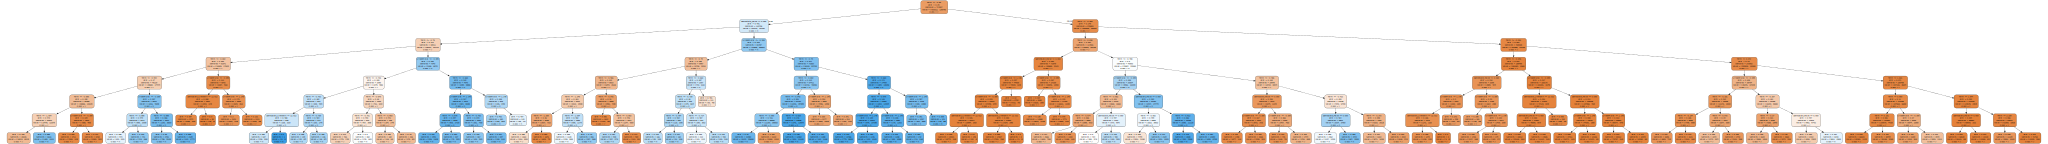

In [254]:
# The tree
export_graphviz(
        dtc_SFS,
        out_file="dt_tree.dot",
        feature_names=X_train_SFS.columns,
        class_names=['y', 'n'],
        rounded=True,
        filled=True
    )
Source.from_file("dt_tree.dot") 
#I don't know how to make the graph smaller!

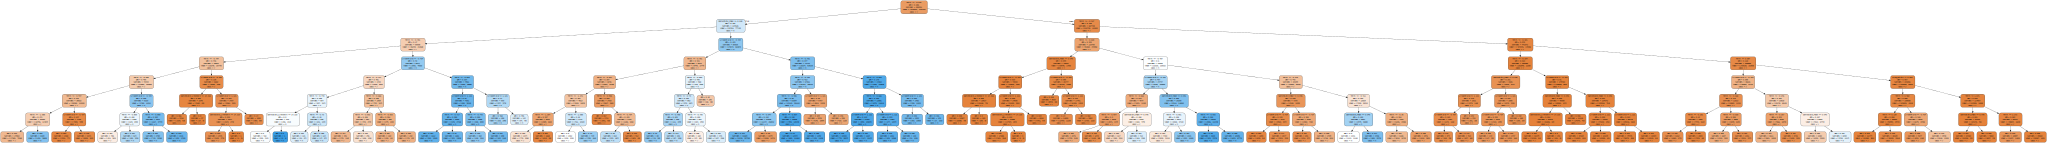

In [255]:
# The another tree
export_graphviz(
        dtc_last_years_SFS,
        out_file="dt_tree_last_years.dot",
        feature_names=X_last_years_train_SFS.columns,
        class_names=['y', 'n'],
        rounded=True,
        filled=True
    )
Source.from_file("dt_tree_last_years.dot")

In [256]:
y_pred_dtc_SFS= dtc_SFS.predict(X_test_SFS)

In [257]:
y_last_years_pred_dtc_SFS = dtc_last_years_SFS.predict(X_last_years_test_SFS)

In [258]:
print(f'All years \n {classification_report(y_true=y_test,y_pred=y_pred_dtc_SFS)}\
    \n--------------------------------------------------------------------------\n Last years \n\
      {classification_report(y_true=y_last_years_test,y_pred=y_last_years_pred_dtc_SFS)}')


All years 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95    147903
           1       0.79      0.70      0.74     31512

    accuracy                           0.92    179415
   macro avg       0.86      0.83      0.85    179415
weighted avg       0.91      0.92      0.91    179415
    
--------------------------------------------------------------------------
 Last years 
                    precision    recall  f1-score   support

           0       0.94      0.96      0.95    143881
           1       0.80      0.72      0.76     29933

    accuracy                           0.92    173814
   macro avg       0.87      0.84      0.85    173814
weighted avg       0.92      0.92      0.92    173814



In [259]:
#Balamced accuracy
print('Balanced accuracy score for test data of all years is:', bas(y_test,y_pred_dtc_SFS))
print('Balanced accuracy score for test data of last years is:', bas(y_last_years_test,y_last_years_pred_dtc_SFS))
confusionmatrix = pd.DataFrame(confusion_matrix(y_test, y_pred_dtc_SFS))

confusionmatrix_last_years = pd.DataFrame(confusion_matrix(y_last_years_test, y_last_years_pred_dtc_SFS))

confusionmatrix.index = ['Actual Payed','Actual Defaulted']
confusionmatrix.columns = ['Predicted Payed','Predicted Defaulted']

confusionmatrix_last_years.index = ['Actual Payed','Actual Defaulted']
confusionmatrix_last_years.columns = ['Predicted Payed','Predicted Defaulted']

print('\n')
print(confusionmatrix)
print('---------------------------------------------------------\n Last years \n')
print(confusionmatrix_last_years)

Balanced accuracy score for test data of all years is: 0.8314035477462614
Balanced accuracy score for test data of last years is: 0.841146805906711


                  Predicted Payed  Predicted Defaulted
Actual Payed               142066                 5837
Actual Defaulted             9382                22130
---------------------------------------------------------
 Last years 

                  Predicted Payed  Predicted Defaulted
Actual Payed               138445                 5436
Actual Defaulted             8379                21554


The performance is very slightly better than in the case without choosing variables.

Let's predict with the training sets to see if there is overfitting.

In [260]:
control_overfitting_dtc_SFS= dtc_SFS.predict(X_train_SFS)
control_overfitting_last_years_dtc_SFS= dtc_last_years_SFS.predict(X_last_years_train_SFS) 

In [261]:
print(f'All years \n {classification_report(y_train,control_overfitting_dtc_SFS)}\
    \n--------------------------------------------------------------------------\n Last years \n\
      {classification_report(y_last_years_train,control_overfitting_last_years_dtc_SFS)}')

All years 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95    591612
           1       0.79      0.70      0.74    126045

    accuracy                           0.91    717657
   macro avg       0.86      0.83      0.85    717657
weighted avg       0.91      0.91      0.91    717657
    
--------------------------------------------------------------------------
 Last years 
                    precision    recall  f1-score   support

           0       0.94      0.96      0.95    575520
           1       0.79      0.72      0.75    119734

    accuracy                           0.92    695254
   macro avg       0.87      0.84      0.85    695254
weighted avg       0.92      0.92      0.92    695254



In [262]:
print('Balanced accuracy score for training data of all years is:', bas(y_train,control_overfitting_dtc_SFS))
print('Balanced accuracy score for training data of last years is:', bas(y_last_years_train,control_overfitting_last_years_dtc_SFS))


Balanced accuracy score for training data of all years is: 0.8308584492179687
Balanced accuracy score for training data of last years is: 0.8397257398784106


The values are very similar to those of the test sets, even slightly worse!. So we conclude that we do not have overfitting and works very slighty better than without feature selection.

##### Logistic Regression

Now, we try with de Logistic Regression algorithm.

In [263]:
log_reg_SFS = LogisticRegression()
log_reg_SFS.fit(X_train_SFS, y_train) 

LogisticRegression()

In [264]:
log_reg_last_years_SFS= LogisticRegression()
log_reg_last_years_SFS.fit(X_last_years_train_SFS, y_last_years_train) 

LogisticRegression()

In [265]:
y_pred_log_reg_SFS= log_reg_SFS.predict(X_test_SFS)

In [266]:
y_last_years_pred_log_reg_SFS = log_reg_last_years_SFS.predict(X_last_years_test_SFS)

In [267]:
print(f'All years \n {classification_report(y_true=y_test,y_pred=y_pred_log_reg_SFS)}\
    \n--------------------------------------------------------------------------\n Last years \n\
      {classification_report(y_true=y_last_years_test,y_pred=y_last_years_pred_log_reg_SFS)}')


All years 
               precision    recall  f1-score   support

           0       0.86      0.98      0.91    147903
           1       0.70      0.24      0.36     31512

    accuracy                           0.85    179415
   macro avg       0.78      0.61      0.64    179415
weighted avg       0.83      0.85      0.82    179415
    
--------------------------------------------------------------------------
 Last years 
                    precision    recall  f1-score   support

           0       0.87      0.97      0.92    143881
           1       0.67      0.29      0.41     29933

    accuracy                           0.85    173814
   macro avg       0.77      0.63      0.66    173814
weighted avg       0.83      0.85      0.83    173814



In [268]:
#Balamced accuracy
print('Balanced accuracy score for test data of all years is:', bas(y_test,y_pred_log_reg_SFS))
print('Balanced accuracy score for test data of last years is:', bas(y_last_years_test,y_last_years_pred_log_reg_SFS))
confusionmatrix = pd.DataFrame(confusion_matrix(y_test, y_pred_log_reg_SFS))

confusionmatrix_last_years = pd.DataFrame(confusion_matrix(y_last_years_test, y_last_years_pred_log_reg_SFS))

confusionmatrix.index = ['Actual Payed','Actual Defaulted']
confusionmatrix.columns = ['Predicted Payed','Predicted Defaulted']

confusionmatrix_last_years.index = ['Actual Payed','Actual Defaulted']
confusionmatrix_last_years.columns = ['Predicted Payed','Predicted Defaulted']

print('\n')
print(confusionmatrix)
print('---------------------------------------------------------\n Last years \n')
print(confusionmatrix_last_years)

Balanced accuracy score for test data of all years is: 0.6097843852230624
Balanced accuracy score for test data of last years is: 0.6308317545161146


                  Predicted Payed  Predicted Defaulted
Actual Payed               144660                 3243
Actual Defaulted            23902                 7610
---------------------------------------------------------
 Last years 

                  Predicted Payed  Predicted Defaulted
Actual Payed               139624                 4257
Actual Defaulted            21215                 8718


We see that the performance is worse than in the case of taking all the variables. Let's remember that the feature selection of this algorithm recommended many more variables, 11. So this algorithm needs more information than the others, but even so the performance is not one of the best.

Let's check if there is overfitting.

In [269]:
control_overfitting_log_reg_SFS= log_reg_SFS.predict(X_train_SFS)
control_overfitting_last_years_log_reg_SFS= log_reg_last_years_SFS.predict(X_last_years_train_SFS) 

In [270]:
print(f'All years \n {classification_report(y_train,control_overfitting_log_reg_SFS)}\
    \n--------------------------------------------------------------------------\n Last years \n\
      {classification_report(y_last_years_train,control_overfitting_last_years_log_reg_SFS)}')

All years 
               precision    recall  f1-score   support

           0       0.86      0.98      0.91    591612
           1       0.71      0.24      0.36    126045

    accuracy                           0.85    717657
   macro avg       0.78      0.61      0.64    717657
weighted avg       0.83      0.85      0.82    717657
    
--------------------------------------------------------------------------
 Last years 
                    precision    recall  f1-score   support

           0       0.87      0.97      0.92    575520
           1       0.67      0.29      0.40    119734

    accuracy                           0.85    695254
   macro avg       0.77      0.63      0.66    695254
weighted avg       0.83      0.85      0.83    695254



In [271]:
print('Balanced accuracy score for training data of all years is:', bas(y_train,control_overfitting_log_reg_SFS))
print('Balanced accuracy score for training data of last years is:', bas(y_last_years_train,control_overfitting_last_years_log_reg_SFS))


Balanced accuracy score for training data of all years is: 0.6112833133735868
Balanced accuracy score for training data of last years is: 0.6298290008256835


Unlike the case without selecting variables, we do not see obvious signs of overfitting. This is an improvement.

 ##### K-nearest neighbors

We train the KNN algorithm.

In [272]:
knn_SFS = KNN()
knn_SFS.fit(X_train_SFS, y_train) 

KNeighborsClassifier()

In [273]:
knn_last_years_SFS= KNN()
knn_last_years_SFS.fit(X_last_years_train_SFS, y_last_years_train) 

KNeighborsClassifier()

In [274]:
y_pred_knn_SFS= knn_SFS.predict(X_test_SFS)

In [275]:
y_last_years_pred_knn_SFS = knn_last_years_SFS.predict(X_last_years_test_SFS)

In [276]:
print(f'All years \n {classification_report(y_true=y_test,y_pred=y_pred_knn_SFS)}\
    \n--------------------------------------------------------------------------\n Last years \n\
      {classification_report(y_true=y_last_years_test,y_pred=y_last_years_pred_knn_SFS)}')


All years 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95    147903
           1       0.80      0.75      0.77     31512

    accuracy                           0.92    179415
   macro avg       0.87      0.85      0.86    179415
weighted avg       0.92      0.92      0.92    179415
    
--------------------------------------------------------------------------
 Last years 
                    precision    recall  f1-score   support

           0       0.95      0.96      0.95    143881
           1       0.79      0.77      0.78     29933

    accuracy                           0.92    173814
   macro avg       0.87      0.86      0.87    173814
weighted avg       0.92      0.92      0.92    173814



In [277]:
#Balamced accuracy
print('Balanced accuracy score for test data of all years is:', bas(y_test,y_pred_knn_SFS))
print('Balanced accuracy score for test data of last years is:', bas(y_last_years_test,y_last_years_pred_knn_SFS))
confusionmatrix = pd.DataFrame(confusion_matrix(y_test, y_pred_knn_SFS))

confusionmatrix_last_years = pd.DataFrame(confusion_matrix(y_last_years_test, y_last_years_pred_knn_SFS))

confusionmatrix.index = ['Actual Payed','Actual Defaulted']
confusionmatrix.columns = ['Predicted Payed','Predicted Defaulted']

confusionmatrix_last_years.index = ['Actual Payed','Actual Defaulted']
confusionmatrix_last_years.columns = ['Predicted Payed','Predicted Defaulted']

print('\n')
print(confusionmatrix)
print('---------------------------------------------------------\n Last years \n')
print(confusionmatrix_last_years)

Balanced accuracy score for test data of all years is: 0.8547293585626886
Balanced accuracy score for test data of last years is: 0.8622659342064927


                  Predicted Payed  Predicted Defaulted
Actual Payed               141996                 5907
Actual Defaulted             7897                23615
---------------------------------------------------------
 Last years 

                  Predicted Payed  Predicted Defaulted
Actual Payed               137788                 6093
Actual Defaulted             6978                22955


In this case we have not done the training with all the columns of the dataset (it takes a long time), so we compare with the previous algorithms.

All the metrics are the same or slightly better than the best model we had, which was the tree. It would be necessary to see if there is overfitting.

Let's check if there is overfitting.

In [278]:
control_overfitting_knn_SFS= knn_SFS.predict(X_train_SFS)
control_overfitting_last_years_knn_SFS= knn_last_years_SFS.predict(X_last_years_train_SFS) 

In [279]:
print(f'All years \n {classification_report(y_train,control_overfitting_knn_SFS)}\
    \n--------------------------------------------------------------------------\n Last years \n\
      {classification_report(y_last_years_train,control_overfitting_last_years_knn_SFS)}')

All years 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95    591612
           1       0.80      0.76      0.78    126045

    accuracy                           0.92    717657
   macro avg       0.88      0.86      0.87    717657
weighted avg       0.92      0.92      0.92    717657
    
--------------------------------------------------------------------------
 Last years 
                    precision    recall  f1-score   support

           0       0.95      0.96      0.95    575520
           1       0.79      0.77      0.78    119734

    accuracy                           0.92    695254
   macro avg       0.87      0.86      0.87    695254
weighted avg       0.92      0.92      0.92    695254



In [280]:
print('Balanced accuracy score for training data of all years is:', bas(y_train,control_overfitting_knn_SFS))
print('Balanced accuracy score for training data of last years is:', bas(y_last_years_train,control_overfitting_last_years_knn_SFS))


Balanced accuracy score for training data of all years is: 0.8586515959253407
Balanced accuracy score for training data of last years is: 0.8625702247908449


We see no signs of overfitting.

 ##### Random Forest

In [281]:
rfc_SFS = RFC(n_estimators=100)
rfc_SFS.fit(X_train_SFS, y_train) 

RandomForestClassifier()

In [282]:
rfc_last_years_SFS= RFC(n_estimators=100)
rfc_last_years_SFS.fit(X_last_years_train_SFS, y_last_years_train) 

RandomForestClassifier()

In [283]:
y_pred_rfc_SFS= rfc_SFS.predict(X_test_SFS)

In [284]:
y_last_years_pred_rfc_SFS = rfc_last_years_SFS.predict(X_last_years_test_SFS)

In [285]:
print(f'All years \n {classification_report(y_true=y_test,y_pred=y_pred_rfc_SFS)}\
    \n--------------------------------------------------------------------------\n Last years \n\
      {classification_report(y_true=y_last_years_test,y_pred=y_last_years_pred_rfc_SFS)}')


All years 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96    147903
           1       0.81      0.77      0.79     31512

    accuracy                           0.93    179415
   macro avg       0.88      0.87      0.87    179415
weighted avg       0.93      0.93      0.93    179415
    
--------------------------------------------------------------------------
 Last years 
                    precision    recall  f1-score   support

           0       0.96      0.96      0.96    143881
           1       0.82      0.79      0.80     29933

    accuracy                           0.93    173814
   macro avg       0.89      0.88      0.88    173814
weighted avg       0.93      0.93      0.93    173814



In [288]:
#Balamced accuracy
print('Balanced accuracy score for test data of all years is:', bas(y_test,y_pred_rfc_SFS))
print('Balanced accuracy score for test data of last years is:', bas(y_last_years_test,y_last_years_pred_rfc_SFS))
confusionmatrix = pd.DataFrame(confusion_matrix(y_test, y_pred_rfc_SFS))

confusionmatrix_last_years = pd.DataFrame(confusion_matrix(y_last_years_test, y_last_years_pred_rfc_SFS))

confusionmatrix.index = ['Actual Payed','Actual Defaulted']
confusionmatrix.columns = ['Predicted Payed','Predicted Defaulted']

confusionmatrix_last_years.index = ['Actual Payed','Actual Defaulted']
confusionmatrix_last_years.columns = ['Predicted Payed','Predicted Defaulted']

print('\n')
print(confusionmatrix)
print('---------------------------------------------------------\n Last years \n')
print(confusionmatrix_last_years)

Balanced accuracy score for test data of all years is: 0.8650250059811797
Balanced accuracy score for test data of last years is: 0.8784269154561812


                  Predicted Payed  Predicted Defaulted
Actual Payed               142216                 5687
Actual Defaulted             7295                24217
---------------------------------------------------------
 Last years 

                  Predicted Payed  Predicted Defaulted
Actual Payed               138521                 5360
Actual Defaulted             6163                23770


The performance of the metrics is very similar to that of the KNN algorithm.

Let's see if there is overfitting.

In [290]:
control_overfitting_rfc_SFS= rfc_SFS.predict(X_train_SFS)
control_overfitting_last_years_rfc_SFS= rfc_last_years_SFS.predict(X_last_years_train_SFS) 

In [291]:
print(f'All years \n {classification_report(y_train,control_overfitting_rfc_SFS)}\
    \n--------------------------------------------------------------------------\n Last years \n\
      {classification_report(y_last_years_train,control_overfitting_last_years_rfc_SFS)}')

All years 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96    591612
           1       0.81      0.77      0.79    126045

    accuracy                           0.93    717657
   macro avg       0.88      0.87      0.87    717657
weighted avg       0.93      0.93      0.93    717657
    
--------------------------------------------------------------------------
 Last years 
                    precision    recall  f1-score   support

           0       0.96      0.96      0.96    575520
           1       0.82      0.80      0.81    119734

    accuracy                           0.93    695254
   macro avg       0.89      0.88      0.88    695254
weighted avg       0.93      0.93      0.93    695254



In [294]:
print('Balanced accuracy score for training data of all years is:', bas(y_train,control_overfitting_rfc_SFS))
print('Balanced accuracy score for training data of last years is:', bas(y_last_years_train,control_overfitting_last_years_rfc_SFS))


Balanced accuracy score for training data of all years is: 0.867843853920202
Balanced accuracy score for training data of last years is: 0.8789935177741715


If there is overfitting, it is minimal.

#### A summary and a little discussion about the performance of the algorithms.

In none of the training cases with the selected variables did we see obvious signs of overfitting. Let's see a table of the metrcis (classifying default) in the different training cases with variable selection.

In [312]:
 from sklearn.metrics import precision_score, recall_score, f1_score

In [326]:
perf_dict = {'Dataset': ['All years', 'Last years', 'All years', 'Last years','All years', 'Last years','All years', 'Last years'],
          'Algorithm': ['Decision Tree', 'Decision Tree', 'Logistic Regression', 'Logistic Regression', 'KNN', 'KNN', 'Random Forest', 'Random Forest'],
          'Precision': [precision_score(y_test,y_pred_dtc_SFS, labels=[1]), precision_score(y_last_years_test,y_last_years_pred_dtc_SFS, labels=[1]),
                        precision_score(y_test,y_pred_log_reg_SFS, labels=[1]), precision_score(y_last_years_test,y_last_years_pred_log_reg_SFS, labels=[1]),
                        precision_score(y_test,y_pred_knn_SFS, labels=[1]), precision_score(y_last_years_test,y_last_years_pred_knn_SFS, labels=[1]),
                        precision_score(y_test,y_pred_rfc_SFS, labels=[1]), precision_score(y_last_years_test,y_last_years_pred_rfc_SFS, labels=[1])],
          'Recall': [recall_score(y_test,y_pred_dtc_SFS, labels=[1]), recall_score(y_last_years_test,y_last_years_pred_dtc_SFS, labels=[1]),
                        recall_score(y_test,y_pred_log_reg_SFS, labels=[1]), recall_score(y_last_years_test,y_last_years_pred_log_reg_SFS, labels=[1]),
                        recall_score(y_test,y_pred_knn_SFS, labels=[1]), recall_score(y_last_years_test,y_last_years_pred_knn_SFS, labels=[1]),
                        recall_score(y_test,y_pred_rfc_SFS, labels=[1]), recall_score(y_last_years_test,y_last_years_pred_rfc_SFS, labels=[1])],
          'F1-Score': [f1_score(y_test,y_pred_dtc_SFS, labels=[1]), f1_score(y_last_years_test,y_last_years_pred_dtc_SFS, labels=[1]),
                        f1_score(y_test,y_pred_log_reg_SFS, labels=[1]), f1_score(y_last_years_test,y_last_years_pred_log_reg_SFS, labels=[1]),
                        f1_score(y_test,y_pred_knn_SFS, labels=[1]), f1_score(y_last_years_test,y_last_years_pred_knn_SFS, labels=[1]),
                        f1_score(y_test,y_pred_rfc_SFS, labels=[1]), f1_score(y_last_years_test,y_last_years_pred_rfc_SFS, labels=[1])],
          'Balanced Accuracy': [bas(y_test,y_pred_dtc_SFS), bas(y_last_years_test,y_last_years_pred_dtc_SFS),
                        bas(y_test,y_pred_log_reg_SFS), bas(y_last_years_test,y_last_years_pred_log_reg_SFS),
                        bas(y_test,y_pred_knn_SFS), bas(y_last_years_test,y_last_years_pred_knn_SFS),
                        bas(y_test,y_pred_rfc_SFS), bas(y_last_years_test,y_last_years_pred_rfc_SFS)]
         }
performance = pd.DataFrame(perf_dict)

In [327]:
performance

,Dataset,Algorithm,Precision,Recall,F1-Score,Balanced Accuracy
0,All years,Decision Tree,0.791290,0.702272,0.744128,0.831404
1,Last years,Decision Tree,0.798592,0.720075,0.757304,0.841147
2,All years,Logistic Regression,0.701189,0.241495,0.359259,0.609784
3,Last years,Logistic Regression,0.671908,0.291250,0.406358,0.630832
4,All years,KNN,0.799912,0.749397,0.773831,0.854729
5,Last years,KNN,0.790244,0.766879,0.778386,0.862266
6,All years,Random Forest,0.809825,0.768501,0.788622,0.865025
7,Last years,Random Forest,0.815997,0.794107,0.804903,0.878427


We see that, taking out the logistic regression algorithm, all the algorithms obtain similar performance. The KNN and Random Forest algorithms are the best, and the decision tree is a bit behind.
The big problem with logistic regression is its low recall, that is, it has difficulties in detecting positive cases of default. In the sample of all positive cases of default, in the best of cases it detects barely more than 29%. Although the precision is not the best either, this low recall value also means that the f1 score is far behind the other algorithms.

In all cases we see that on the set with only the last few years there is a better performance. Although usually the difference is small.